# PROJET 2 : 

# ANALYSE DES DONNEES DE SYSTEMES EDUCATIFS :

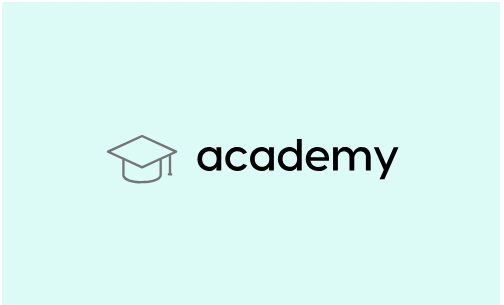

# Introduction :

Academy est notre entreprise, une start-up de la EdTech qui propose des formations en ligne pour les lycéens et les enseignements supérieurs.

Objectifs : 

A partir des données de la Banque mondiale, réaliser une pré-analyse exploratoire permettant de répondre aux interrogations suivantes :

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
    
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?

- Dans quels pays l'entreprise doit-elle opérer en priorité ?


Données Banque Mondiale : https://datacatalog.worldbank.org/dataset/education-statistics

# Plan :

Introduction.

Inspection des Données.

Analyse des Données.

a. Recherche des Indicateurs Pertinents.

b. Choix des Indicateurs Pertinents.

c. Analyse Graphique par Matplotlib et par Seaborn.

d. Standard Scaler - Power Transformer / Scoring par Pays et par Zone Géographique.

Conclusion.

Perspectives.

Méthode de Travail :
- Analyse des différentes dataframes.
- Sélection des indicateurs les plus significatifs.
- Classement des Pays et des Zones Géographiques selon leurs Scores.

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import os
import missingno as msno

In [3]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information :

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

<ipython-input-3-1f2f0d6efc39>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Inspection des Données : 

# - Premier Fichier : EdStatsCountry-Series.csv :

In [4]:
# Chargement de la dataframe :

country_series_data1 = pd.read_csv('EdStatsCountry-Series.csv')

In [5]:
# Type de variables contenues dans la Dataframe :

country_series_data1.info()
country_series_data1.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


CountryCode    object 
SeriesCode     object 
DESCRIPTION    object 
Unnamed: 3     float64
dtype: object

In [6]:
# Taille : nombre de lignes/colonnes :

country_series_data1.shape

(613, 4)

Cette dataframe contient 613 Lignes et 4 Colonnes.

In [7]:
# Contenu des premières lignes :

country_series_data1.head(3)

CountryCode   SeriesCode  \
0  ABW         SP.POP.TOTL   
1  ABW         SP.POP.GROW   
2  AFG         SP.POP.GROW   

                                                DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population Prospects NaN          
1  Data sources: United Nations World Population Prospects  NaN          
2  Data sources: United Nations World Population Prospects  NaN

In [8]:
# Contenu des dernières lignes :

country_series_data1.tail(3)

CountryCode   SeriesCode  \
610  ZMB         SP.POP.TOTL   
611  ZWE         SP.POP.TOTL   
612  ZWE         SP.POP.GROW   

                                                  DESCRIPTION  Unnamed: 3  
610  Data sources : United Nations World Population Prospects NaN          
611  Data sources : United Nations World Population Prospects NaN          
612  Data sources: United Nations World Population Prospects  NaN

In [9]:
# Données Statistiques de la Dataframe :

country_series_data1.describe()

Unnamed: 3
count  0.0       
mean  NaN        
std   NaN        
min   NaN        
25%   NaN        
50%   NaN        
75%   NaN        
max   NaN

In [10]:
# Localisation des Valeurs Manquantes de la Dataframe :

country_series_data1.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      CountryCode  SeriesCode  DESCRIPTION  Unnamed: 3
0    False        False       False        True      
1    False        False       False        True      
2    False        False       False        True      
3    False        False       False        True      
4    False        False       False        True      
5    False        False       False        True      
6    False        False       False        True      
7    False        False       False        True      
8    False        False       False        True      
9    False        False       False        True      
10   False        False       False        True      
11   False        False       False        True      
12   False        False       False        True      
13   False        False       False        True      
14   False        False       False        True      
15   False        False       False        True      
16   False        Fa

In [11]:
# Valeurs dupliquées dans l'ensemble de la Dataframe :

country_series_data1.duplicated().sum()

0

In [12]:
# Valeurs dupliquées dans des colonnes choisies : CountryCode et SeriesCode :

country_series_data1.duplicated(['CountryCode', 'SeriesCode']).sum()

0

In [13]:
# Création d'une Dataframe 'nettoyée' : 

new_country_series_data1 = country_series_data1[['CountryCode','SeriesCode','DESCRIPTION']].copy()

In [14]:
# Type de variables contenues dans la Nouvelle Dataframe :

new_country_series_data1.info()
new_country_series_data1.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB


CountryCode    object
SeriesCode     object
DESCRIPTION    object
dtype: object

In [15]:
# Taille de la Nouvelle Dataframe : nombre de lignes/colonnes :

new_country_series_data1.shape

(613, 3)

In [16]:
# Contenu des premières lignes :

new_country_series_data1.head(3)

CountryCode   SeriesCode  \
0  ABW         SP.POP.TOTL   
1  ABW         SP.POP.GROW   
2  AFG         SP.POP.GROW   

                                                DESCRIPTION  
0  Data sources : United Nations World Population Prospects  
1  Data sources: United Nations World Population Prospects   
2  Data sources: United Nations World Population Prospects

In [17]:
# Contenu des dernières lignes :

new_country_series_data1.tail(3)

CountryCode   SeriesCode  \
610  ZMB         SP.POP.TOTL   
611  ZWE         SP.POP.TOTL   
612  ZWE         SP.POP.GROW   

                                                  DESCRIPTION  
610  Data sources : United Nations World Population Prospects  
611  Data sources : United Nations World Population Prospects  
612  Data sources: United Nations World Population Prospects

In [18]:
# Localisation des Valeurs Manquantes de la Nouvelle Dataframe :

new_country_series_data1.isna().sum()

CountryCode    0
SeriesCode     0
DESCRIPTION    0
dtype: int64

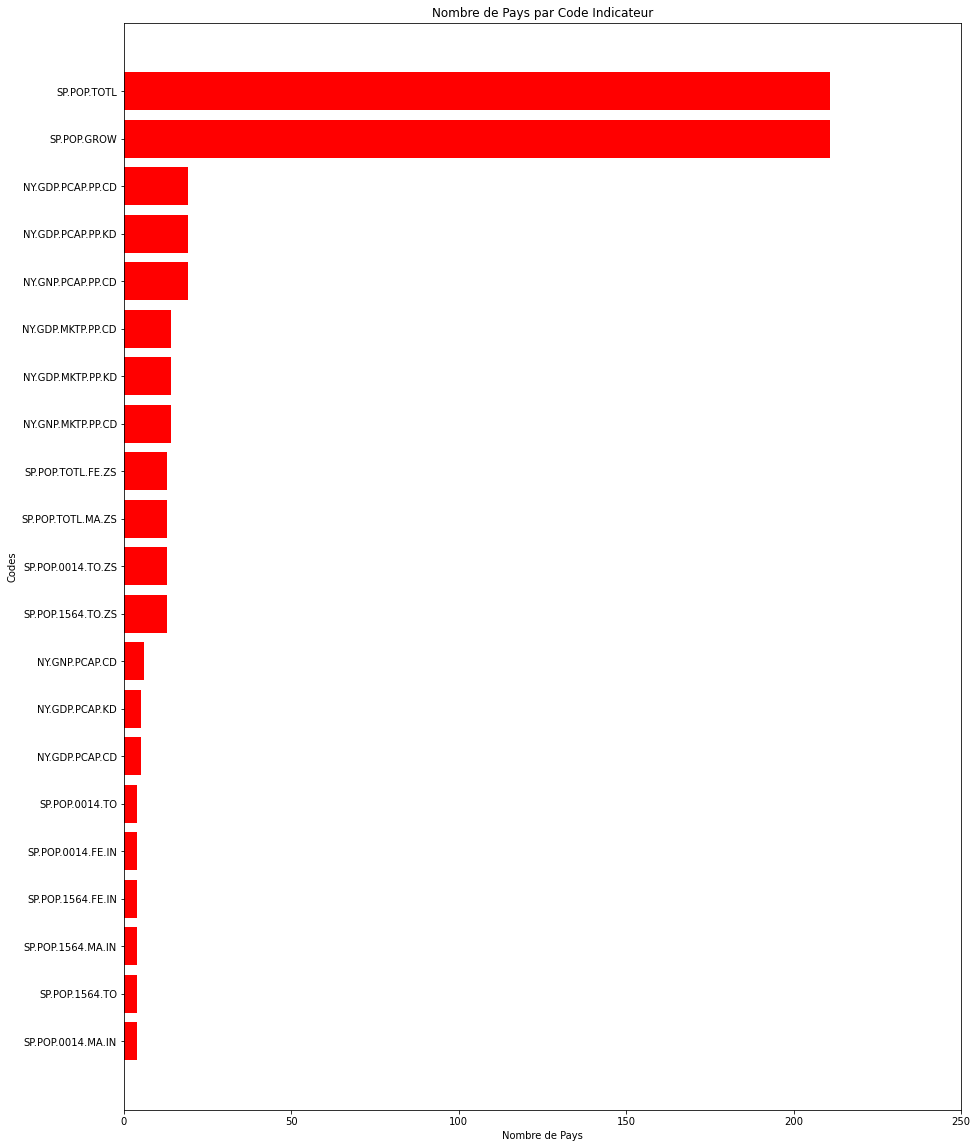

In [19]:
# Regroupement des pays par code :

fig, graph = plt.subplots(figsize=(15, 20))
x = new_country_series_data1.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['SeriesCode']
y = new_country_series_data1.groupby('SeriesCode')[['CountryCode']].count()['CountryCode'].sort_values()

graph.barh(x, y, color = 'Red')
graph.set_title('Nombre de Pays par Code Indicateur', fontsize=12)
graph.set_xlabel('Nombre de Pays', fontsize=10)
graph.set_ylabel('Codes', fontsize=10)
graph.tick_params(labelsize=10)
graph.set_xlim([0, 250])
plt.show()

Conclusion :

- La première Dataframe donne des informations sur les organisations à l'origine des données présentées.
- Il y a 3 types de Variables significatives : CountryCode, SeriesCode et Description.
- Initialement, la Dataframe est constituée de 613 Lignes et de 4 Colonnes.
- La Colonne 'Unnamed: 3' est une colonne constituée de Valeurs Manquantes. Elle a donc été effacée.
- Il n'y a aucune valeur dupliquée dans cette Dataframe.

# - Deuxième Fichier : EdStatsCountry.csv :

In [20]:
# Chargement de la Dataframe :

country_data2 = pd.read_csv('EdStatsCountry.csv')

In [21]:
# Type de variables contenues dans la Dataframe :

country_data2.info()
country_data2.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

Country Code                                         object 
Short Name                                           object 
Table Name                                           object 
Long Name                                            object 
2-alpha code                                         object 
Currency Unit                                        object 
Special Notes                                        object 
Region                                               object 
Income Group                                         object 
WB-2 code                                            object 
National accounts base year                          object 
National accounts reference year                     float64
SNA price valuation                                  object 
Lending category                                     object 
Other groups                                         object 
System of National Accounts                          object 
Alternative conversion f

In [22]:
# Taille : nombre de lignes/colonnes :

country_data2.shape

(241, 32)

In [23]:
# Contenu des premières lignes :

country_data2.head(3)

Country Code   Short Name   Table Name                     Long Name  \
0  ABW          Aruba        Aruba        Aruba                          
1  AFG          Afghanistan  Afghanistan  Islamic State of Afghanistan   
2  AGO          Angola       Angola       People's Republic of Angola    

  2-alpha code   Currency Unit  \
0  AW           Aruban florin    
1  AF           Afghan afghani   
2  AO           Angolan kwanza   

                                                                                                                                                                                                                                       Special Notes  \
0  SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.                                                                                                       
1  Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.   
2  April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.                                                                                                                  

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD  AW         
1  South Asia                 Low income            AF         
2  Sub-Saharan Africa         Upper middle income   AO         

  National accounts base year  National accounts reference year  \
0  2000                       NaN                                 
1  2002/03                    NaN                                 
2  2002                       NaN                                 

                    SNA price valuation Lending category Other groups  \
0  Value added at basic prices (VAB)     NaN              NaN           
1  Value added at basic prices (VAB)     IDA              HIPC          
2  Value added at producer prices (VAP)  IBRD             NaN           

                                      System of National Accounts  \
0  Country uses the 1993 System of National Accounts methodology.   
1  Country uses the 1993 System of National Accounts methodology.   
2  Country uses the 1993 System of National Accounts methodology.   

  Alternative conversion factor PPP survey year  \
0  NaN                           NaN              
1  NaN                           NaN              
2  1991–96                       2005             

              Balance of Payments Manual in use  \
0  IMF Balance of Payments Manual, 6th edition.   
1  NaN                                            
2  IMF Balance of Payments Manual, 6th edition.   

  External debt Reporting status       System of trade  \
0  NaN                            Special trade system   
1  Actual                         General trade system   
2  Actual                         Special trade system   

     Government Accounting concept           IMF data dissemination standard  \
0  NaN                              NaN                                        
1  Consolidated central government  General Data Dissemination System (GDDS)   
2  Budgetary central government     General Data Dissemination System (GDDS)   

  Latest population census                            Latest household survey  \
0  2010                     NaN                                                 
1  1979                     Multiple Indicator Cluster Survey (MICS), 2010/11   
2  1970                     Malaria Indicator Survey (MIS), 2011                

  Source of most recent Income and expenditure data  \
0  NaN                                                
1  Integrated household survey (IHS), 2008            
2  Integrated household s

In [24]:
# Contenu des dernières lignes :

country_data2.tail(3)

Country Code    Short Name    Table Name                 Long Name  \
238  ZAF          South Africa  South Africa  Republic of South Africa   
239  ZMB          Zambia        Zambia        Republic of Zambia         
240  ZWE          Zimbabwe      Zimbabwe      Republic of Zimbabwe       

    2-alpha code       Currency Unit  \
238  ZA           South African rand   
239  ZM           New Zambian kwacha   
240  ZW           U.S. dollar          

                                                                                                                                                                                                                                          Special Notes  \
238  Fiscal year end: March 31; reporting period for national accounts data: CY.                                                                                                                                                                          
239  National accounts data have rebased to reflect the January 1, 2013, introduction of the new Zambian kwacha at a rate of 1,000 old kwacha = 1 new kwacha.                                                                                             
240  Fiscal year end: June 30; reporting period for national accounts data: CY. As of January 2009, multiple hard currencies, such as rand, pound sterling, euro and U.S. dollar are in use. Data are reported in U.S. dollars, the most-used currency.   

                 Region         Income Group WB-2 code  \
238  Sub-Saharan Africa  Upper middle income  ZA         
239  Sub-Saharan Africa  Lower middle income  ZM         
240  Sub-Saharan Africa  Low income           ZW         

    National accounts base year  National accounts reference year  \
238  2005                       NaN                                 
239  1994                       NaN                                 
240  2009                       NaN                                 

                   SNA price valuation Lending category Other groups  \
238  Value added at basic prices (VAB)  IBRD             NaN           
239  Value added at basic prices (VAB)  IDA              HIPC          
240  Value added at basic prices (VAB)  Blend            NaN           

                                        System of National Accounts  \
238  Country uses the 1993 System of National Accounts methodology.   
239  Country uses the 1968 System of National Accounts methodology.   
240  Country uses the 1993 System of National Accounts methodology.   

    Alternative conversion factor PPP survey year  \
238  NaN                           2005             
239  1990–92                       2005             
240  1991, 1998                    2005             

                Balance of Payments Manual in use  \
238  IMF Balance of Payments Manual, 6th edition.   
239  IMF Balance of Payments Manual, 6th edition.   
240  IMF Balance of Payments Manual, 6th edition.   

    External debt Reporting status       System of trade  \
238  Preliminary                    General trade system   
239  Actual                         Special trade system   
240  Actual                         General trade system   

       Government Accounting concept  \
238  Consolidated central government   
239  Budgetary central government      
240  Consolidated central government   

                IMF data dissemination standard Latest population census  \
238  Special Data Dissemination Standard (SDDS)  2011                      
239  General Data Dissemination System (GDDS)    2010                      
240  General Data Dissemination System (GDDS)    2012                      

                                                        Latest household survey  \
238  Demographic and Health Survey (DHS), 2003; World Health Survey (WHS), 2003   
239  Demographic and Health Survey (DHS), 2013                                    
240  Demographic and Health Survey (DHS), 2010/11                          

In [25]:
# Données Statistiques de la Dataframe :

country_data2.describe()

National accounts reference year  Latest industrial data  \
count  32.00000                          107.000000               
mean   2001.53125                        2008.102804              
std    5.24856                           2.616834                 
min    1987.00000                        2000.000000              
25%    1996.75000                        2007.500000              
50%    2002.00000                        2009.000000              
75%    2005.00000                        2010.000000              
max    2012.00000                        2010.000000              

       Latest trade data  Unnamed: 31  
count  185.000000         0.0          
mean   2010.994595       NaN           
std    2.569675          NaN           
min    1995.000000       NaN           
25%    2011.000000       NaN           
50%    2012.000000       NaN           
75%    2012.000000       NaN           
max    2012.000000       NaN

In [26]:
# Somme des Valeurs Manquantes de la Dataframe :
country_data2.isna().sum().sum()

2354

In [27]:
# Localisation des Valeurs Manquantes de la Dataframe :

country_data2.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Country Code  Short Name  Table Name  Long Name  2-alpha code  \
0    False         False       False       False      False          
1    False         False       False       False      False          
2    False         False       False       False      False          
3    False         False       False       False      False          
4    False         False       False       False      False          
5    False         False       False       False      False          
6    False         False       False       False      False          
7    False         False       False       False      False          
8    False         False       False       False      False          
9    False         False       False       False      False          
10   False         False       False       False      False          
11   False         False       False       False      False          
12   False         False    

In [28]:
# Traduction en pourcentage des Valeurs Manquantes :

missing_count = country_data2.isnull().sum()
missing_count

Country Code                                         0  
Short Name                                           0  
Table Name                                           0  
Long Name                                            0  
2-alpha code                                         3  
Currency Unit                                        26 
Special Notes                                        96 
Region                                               27 
Income Group                                         27 
WB-2 code                                            1  
National accounts base year                          36 
National accounts reference year                     209
SNA price valuation                                  44 
Lending category                                     97 
Other groups                                         183
System of National Accounts                          26 
Alternative conversion factor                        194
PPP survey year                

In [29]:
value_count = country_data2.isnull().count()
value_count

Country Code                                         241
Short Name                                           241
Table Name                                           241
Long Name                                            241
2-alpha code                                         241
Currency Unit                                        241
Special Notes                                        241
Region                                               241
Income Group                                         241
WB-2 code                                            241
National accounts base year                          241
National accounts reference year                     241
SNA price valuation                                  241
Lending category                                     241
Other groups                                         241
System of National Accounts                          241
Alternative conversion factor                        241
PPP survey year                

In [30]:
missing_percentage = round(missing_count / value_count * 100,2)

In [31]:
missing_df = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage})

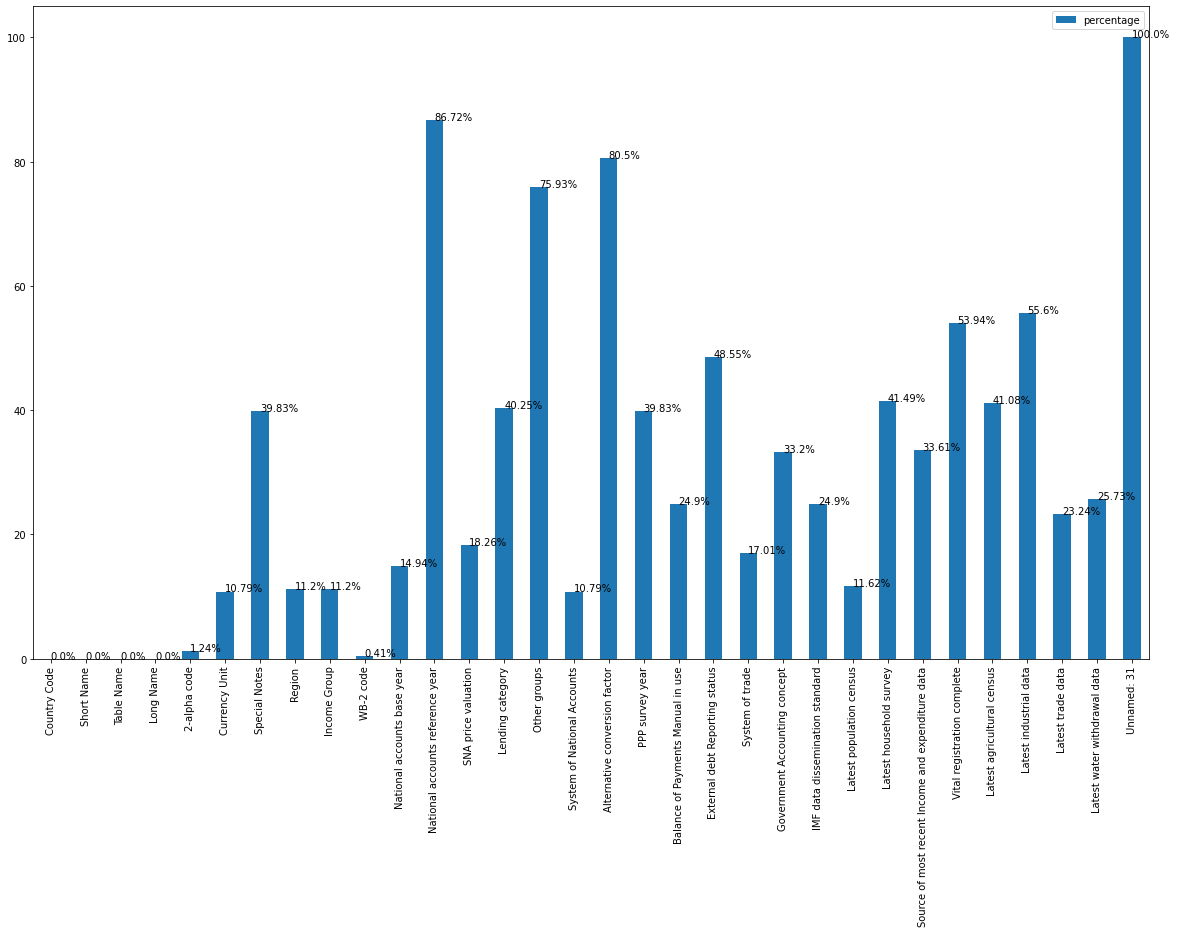

In [32]:
# Pourcentage de Valeurs Manquantes selon les différentes Variables :

plt.rcParams["figure.figsize"] = (20, 12)
barchart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate (missing_percentage):
        barchart.text(index, percentage, str(percentage) + '%')

In [33]:
# Valeurs dupliquées dans l'ensemble de la Dataframe :

country_data2.duplicated().sum()

0

<AxesSubplot:>

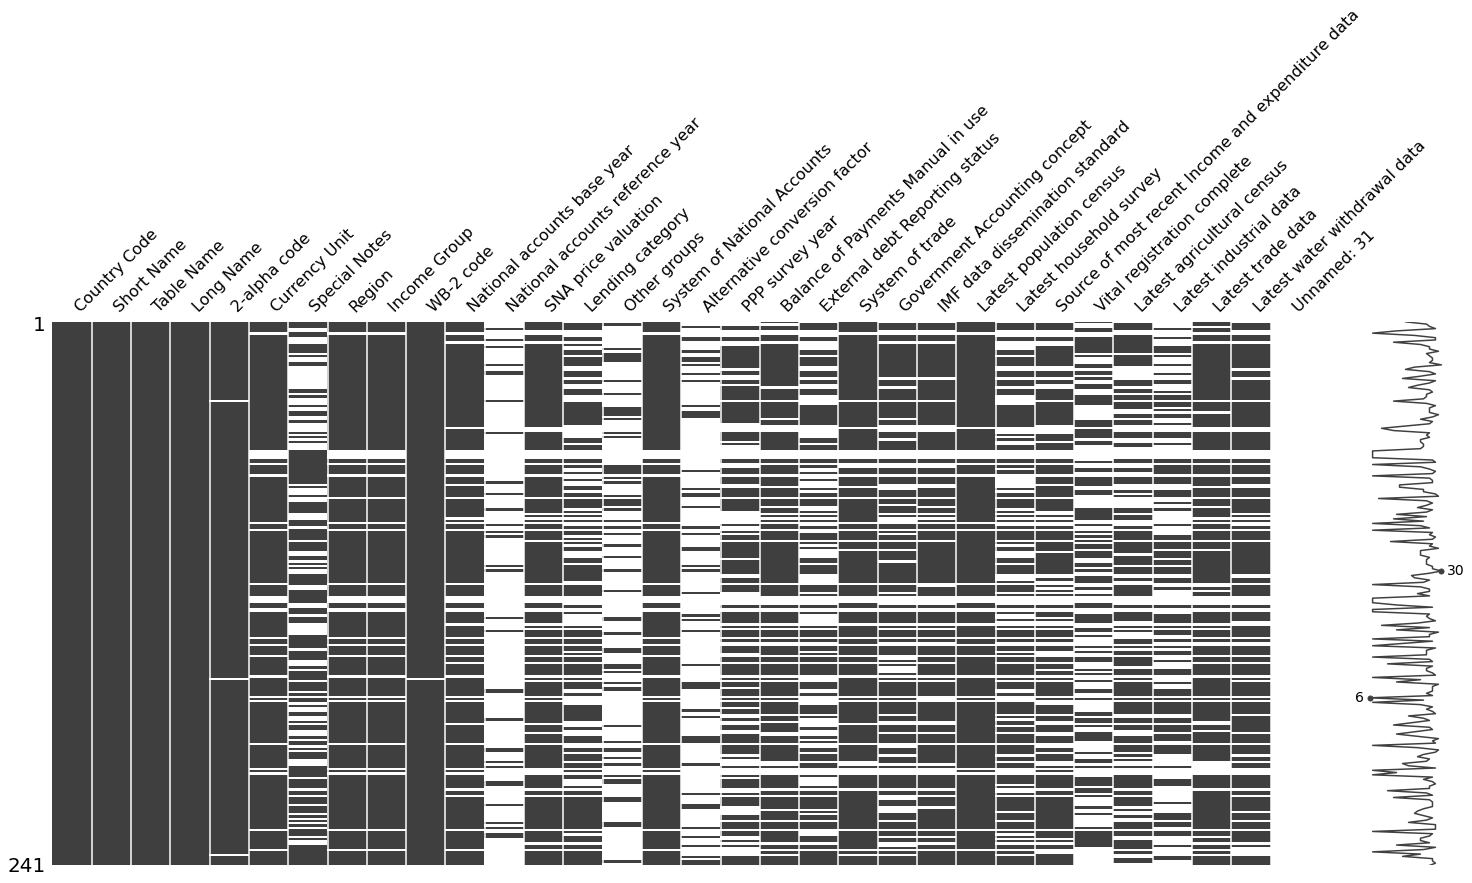

In [34]:
# Matrice des Valeurs Manquantes de la Dataframe :

msno.matrix(country_data2)

In [35]:
# Création d'une Dataframe 'nettoyée' : 

new_country_data2 = country_data2.drop(["Unnamed: 31"], axis = 1)

In [36]:
# Taille de la Nouvelle Dataframe : nombre de lignes/colonnes :

new_country_data2.shape

(241, 31)

In [37]:
# Contenu des premières lignes :

new_country_data2.head(3)

Country Code   Short Name   Table Name                     Long Name  \
0  ABW          Aruba        Aruba        Aruba                          
1  AFG          Afghanistan  Afghanistan  Islamic State of Afghanistan   
2  AGO          Angola       Angola       People's Republic of Angola    

  2-alpha code   Currency Unit  \
0  AW           Aruban florin    
1  AF           Afghan afghani   
2  AO           Angolan kwanza   

                                                                                                                                                                                                                                       Special Notes  \
0  SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.                                                                                                       
1  Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.   
2  April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.                                                                                                                  

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD  AW         
1  South Asia                 Low income            AF         
2  Sub-Saharan Africa         Upper middle income   AO         

  National accounts base year  National accounts reference year  \
0  2000                       NaN                                 
1  2002/03                    NaN                                 
2  2002                       NaN                                 

                    SNA price valuation Lending category Other groups  \
0  Value added at basic prices (VAB)     NaN              NaN           
1  Value added at basic prices (VAB)     IDA              HIPC          
2  Value added at producer prices (VAP)  IBRD             NaN           

                                      System of National Accounts  \
0  Country uses the 1993 System of National Accounts methodology.   
1  Country uses the 1993 System of National Accounts methodology.   
2  Country uses the 1993 System of National Accounts methodology.   

  Alternative conversion factor PPP survey year  \
0  NaN                           NaN              
1  NaN                           NaN              
2  1991–96                       2005             

              Balance of Payments Manual in use  \
0  IMF Balance of Payments Manual, 6th edition.   
1  NaN                                            
2  IMF Balance of Payments Manual, 6th edition.   

  External debt Reporting status       System of trade  \
0  NaN                            Special trade system   
1  Actual                         General trade system   
2  Actual                         Special trade system   

     Government Accounting concept           IMF data dissemination standard  \
0  NaN                              NaN                                        
1  Consolidated central government  General Data Dissemination System (GDDS)   
2  Budgetary central government     General Data Dissemination System (GDDS)   

  Latest population census                            Latest household survey  \
0  2010                     NaN                                                 
1  1979                     Multiple Indicator Cluster Survey (MICS), 2010/11   
2  1970                     Malaria Indicator Survey (MIS), 2011                

  Source of most recent Income and expenditure data  \
0  NaN                                                
1  Integrated household survey (IHS), 2008            
2  Integrated household s

In [38]:
# Contenu des dernières lignes :

new_country_data2.tail(3)

Country Code    Short Name    Table Name                 Long Name  \
238  ZAF          South Africa  South Africa  Republic of South Africa   
239  ZMB          Zambia        Zambia        Republic of Zambia         
240  ZWE          Zimbabwe      Zimbabwe      Republic of Zimbabwe       

    2-alpha code       Currency Unit  \
238  ZA           South African rand   
239  ZM           New Zambian kwacha   
240  ZW           U.S. dollar          

                                                                                                                                                                                                                                          Special Notes  \
238  Fiscal year end: March 31; reporting period for national accounts data: CY.                                                                                                                                                                          
239  National accounts data have rebased to reflect the January 1, 2013, introduction of the new Zambian kwacha at a rate of 1,000 old kwacha = 1 new kwacha.                                                                                             
240  Fiscal year end: June 30; reporting period for national accounts data: CY. As of January 2009, multiple hard currencies, such as rand, pound sterling, euro and U.S. dollar are in use. Data are reported in U.S. dollars, the most-used currency.   

                 Region         Income Group WB-2 code  \
238  Sub-Saharan Africa  Upper middle income  ZA         
239  Sub-Saharan Africa  Lower middle income  ZM         
240  Sub-Saharan Africa  Low income           ZW         

    National accounts base year  National accounts reference year  \
238  2005                       NaN                                 
239  1994                       NaN                                 
240  2009                       NaN                                 

                   SNA price valuation Lending category Other groups  \
238  Value added at basic prices (VAB)  IBRD             NaN           
239  Value added at basic prices (VAB)  IDA              HIPC          
240  Value added at basic prices (VAB)  Blend            NaN           

                                        System of National Accounts  \
238  Country uses the 1993 System of National Accounts methodology.   
239  Country uses the 1968 System of National Accounts methodology.   
240  Country uses the 1993 System of National Accounts methodology.   

    Alternative conversion factor PPP survey year  \
238  NaN                           2005             
239  1990–92                       2005             
240  1991, 1998                    2005             

                Balance of Payments Manual in use  \
238  IMF Balance of Payments Manual, 6th edition.   
239  IMF Balance of Payments Manual, 6th edition.   
240  IMF Balance of Payments Manual, 6th edition.   

    External debt Reporting status       System of trade  \
238  Preliminary                    General trade system   
239  Actual                         Special trade system   
240  Actual                         General trade system   

       Government Accounting concept  \
238  Consolidated central government   
239  Budgetary central government      
240  Consolidated central government   

                IMF data dissemination standard Latest population census  \
238  Special Data Dissemination Standard (SDDS)  2011                      
239  General Data Dissemination System (GDDS)    2010                      
240  General Data Dissemination System (GDDS)    2012                      

                                                        Latest household survey  \
238  Demographic and Health Survey (DHS), 2003; World Health Survey (WHS), 2003   
239  Demographic and Health Survey (DHS), 2013                                    
240  Demographic and Health Survey (DHS), 2010/11                          

<AxesSubplot:>

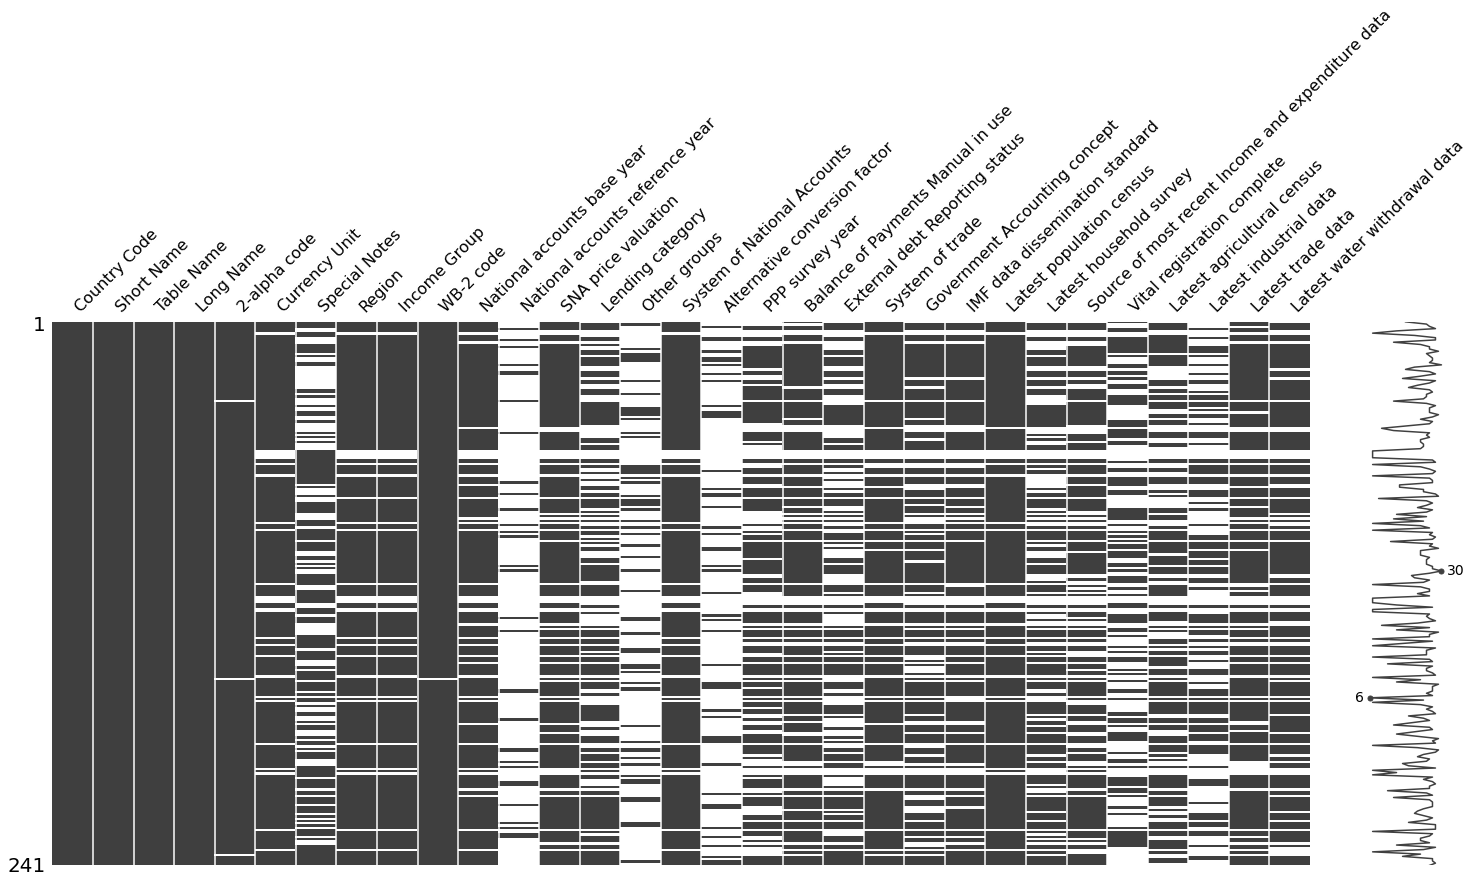

In [39]:
# Matrice des Valeurs Manquantes de la Dataframe "Nettoyée" :

msno.matrix(new_country_data2)

In [40]:
somme_des_valeurs_manquantes = new_country_data2.isna().sum().sum()
somme_des_valeurs_manquantes

2113

In [41]:
# Moyenne des Valeurs Manquantes de la Nouvelle Dataframe :

new_country_data2.isna().mean()

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

/Users/sylvaincarlevato/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de Pays par Région')

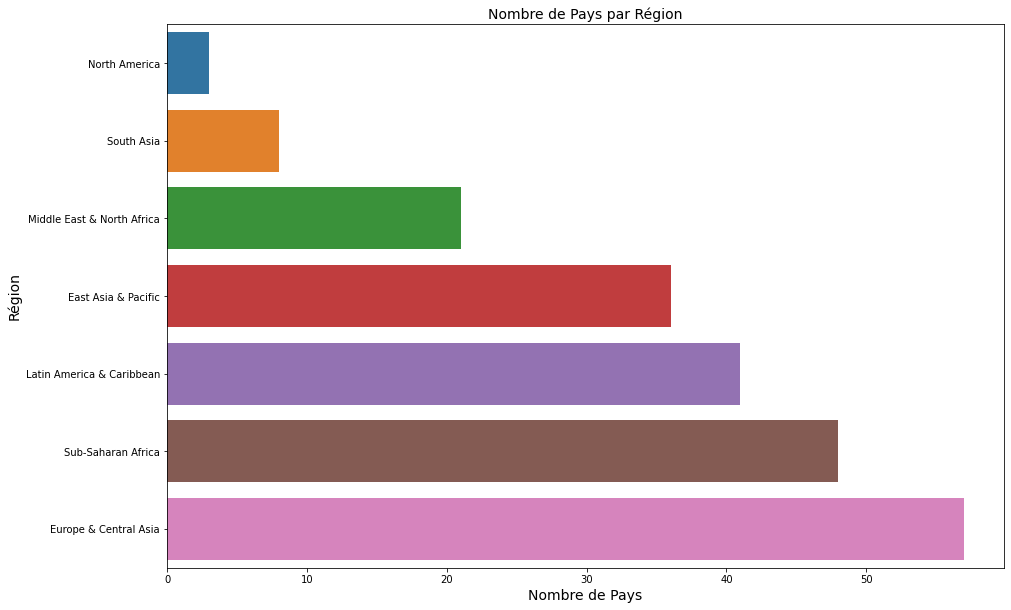

In [42]:
# Regroupement des Pays par Region :

fig = plt.figure(figsize = (15,10))

nb_pays_par_region = new_country_data2.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=True)
sns.barplot(nb_pays_par_region['Short Name'], nb_pays_par_region['Region'])
plt.xlabel('Nombre de Pays', fontsize =14)
plt.ylabel('Région', fontsize = 14)
plt.title('Nombre de Pays par Région', fontsize = 14)

/Users/sylvaincarlevato/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de Pays par Groupe de Revenus')

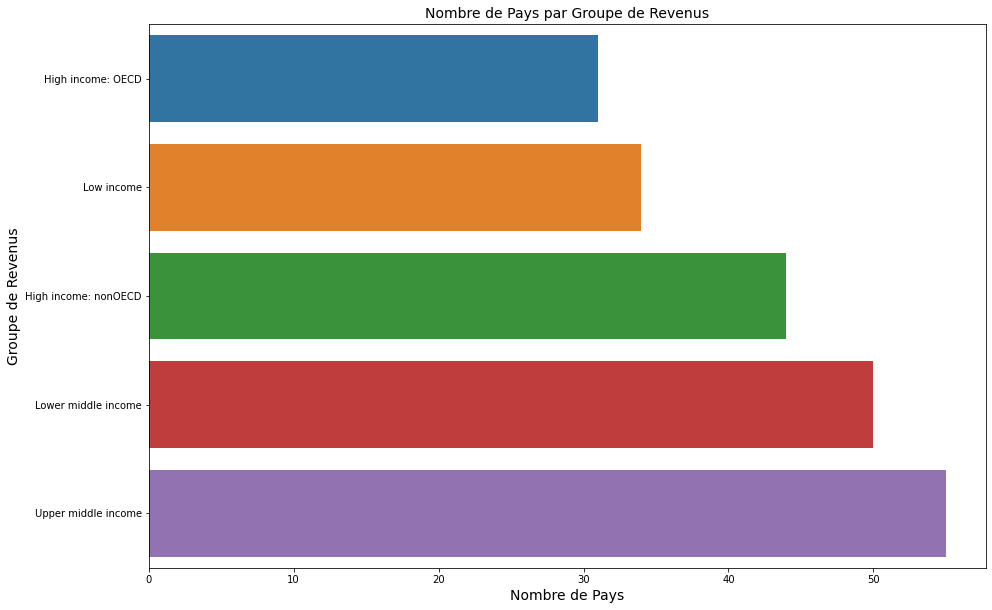

In [43]:
# Regroupement des Pays par Groupe de Revenus :

fig = plt.figure(figsize = (15,10))

nb_pays_par_income = new_country_data2.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=True)
sns.barplot(nb_pays_par_income['Short Name'], nb_pays_par_income['Income Group'])
plt.xlabel('Nombre de Pays', fontsize =14)
plt.ylabel('Groupe de Revenus', fontsize = 14)
plt.title('Nombre de Pays par Groupe de Revenus', fontsize = 14)

Conclusion :

- La deuxième base de données donne des informations sur des données commerciales et industrielles, classées par pays.
- Il y a 3 types de Variables utiles à notre étude : Country Code, Short Name et Region.
- Initialement, la Dataframe est constituée de 241 Lignes et de 32 Colonnes.
- La Colonne 'Unnamed: 31' est une colonne constituée de Valeurs Manquantes. Elle a donc été effacée.
- Il n'y a aucune valeur dupliquée dans cette Dataframe.
- Dans sa première forme, on comptait 2354 valeurs manquantes.

# - Troisième Fichier : EdStatsData.csv :

In [44]:
# Chargement de la dataframe :

ed_stat_data3 = pd.read_csv('EdStatsData.csv')

In [45]:
# Type de variables contenues dans la Dataframe :

ed_stat_data3.info()
ed_stat_data3.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

Country Name      object 
Country Code      object 
Indicator Name    object 
Indicator Code    object 
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004        

In [46]:
# Taille : nombre de lignes/colonnes :

ed_stat_data3.shape

(886930, 70)

In [47]:
# Contenu des premières lignes :

ed_stat_data3.head(3)

Country Name Country Code  \
0  Arab World   ARB           
1  Arab World   ARB           
2  Arab World   ARB           

                                                            Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)              
1  Adjusted net enrolment rate, lower secondary, female (%)                  
2  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   

   Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  \
0  UIS.NERA.2     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1  UIS.NERA.2.F   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2  UIS.NERA.2.GPI NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

   1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
0 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

   1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  \
0 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

   2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
0 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

   2016  2017  2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  \
0 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

   2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN           
1 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN           
2 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [48]:
# Contenu des dernières lignes :

ed_stat_data3.tail(3)

Country Name Country Code  \
886927  Zimbabwe     ZWE           
886928  Zimbabwe     ZWE           
886929  Zimbabwe     ZWE           

                                                                Indicator Name  \
886927  Youth literacy rate, population 15-24 years, female (%)                  
886928  Youth literacy rate, population 15-24 years, gender parity index (GPI)   
886929  Youth literacy rate, population 15-24 years, male (%)                    

              Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  \
886927  SE.ADT.1524.LT.FE.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886928  SE.ADT.1524.LT.FM.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886929  SE.ADT.1524.LT.MA.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        1978  1979  1980  1981       1982  1983  1984  1985  1986  1987  1988  \
886927 NaN   NaN   NaN   NaN    84.812241 NaN   NaN   NaN   NaN   NaN   NaN     
886928 NaN   NaN   NaN   NaN    0.903920  NaN   NaN   NaN   NaN   NaN   NaN     
886929 NaN   NaN   NaN   NaN    93.826958 NaN   NaN   NaN   NaN   NaN   NaN     

        1989  1990  1991       1992  1993  1994  1995  1996  1997  1998  1999  \
886927 NaN   NaN   NaN    94.353439 NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886928 NaN   NaN   NaN    0.977340  NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886929 NaN   NaN   NaN    96.540619 NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
886927 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886928 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886929 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

            2011  2012  2013      2014  2015  2016  2017  2020  2025  2030  \
886927  92.12456 NaN   NaN    93.18835 NaN   NaN   NaN   NaN   NaN   NaN     
886928  1.02828  NaN   NaN    1.06389  NaN   NaN   NaN   NaN   NaN   NaN     
886929  89.59058 NaN   NaN    87.59186 NaN   NaN   NaN   NaN   NaN   NaN     

        2035  2040  2045  2050  2055  2060  2065  2070  2075  2080  2085  \
886927 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886928 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886929 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        2090  2095  2100  Unnamed: 69  
886927 NaN   NaN   NaN   NaN           
886928 NaN   NaN   NaN   NaN           
886929 NaN   NaN   NaN   NaN

In [49]:
# Données Statistiques de la Dataframe :

ed_stat_data3.describe()

1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.215546e+11  2.325489e+11  2.473986e+11  2.660957e+11   
min   -3.658569e+00 -2.950945e+00 -3.174870e+00 -3.558749e+00 -2.973612e+00   
25%    1.400000e+00  9.312615e+00  9.519913e+00  1.000000e+01  1.000000e+01   
50%    9.677420e+00  7.101590e+01  7.133326e+01  7.290512e+01  7.510173e+01   
75%    7.854163e+01  5.682800e+04  5.739175e+04  5.940425e+04  6.411500e+04   
max    2.300634e+13  2.424128e+13  2.521383e+13  2.622101e+13  2.730873e+13   

               1980          1981          1982          1983          1984  \
count  8.912200e+04  3.877700e+04  3.751100e+04  3.846000e+04  3.860600e+04   
mean   3.283898e+09  7.664969e+09  7.913722e+09  7.856908e+09  8.118002e+09   
std    1.780774e+11  2.744142e+11  2.790549e+11  2.823809e+11  2.940635e+11   
min   -1.404240e+00 -1.478345e+00 -2.358765e+00 -2.867273e+00 -2.800548e+00   
25%    1.770000e+00  9.468690e+00  9.989330e+00  9.581825e+00  9.068048e+00   
50%    1.107000e+01  7.467213e+01  7.710972e+01  7.592528e+01  7.533138e+01   
75%    8.202760e+01  6.310400e+04  6.923300e+04  6.304125e+04  6.360700e+04   
max    2.784319e+13  2.837926e+13  2.848067e+13  2.916436e+13  3.048521e+13   

               1985          1986          1987          1988          1989  \
count  9.029600e+04  3.937200e+04  3.864100e+04  3.855200e+04  3.754000e+04   
mean   3.622763e+09  9.156550e+09  1.014901e+10  1.104709e+10  1.195436e+10   
std    2.002929e+11  3.264675e+11  3.535351e+11  3.804257e+11  4.014873e+11   
min   -2.216315e+00 -1.556722e+00 -1.410886e+00 -1.425202e+00 -1.562425e+00   
25%    2.150000e+00  9.332923e+00  9.595330e+00  9.715503e+00  9.679637e+00   
50%    1.200000e+01  7.409428e+01  7.357014e+01  7.354275e+01  7.935322e+01   
75%    8.338313e+01  6.608525e+04  7.001100e+04  7.597875e+04  8.558375e+04   
max    3.166465e+13  3.271284e+13  3.388244e+13  3.545738e+13  3.678741e+13   

               1990          1991          1992          1993          1994  \
count  1.244050e+05  7.443700e+04  7.554300e+04  7.579300e+04  7.746200e+04   
mean   9.084424e+09  1.571674e+10  1.604668e+10  1.643532e+10  1.684022e+10   
std    3.665667e+11  4.881357e+11  5.012055e+11  5.121962e+11  5.292982e+11   
min   -1.803750e+00 -5.814339e+00 -5.089333e+00 -6.184857e+00 -4.792691e+00   
25%    4.830000e+00  5.134554e+01  4.933854e+01  4.944877e+01  4.783283e+01   
50%    5.048379e+01  3.916000e+04  3.477300e+04  3.497100e+04  3.182500e+04   
75%    9.134300e+04  4.383130e+05  4.246125e+05  4.316250e+05  4.244605e+05   
max    4.714344e+13  4.781272e+13  4.866446e+13  4.959600e+13  5.106581e+13   

               1995          1996          1997          1998          1999  \
count  1.313610e+05  7.680700e+04  7.345300e+04  8.491400e+04  1.188390e+05   
mean   1.052543e+10  1.874630e+10  2.027385e+10  1.794678e+10  1.331558e+10   
std    4.285218e+11  5.812586e+11  6.142357e+11  5.859148e+11  5.153472e+11   
min   -2.697722e+00 -3.820174e+00 -2.517245e+00 -6.086200e+04 -6.526000e+04   
25%    5.200000e+00  4.836486e+01  5.510854e+01  3.346871e+0

In [50]:
# Localisation des Valeurs Manquantes de la Dataframe :

ed_stat_data3.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Country Name  Country Code  Indicator Name  Indicator Code   1970  \
0       False         False         False           False           True    
1       False         False         False           False           True    
2       False         False         False           False           True    
3       False         False         False           False           True    
4       False         False         False           False           False   
...       ...           ...           ...             ...             ...   
886925  False         False         False           False           True    
886926  False         False         False           False           True    
886927  False         False         False           False           True    
886928  False         False         False           False           True    
886929  False         False         False           False           True    

         1971

In [51]:
# Valeurs dupliquées dans l'ensemble de la Dataframe :

ed_stat_data3.duplicated().sum()

0

In [52]:
# Création d'une Dataframe 'nettoyée' : 

new_ed_stat_data3 = ed_stat_data3.drop(['Unnamed: 69'], axis = 1)

In [53]:
# Type de variables contenues dans la Nouvelle Dataframe :

new_ed_stat_data3.info()
new_ed_stat_data3.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

Country Name      object 
Country Code      object 
Indicator Name    object 
Indicator Code    object 
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004        

In [54]:
# Taille de la Nouvelle Dataframe : nombre de lignes/colonnes :

new_ed_stat_data3.shape

(886930, 69)

In [55]:
# Contenu des premières lignes :

new_ed_stat_data3.head(3)

Country Name Country Code  \
0  Arab World   ARB           
1  Arab World   ARB           
2  Arab World   ARB           

                                                            Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)              
1  Adjusted net enrolment rate, lower secondary, female (%)                  
2  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   

   Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  \
0  UIS.NERA.2     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1  UIS.NERA.2.F   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2  UIS.NERA.2.GPI NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

   1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
0 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

   1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  \
0 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

   2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
0 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

   2016  2017  2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  \
0 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

   2070  2075  2080  2085  2090  2095  2100  
0 NaN   NaN   NaN   NaN   NaN   NaN   NaN    
1 NaN   NaN   NaN   NaN   NaN   NaN   NaN    
2 NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [56]:
# Contenu des dernières lignes :

new_ed_stat_data3.tail(3)

Country Name Country Code  \
886927  Zimbabwe     ZWE           
886928  Zimbabwe     ZWE           
886929  Zimbabwe     ZWE           

                                                                Indicator Name  \
886927  Youth literacy rate, population 15-24 years, female (%)                  
886928  Youth literacy rate, population 15-24 years, gender parity index (GPI)   
886929  Youth literacy rate, population 15-24 years, male (%)                    

              Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  \
886927  SE.ADT.1524.LT.FE.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886928  SE.ADT.1524.LT.FM.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886929  SE.ADT.1524.LT.MA.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        1978  1979  1980  1981       1982  1983  1984  1985  1986  1987  1988  \
886927 NaN   NaN   NaN   NaN    84.812241 NaN   NaN   NaN   NaN   NaN   NaN     
886928 NaN   NaN   NaN   NaN    0.903920  NaN   NaN   NaN   NaN   NaN   NaN     
886929 NaN   NaN   NaN   NaN    93.826958 NaN   NaN   NaN   NaN   NaN   NaN     

        1989  1990  1991       1992  1993  1994  1995  1996  1997  1998  1999  \
886927 NaN   NaN   NaN    94.353439 NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886928 NaN   NaN   NaN    0.977340  NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886929 NaN   NaN   NaN    96.540619 NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
886927 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886928 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886929 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

            2011  2012  2013      2014  2015  2016  2017  2020  2025  2030  \
886927  92.12456 NaN   NaN    93.18835 NaN   NaN   NaN   NaN   NaN   NaN     
886928  1.02828  NaN   NaN    1.06389  NaN   NaN   NaN   NaN   NaN   NaN     
886929  89.59058 NaN   NaN    87.59186 NaN   NaN   NaN   NaN   NaN   NaN     

        2035  2040  2045  2050  2055  2060  2065  2070  2075  2080  2085  \
886927 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886928 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
886929 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        2090  2095  2100  
886927 NaN   NaN   NaN    
886928 NaN   NaN   NaN    
886929 NaN   NaN   NaN

In [57]:
# Décompte des Valeurs Manquantes de la Nouvelle Dataframe :

new_ed_stat_data3.isna().sum()

Country Name      0     
Country Code      0     
Indicator Name    0     
Indicator Code    0     
1970              814642
1971              851393
1972              851311
1973              851385
1974              851200
1975              799624
1976              849447
1977              849356
1978              849354
1979              850121
1980              797808
1981              848153
1982              849419
1983              848470
1984              848324
1985              796634
1986              847558
1987              848289
1988              848378
1989              849390
1990              762525
1991              812493
1992              811387
1993              811137
1994              809468
1995              755569
1996              810123
1997              813477
1998              802016
1999              768091
2000              710254
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822


In [58]:
# Traduction en pourcentage des Valeurs Manquantes :

missing_count = new_ed_stat_data3.isnull().sum()
missing_count
miss = missing_count[['Country Name','Country Code','Indicator Name','Indicator Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
miss

Country Name      0     
Country Code      0     
Indicator Name    0     
Indicator Code    0     
2000              710254
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822
2006              746618
2007              749658
2008              752543
2009              744822
2010              644488
2011              740918
2012              739666
2013              749421
2014              773141
2015              755872
2016              870470
2017              886787
dtype: int64

In [59]:
value_count = new_ed_stat_data3.isnull().count()
count = value_count[['Country Name','Country Code','Indicator Name','Indicator Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
count

Country Name      886930
Country Code      886930
Indicator Name    886930
Indicator Code    886930
2000              886930
2001              886930
2002              886930
2003              886930
2004              886930
2005              886930
2006              886930
2007              886930
2008              886930
2009              886930
2010              886930
2011              886930
2012              886930
2013              886930
2014              886930
2015              886930
2016              886930
2017              886930
dtype: int64

In [60]:
missing_percentage = round((miss / count) * 100)

In [61]:
missing_df = pd.DataFrame({'count' : count, 'percentage' : missing_percentage})

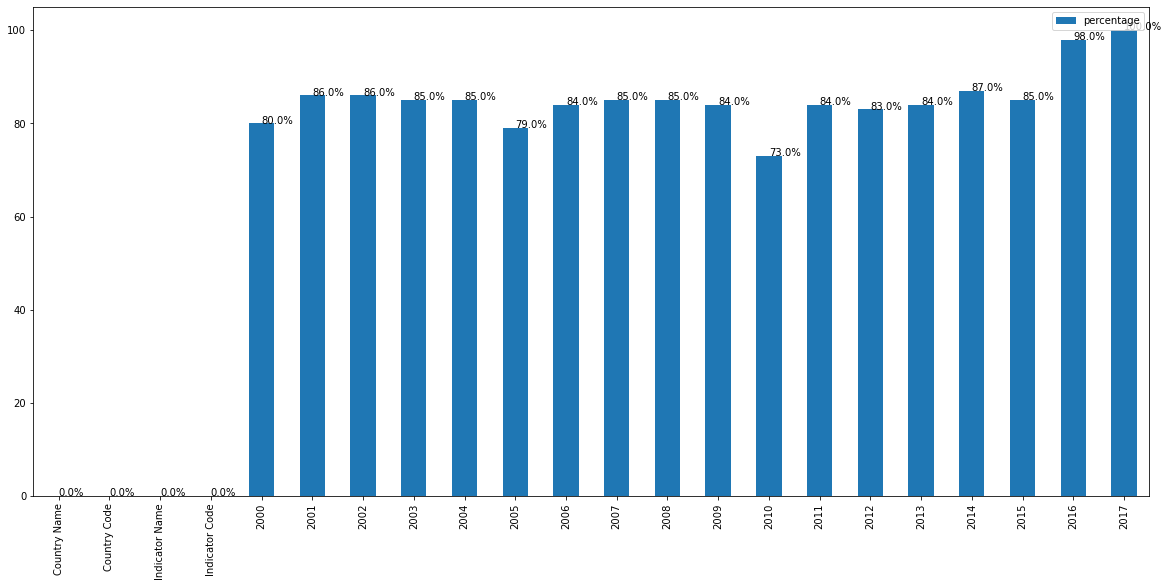

In [62]:
# Pourcentage de Valeurs Manquantes selon les différentes Variables :

plt.rcParams["figure.figsize"] = (20,9)
barchart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate (missing_percentage):
        barchart.text(index, percentage, str(percentage) + '%')

<AxesSubplot:>

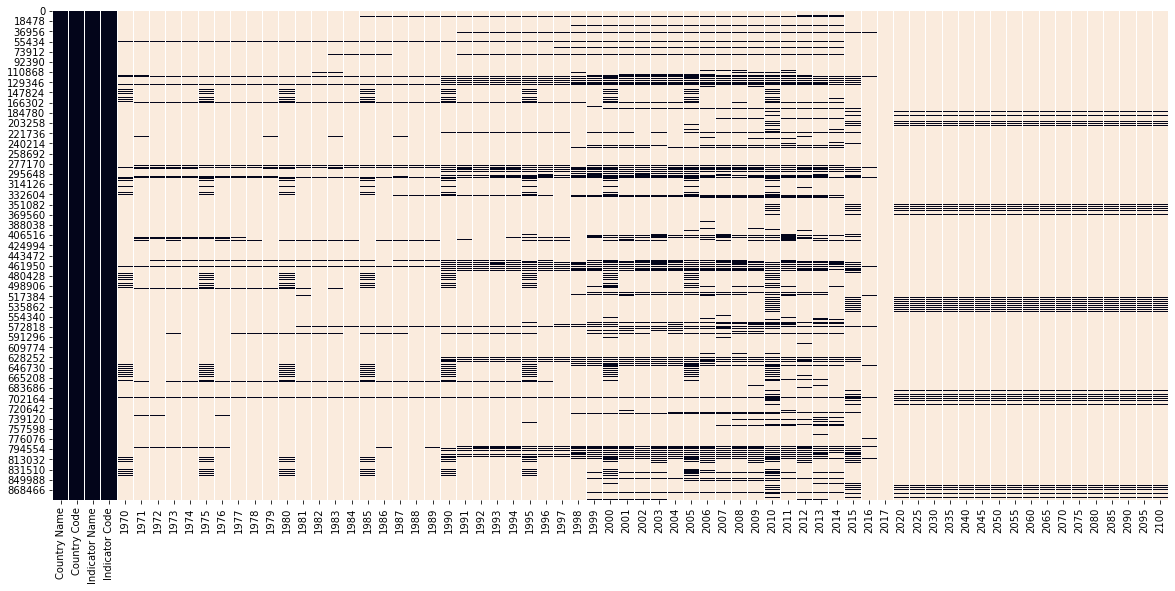

In [63]:
# Heatmap des Valeurs Manquantes de la Dataframe "Nettoyée" :

sns.heatmap(new_ed_stat_data3.isnull(), cbar=False)

In [64]:
# Somme des Valeurs Manquantes de la Nouvelle Dataframe :

somme_des_valeurs_manquantes = new_ed_stat_data3.isna().sum().sum()
somme_des_valeurs_manquantes

52568249

Conclusion :
- Cette dataframe donne l'évolution de plusieurs indicateurs sur une période de 1970 à 2100 pour tous les pays du monde et certaines régions du monde.
- Cette dataframe couvre une période de 1970 à 2100. Nous nous focaliserons sur la période 2000 2016. 
- Cette dataframe est constitué de 886930 lignes et 70 colonnes.
- On dénombre 53455179 valeurs manquantes, avant suppression de la colonne Unnamed : 69.
- Il n'y a aucune valeur dupliquée.
- De 1970 à 1998, il y a peu de données exploitables.
- 2010 est l'année la plus riche en données.
- 2017 est une année vide d'informations.

# - Quatrième Fichier : EdStatsFootNote.csv :

In [65]:
# Chargement du jeu de données :

ed_stat_foot_note_data4 = pd.read_csv('EdStatsFootNote.csv')

In [66]:
# Types des variables :

ed_stat_foot_note_data4.info()
ed_stat_foot_note_data4.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


CountryCode    object 
SeriesCode     object 
Year           object 
DESCRIPTION    object 
Unnamed: 4     float64
dtype: object

In [67]:
# Taille : nombre de lignes/colonnes :

ed_stat_foot_note_data4.shape

(643638, 5)

In [68]:
# Contenu des 3 premières lignes :

ed_stat_foot_note_data4.head(3)

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0  ABW         SE.PRE.ENRL.FE  YR2001  Country estimation. NaN        
1  ABW         SE.TER.TCHR.FE  YR2005  Country estimation. NaN        
2  ABW         SE.PRE.TCHR.FE  YR2000  Country estimation. NaN

In [69]:
# Contenu des 3 dernières lignes :

ed_stat_foot_note_data4.tail(3)

CountryCode   SeriesCode    Year  \
643635  ZWE         SH.DYN.MORT  YR2015   
643636  ZWE         SH.DYN.MORT  YR2017   
643637  ZWE         SP.POP.GROW  YR2017   

                                   DESCRIPTION  Unnamed: 4  
643635  Uncertainty bound is 48.3 - 73.3       NaN          
643636  5-year average value between 0s and 5s NaN          
643637  5-year average value between 0s and 5s NaN

In [70]:
# Données Statistiques de la Dataframe :

ed_stat_foot_note_data4.describe()

Unnamed: 4
count  0.0       
mean  NaN        
std   NaN        
min   NaN        
25%   NaN        
50%   NaN        
75%   NaN        
max   NaN

In [71]:
# Localisation des Valeurs Manquantes de la Dataframe :

ed_stat_foot_note_data4.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         CountryCode  SeriesCode   Year  DESCRIPTION  Unnamed: 4
0       False        False       False  False        True      
1       False        False       False  False        True      
2       False        False       False  False        True      
3       False        False       False  False        True      
4       False        False       False  False        True      
...       ...          ...         ...    ...         ...      
643633  False        False       False  False        True      
643634  False        False       False  False        True      
643635  False        False       False  False        True      
643636  False        False       False  False        True      
643637  False        False       False  False        True      

[643638 rows x 5 columns]>

<AxesSubplot:>

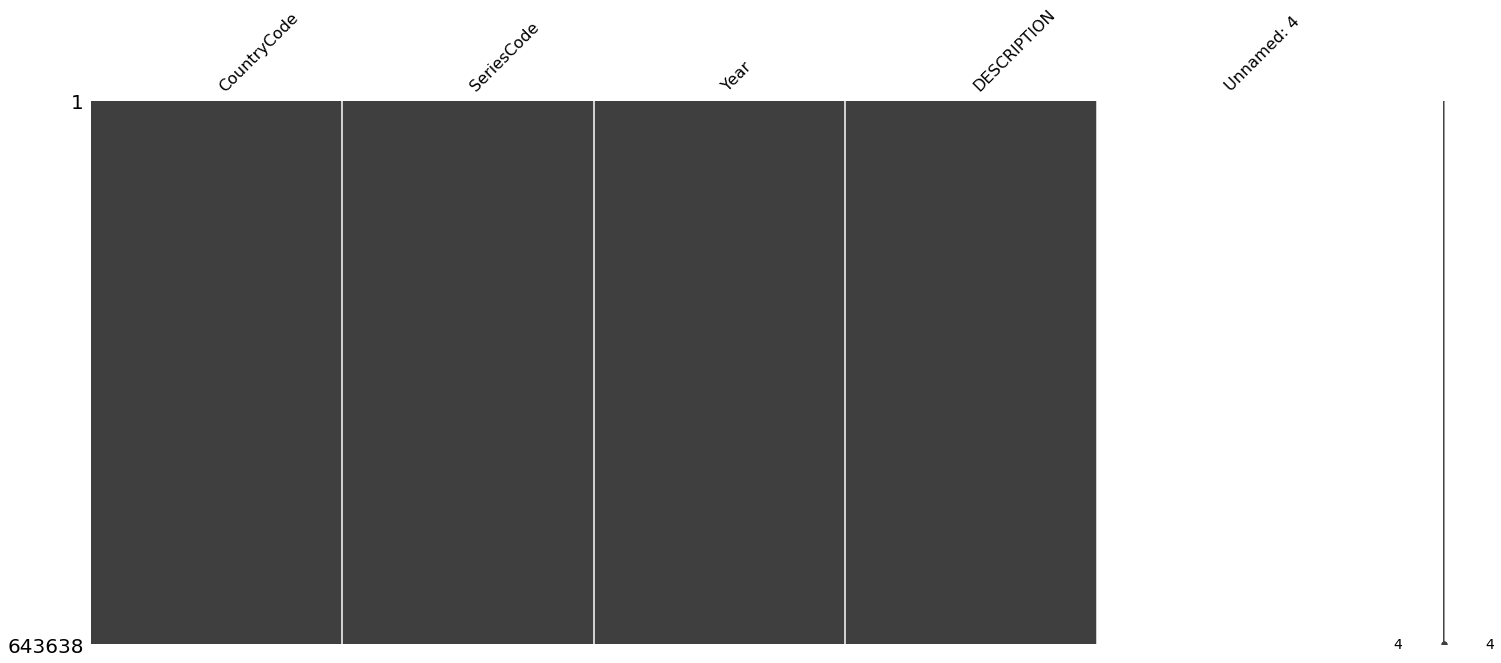

In [72]:
# Matrice des Valeurs Manquantes de la Dataframe :

msno.matrix(ed_stat_foot_note_data4)

In [73]:
# Valeurs dupliquées dans l'ensemble de la Dataframe :

ed_stat_foot_note_data4.duplicated().sum()

0

In [74]:
# Création d'une Dataframe 'nettoyée' : 

new_ed_stat_foot_note_data4 = ed_stat_foot_note_data4.drop(columns=["Unnamed: 4"])

<AxesSubplot:>

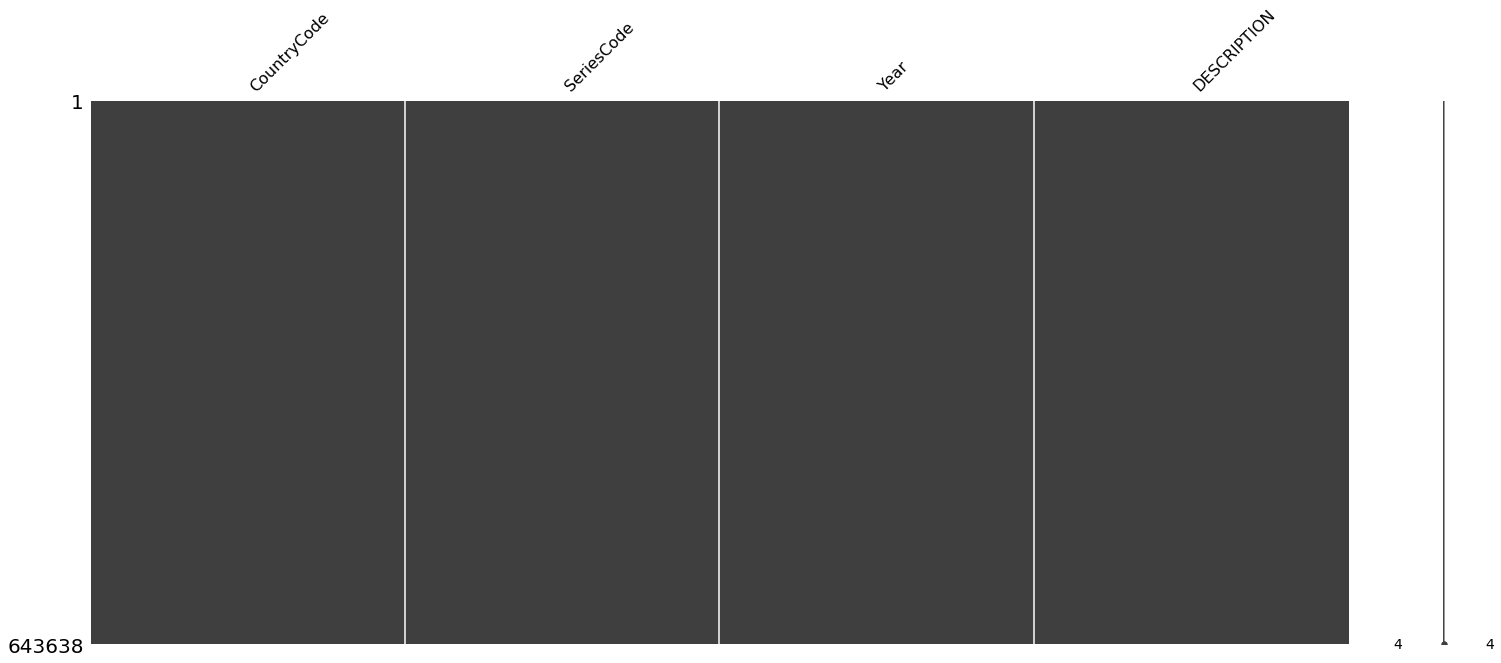

In [75]:
# Matrice des Valeurs Manquantes de la Dataframe :

msno.matrix(new_ed_stat_foot_note_data4)

In [76]:
# Contenu des 3 premières lignes de la Nouvelle Dataframe :

new_ed_stat_foot_note_data4.head(3)

CountryCode      SeriesCode    Year          DESCRIPTION
0  ABW         SE.PRE.ENRL.FE  YR2001  Country estimation.
1  ABW         SE.TER.TCHR.FE  YR2005  Country estimation.
2  ABW         SE.PRE.TCHR.FE  YR2000  Country estimation.

Conclusion :

- Cette dataframe donne des informations sur des intervalles de temps, peu utiles à notre analyse.
- A l'origine, cette dataframe était constituée de 643638 lignes et 5 colonnes.
- Après effacement de la colonne Unnamed: 4, il n'y a plus aucune valeur manquante.
- Il n'y a aucune valeur dupliquée.

# - Cinquième Fichier : EdStatsSeries.csv :

In [77]:
# Chargement du jeu de données :

ed_stat_series_data5 = pd.read_csv('EdStatsSeries.csv')

In [78]:
# Types des variables :

ed_stat_series_data5.info()
ed_stat_series_data5.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

Series Code                            object 
Topic                                  object 
Indicator Name                         object 
Short definition                       object 
Long definition                        object 
Unit of measure                        float64
Periodicity                            object 
Base Period                            object 
Other notes                            object 
Aggregation method                     object 
Limitations and exceptions             object 
Notes from original source             float64
General comments                       object 
Source                                 object 
Statistical concept and methodology    object 
Development relevance                  object 
Related source links                   object 
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [79]:
# Taille : nombre de lignes/colonnes :

ed_stat_series_data5.shape

(3665, 21)

In [80]:
# Contenu des 3 premières lignes :

ed_stat_series_data5.head(3)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1  BAR.NOED.1519.ZS     Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   

                                                           Indicator Name  \
0  Barro-Lee: Percentage of female population age 15-19 with no education   
1  Barro-Lee: Percentage of population age 15-19 with no education          
2  Barro-Lee: Percentage of female population age 15+ with no education     

                                              Short definition  \
0  Percentage of female population age 15-19 with no education   
1  Percentage of population age 15-19 with no education          
2  Percentage of female population age 15+ with no education     

                                               Long definition  \
0  Percentage of female population age 15-19 with no education   
1  Percentage of population age 15-19 with no education          
2  Percentage of female population age 15+ with no education     

   Unit of measure Periodicity Base Period Other notes Aggregation method  \
0 NaN               NaN         NaN         NaN         NaN                 
1 NaN               NaN         NaN         NaN         NaN                 
2 NaN               NaN         NaN         NaN         NaN                 

  Limitations and exceptions  Notes from original source General comments  \
0  NaN                       NaN                          NaN               
1  NaN                       NaN                          NaN               
2  NaN                       NaN                          NaN               

                                                       Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
1  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
2  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   

  Statistical concept and methodology Development relevance  \
0  NaN                                 NaN                    
1  NaN                                 NaN                    
2  NaN                                 NaN                    

  Related source links  Other web links  Related indicators  License Type  \
0  NaN                 NaN              NaN                 NaN             
1  NaN                 NaN              NaN                 NaN             
2  NaN                 NaN              NaN                 NaN             

   Unnamed: 20  
0 NaN           
1 NaN           
2 NaN

In [81]:
# Contenu des 3 dernières lignes :

ed_stat_series_data5.tail(3)

Series Code         Topic  \
3662  UIS.XUNIT.USCONST.56.FSGOV   Expenditures   
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures   
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures   

                                                                  Indicator Name  \
3662  Government expenditure per tertiary student (constant US$)                   
3663  Government expenditure in secondary institutions education as % of GDP (%)   
3664  Government expenditure in tertiary institutions as % of GDP (%)              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Short definition  \
3662  NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
3663  Total general (local, regional and central) government expenditure in educational institutions (current and capital) at a given level of education, expressed as a percentage of GDP. It excludes transfers to private entities such as subsidies to households and students, but includes expenditure funded by transfers from international sources to government. Divide total expenditure in public institutions of a given level of education (ex. primary, secondary, or all levels combined) by the GDP, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/   
3664  Total general (local, regional and central) government expenditure in educational institutions (current and capital) at a given level of education, expressed as a percentage of GDP. It excludes transfers to private entities such as subsidies to households and students, but includes expenditure funded by transfers from international sources to government. Divide total expenditure in public institutions of a given level of education (ex. primary, secondary, or all levels combined) by the GDP, and multiply by 100. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [82]:
# Données Statistiques de la Dataframe :

ed_stat_series_data5.describe()

Unit of measure  Notes from original source  Other web links  \
count  0.0              0.0                         0.0               
mean  NaN              NaN                         NaN                
std   NaN              NaN                         NaN                
min   NaN              NaN                         NaN                
25%   NaN              NaN                         NaN                
50%   NaN              NaN                         NaN                
75%   NaN              NaN                         NaN                
max   NaN              NaN                         NaN                

       Related indicators  License Type  Unnamed: 20  
count  0.0                 0.0           0.0          
mean  NaN                 NaN           NaN           
std   NaN                 NaN           NaN           
min   NaN                 NaN           NaN           
25%   NaN                 NaN           NaN           
50%   NaN                 NaN           NaN           
75%   NaN                 NaN           NaN           
max   NaN                 NaN           NaN

In [83]:
# Localisation des Valeurs Manquantes de la Dataframe :

ed_stat_series_data5.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Series Code  Topic  Indicator Name  Short definition  Long definition  \
0     False        False  False           False             False             
1     False        False  False           False             False             
2     False        False  False           False             False             
3     False        False  False           False             False             
4     False        False  False           False             False             
...     ...          ...    ...             ...               ...             
3660  False        False  False           True              False             
3661  False        False  False           True              False             
3662  False        False  False           True              False             
3663  False        False  False           False             False             
3664  False        False  False           False             False    

<AxesSubplot:>

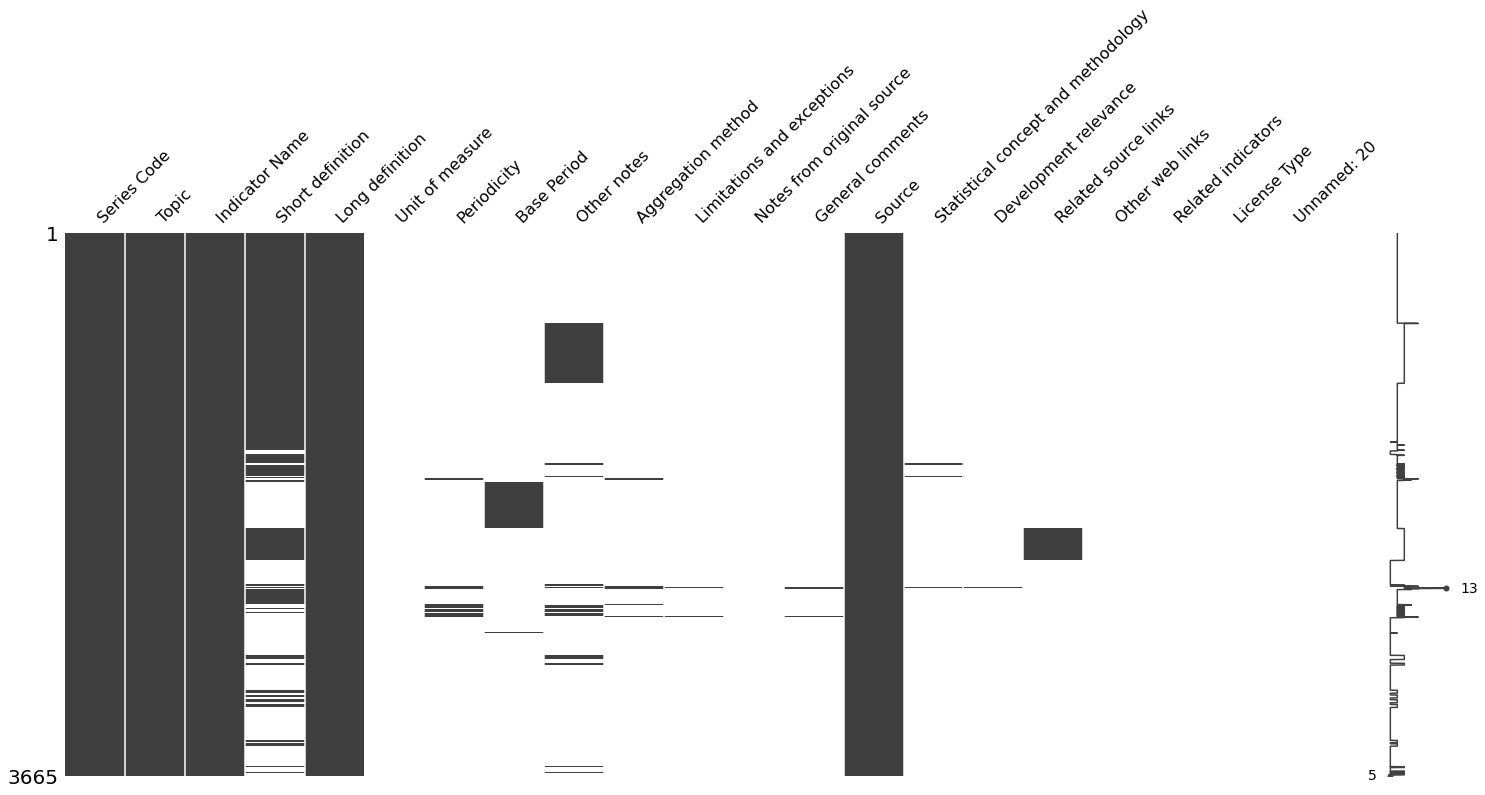

In [84]:
# Matrice des Valeurs Manquantes de la Dataframe :

msno.matrix(ed_stat_series_data5)

In [85]:
# Valeurs dupliquées dans l'ensemble de la Dataframe :

ed_stat_foot_note_data4.duplicated().sum()

0

In [86]:
# Création d'une Dataframe 'nettoyée' : 

new_ed_stat_series_data5 = ed_stat_series_data5.drop(columns=["Unit of measure","Other web links","Notes from original source","Related indicators","License Type","Unnamed: 20"])

<AxesSubplot:>

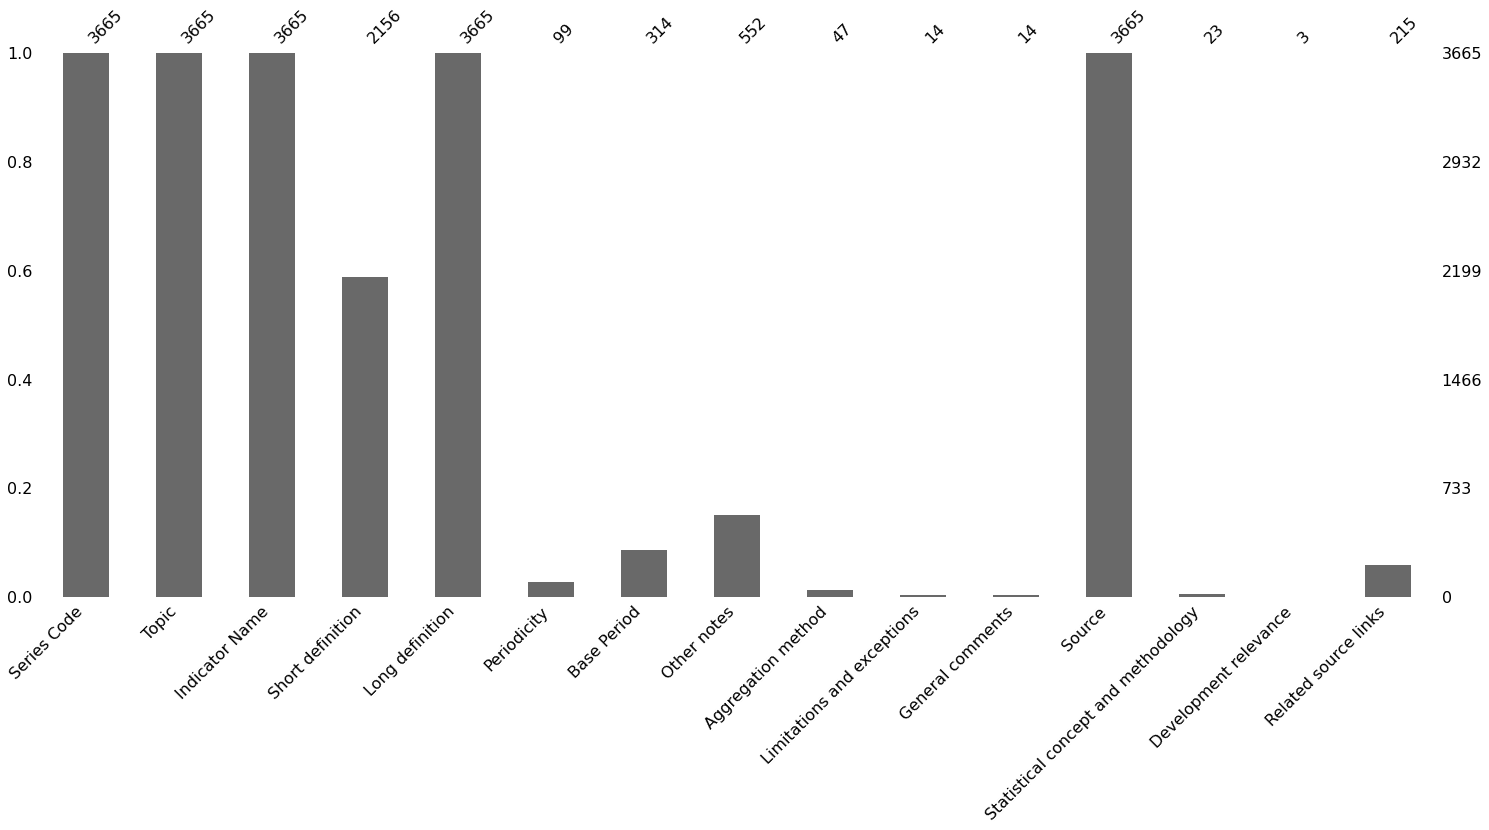

In [87]:
# Matrice des Valeurs Manquantes de la Dataframe :

msno.bar(new_ed_stat_series_data5)

In [88]:
# Contenu des 3 premières lignes de la Nouvelle Dataframe :

new_ed_stat_series_data5.head(3)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1  BAR.NOED.1519.ZS     Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   

                                                           Indicator Name  \
0  Barro-Lee: Percentage of female population age 15-19 with no education   
1  Barro-Lee: Percentage of population age 15-19 with no education          
2  Barro-Lee: Percentage of female population age 15+ with no education     

                                              Short definition  \
0  Percentage of female population age 15-19 with no education   
1  Percentage of population age 15-19 with no education          
2  Percentage of female population age 15+ with no education     

                                               Long definition Periodicity  \
0  Percentage of female population age 15-19 with no education  NaN          
1  Percentage of population age 15-19 with no education         NaN          
2  Percentage of female population age 15+ with no education    NaN          

  Base Period Other notes Aggregation method Limitations and exceptions  \
0  NaN         NaN         NaN                NaN                         
1  NaN         NaN         NaN                NaN                         
2  NaN         NaN         NaN                NaN                         

  General comments  \
0  NaN               
1  NaN               
2  NaN               

                                                       Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
1  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
2  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   

  Statistical concept and methodology Development relevance  \
0  NaN                                 NaN                    
1  NaN                                 NaN                    
2  NaN                                 NaN                    

  Related source links  
0  NaN                  
1  NaN                  
2  NaN

Conclusion :
    
- La cinquième et dernière dataframe présente des objectifs gouvernementaux en matière d'éducation.
- Les indicateurs de cette dataframe nous seront très utiles pour mettre en évidence certaines tendances.
- Initialement, la Dataframe est constituée de 3665 Lignes et de 21 Colonnes.
- La Colonne 'Unnamed: 20' est une colonne constituée de Valeurs Manquantes. Elle a donc été effacée.
- Il n'y a aucune valeur dupliquée dans cette Dataframe.

Bilan : 

Ces trois dataframes seront conservés pour la préanalyse :
    
- EdStatsData.csv : qui contient la target nom de pays (= variable 'Country Name') et l'évolution des variables quantitatives des indicateurs par pays par années.

- EdStatsCountry.csv : qui contient la target nom de pays (= variable 'Short Name') et les régions et les groupes de revenus permettant de faire des regroupements.

- EdStatSeries.csv : qui contient des mots clés susceptibles d'être utilisés lors de notre analyse.

# Analyse des Données :

# a. Recherche des Indicateurs Pertinents :

Rappel des trois dataframes modifiées :
- new_country_data2
- new_ed_stat_data3
- new_ed_stat_series_data5

In [89]:
# Utilisation de la dataframe "new_ed_stat_data3" et filtrage au niveau des années choisies pour notre étude :

datastudy = new_ed_stat_data3.filter(items=['Country Name','Country Code', 'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003','2004', '2005', '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'])

In [90]:
# Contenu des 3 premières lignes de la dataframe "filtrée" :

datastudy.head(3)

Country Name Country Code  \
0  Arab World   ARB           
1  Arab World   ARB           
2  Arab World   ARB           

                                                            Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)              
1  Adjusted net enrolment rate, lower secondary, female (%)                  
2  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   

   Indicator Code  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
0  UIS.NERA.2     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1  UIS.NERA.2.F   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2  UIS.NERA.2.GPI NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

   2010  2011  2012  2013  2014  2015  2016  
0 NaN   NaN   NaN   NaN   NaN   NaN   NaN    
1 NaN   NaN   NaN   NaN   NaN   NaN   NaN    
2 NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [91]:
# Variables de notre Dataframe : 

datastudy.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [92]:
# Nombres d'Indicateurs Différents :

datastudy['Indicator Name'].nunique()

3665

In [93]:
# Nombres de Noms de Pays Différents :

datastudy['Country Name'].nunique()

242

In [94]:
# Utilisation d'une dataframe Code Pays :

countrycodename = pd.read_csv('all.csv')
countrycodename.rename(columns={'region': 'Region'})
codepays = countrycodename.rename(columns={'alpha-3': 'Country Code'})
codepays

name alpha-2  \
0    Afghanistan                                           AF       
1    Åland Islands                                         AX       
2    Albania                                               AL       
3    Algeria                                               DZ       
4    American Samoa                                        AS       
5    Andorra                                               AD       
6    Angola                                                AO       
7    Anguilla                                              AI       
8    Antarctica                                            AQ       
9    Antigua and Barbuda                                   AG       
10   Argentina                                             AR       
11   Armenia                                               AM       
12   Aruba                                                 AW       
13   Australia                                             AU       
14   Austria                                               AT       
15   Azerbaijan                                            AZ       
16   Bahamas                                               BS       
17   Bahrain                                               BH       
18   Bangladesh                                            BD       
19   Barbados                                              BB       
20   Belarus                                               BY       
21   Belgium                                               BE       
22   Belize                                                BZ       
23   Benin                                                 BJ       
24   Bermuda                                               BM       
25   Bhutan                                                BT       
26   Bolivia (Plurinational State of)                      BO       
27   Bonaire, Sint Eustatius and Saba                      BQ       
28   Bosnia and Herzegovina                                BA       
29   Botswana                                              BW       
30   Bouvet Island                                         BV       
31   Brazil                                                BR       
32   British Indian Ocean Territory                        IO       
33   Brunei Darussalam                                     BN       
34   Bulgaria                                              BG       
35   Burkina Faso                                          BF       
36   Burundi                                               BI       
37   Cabo Verde                                            CV       
38   Cambodia                                              KH       
39   Cameroon                                              CM       
40   Canada                                                CA       
41   Cayman Islands                                        KY       
42   Central African Republic                              CF       
43   Chad                                                  TD       
44   Chile                                                 CL       
45   China                                                 CN       
46   Christmas Island                                      CX       
47   Cocos (Keeling) Islands                               CC       
48   Colombia                                              CO       
49   Comoros                                               KM       
50   Congo                                                 CG       
51   Congo, Democratic Republic of the                     CD       
52   Cook Islands                                          CK       
53   Costa Rica                                            CR       
54   Côte d'Ivoire                                         CI       
55   Croatia                                               HR       
56   Cuba                                                  CU       
57   Curaçao                                       

In [95]:
# Fusion des dataframes ""new_ed_stat_data3" et "new_country_data2":

datastudysupreme = datastudy.merge(right = new_country_data2[['Country Code', 'Region']], 
                  on='Country Code', how='left')
datastudysupreme

Country Name Country Code  \
0       Arab World   ARB           
1       Arab World   ARB           
2       Arab World   ARB           
3       Arab World   ARB           
4       Arab World   ARB           
...            ...   ...           
886925  Zimbabwe     ZWE           
886926  Zimbabwe     ZWE           
886927  Zimbabwe     ZWE           
886928  Zimbabwe     ZWE           
886929  Zimbabwe     ZWE           

                                                                 Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, both sexes (%)              
1       Adjusted net enrolment rate, lower secondary, female (%)                  
2       Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
3       Adjusted net enrolment rate, lower secondary, male (%)                    
4       Adjusted net enrolment rate, primary, both sexes (%)                      
...                                                      ...                      
886925  Youth illiterate population, 15-24 years, male (number)                   
886926  Youth literacy rate, population 15-24 years, both sexes (%)               
886927  Youth literacy rate, population 15-24 years, female (%)                   
886928  Youth literacy rate, population 15-24 years, gender parity index (GPI)    
886929  Youth literacy rate, population 15-24 years, male (%)                     

              Indicator Code       2000       2001       2002       2003  \
0       UIS.NERA.2           NaN        NaN        NaN        NaN          
1       UIS.NERA.2.F         NaN        NaN        NaN        NaN          
2       UIS.NERA.2.GPI       NaN        NaN        NaN        NaN          
3       UIS.NERA.2.M         NaN        NaN        NaN        NaN          
4       SE.PRM.TENR           77.245682  78.800522  80.051399  80.805389   
...             ...                 ...        ...        ...        ...   
886925  UIS.LP.AG15T24.M     NaN        NaN        NaN        NaN          
886926  SE.ADT.1524.LT.ZS    NaN        NaN        NaN        NaN          
886927  SE.ADT.1524.LT.FE.ZS NaN        NaN        NaN        NaN          
886928  SE.ADT.1524.LT.FM.ZS NaN        NaN        NaN        NaN          
886929  SE.ADT.1524.LT.MA.ZS NaN        NaN        NaN        NaN          

             2004       2005       2006       2007       2008       2009  \
0      NaN        NaN        NaN        NaN        NaN        NaN          
1      NaN        NaN        NaN        NaN        NaN        NaN          
2      NaN        NaN        NaN        NaN        NaN        NaN          
3      NaN        NaN        NaN        NaN        NaN        NaN          
4       81.607063  82.489487  82.685509  83.280342  84.011871  84.195961   
...           ...        ...        ...        ...        ...        ...   
886925 NaN        NaN        NaN        NaN        NaN        NaN          
886926 NaN        NaN        NaN        NaN        NaN        NaN          
886927 NaN        NaN        NaN        NaN        NaN        NaN          
886928 NaN        NaN        NaN        NaN        NaN        NaN          
886929 NaN        NaN        NaN        NaN        NaN        NaN          

             2010          2011       2012      2013           2014  2015  \
0      NaN        NaN           NaN        NaN       NaN            NaN     
1      NaN        NaN           NaN        NaN       NaN            NaN     
2      NaN        NaN           NaN        NaN       NaN            NaN     
3      NaN        NaN           NaN        NaN       NaN            NaN     
4       85.211998  85.24514      86.101669  85.51194  85.320152     NaN     
...           ...       ...            ...       ...        ...      ..     
886925 NaN         166679.00000 NaN        NaN        199464.000000 NaN     
886926 NaN         90.93070     NaN        NaN        90.428120     NaN     
886927 NaN         92.12456     NaN        NaN        93.1

In [96]:
# Fusion des dataframes "code pays" et "datastudysupreme" :

mergecodedata = pd.merge(codepays,datastudysupreme, how= "left", on= "Country Code")
mergecodedata

name alpha-2 Country Code  country-code     iso_3166-2  region  \
0       Afghanistan  AF      AFG          4             ISO 3166-2:AF  Asia     
1       Afghanistan  AF      AFG          4             ISO 3166-2:AF  Asia     
2       Afghanistan  AF      AFG          4             ISO 3166-2:AF  Asia     
3       Afghanistan  AF      AFG          4             ISO 3166-2:AF  Asia     
4       Afghanistan  AF      AFG          4             ISO 3166-2:AF  Asia     
...             ...  ..      ...         ..                       ...   ...     
788004  Zimbabwe     ZW      ZWE          716           ISO 3166-2:ZW  Africa   
788005  Zimbabwe     ZW      ZWE          716           ISO 3166-2:ZW  Africa   
788006  Zimbabwe     ZW      ZWE          716           ISO 3166-2:ZW  Africa   
788007  Zimbabwe     ZW      ZWE          716           ISO 3166-2:ZW  Africa   
788008  Zimbabwe     ZW      ZWE          716           ISO 3166-2:ZW  Africa   

                sub-region intermediate-region  region-code  sub-region-code  \
0       Southern Asia       NaN                 142.0        34.0              
1       Southern Asia       NaN                 142.0        34.0              
2       Southern Asia       NaN                 142.0        34.0              
3       Southern Asia       NaN                 142.0        34.0              
4       Southern Asia       NaN                 142.0        34.0              
...               ...       ...                   ...         ...              
788004  Sub-Saharan Africa  Eastern Africa      2.0          202.0             
788005  Sub-Saharan Africa  Eastern Africa      2.0          202.0             
788006  Sub-Saharan Africa  Eastern Africa      2.0          202.0             
788007  Sub-Saharan Africa  Eastern Africa      2.0          202.0             
788008  Sub-Saharan Africa  Eastern Africa      2.0          202.0             

        intermediate-region-code Country Name  \
0      NaN                        Afghanistan   
1      NaN                        Afghanistan   
2      NaN                        Afghanistan   
3      NaN                        Afghanistan   
4      NaN                        Afghanistan   
...     ..                                ...   
788004  14.0                      Zimbabwe      
788005  14.0                      Zimbabwe      
788006  14.0                      Zimbabwe      
788007  14.0                      Zimbabwe      
788008  14.0                      Zimbabwe      

                                                                 Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, both sexes (%)              
1       Adjusted net enrolment rate, lower secondary, female (%)                  
2       Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
3       Adjusted net enrolment rate, lower secondary, male (%)                    
4       Adjusted net enrolment rate, primary, both sexes (%)                      
...                                                      ...                      
788004  Youth illiterate population, 15-24 years, male (number)                   
788005  Youth literacy rate, population 15-24 years, both sexes (%)               
788006  Youth literacy rate, population 15-24 years, female (%)                   
788007  Youth literacy rate, population 15-24 years, gender parity index (GPI)    
788008  Youth literacy rate, population 15-24 years, male (%)                     

              Indicator Code  2000  2001  2002  2003  2004  2005  2006  \
0       UIS.NERA.2           NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1       UIS.NERA.2.F         NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2       UIS.NERA.2.GPI       NaN   NaN   NaN   NaN   NaN   NaN   NaN     
3       UIS.NERA.2.M         NaN   NaN   NaN   NaN   NaN   NaN   NaN     
4       SE.PRM.TENR          NaN   NaN   NaN   NaN   NaN   NaN   NaN     
...             ...           ..    ..    ..    .. 

In [97]:
# Filtrage de la dataframe :

datapropre = mergecodedata.filter(items=['Country Name','Country Code','Region','sub-region','Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003','2004', '2005', '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'])
datapropre

Country Name Country Code              Region          sub-region  \
0       Afghanistan  AFG          South Asia          Southern Asia        
1       Afghanistan  AFG          South Asia          Southern Asia        
2       Afghanistan  AFG          South Asia          Southern Asia        
3       Afghanistan  AFG          South Asia          Southern Asia        
4       Afghanistan  AFG          South Asia          Southern Asia        
...             ...  ...                 ...                    ...        
788004  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
788005  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
788006  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
788007  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
788008  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   

                                                                 Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, both sexes (%)              
1       Adjusted net enrolment rate, lower secondary, female (%)                  
2       Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
3       Adjusted net enrolment rate, lower secondary, male (%)                    
4       Adjusted net enrolment rate, primary, both sexes (%)                      
...                                                      ...                      
788004  Youth illiterate population, 15-24 years, male (number)                   
788005  Youth literacy rate, population 15-24 years, both sexes (%)               
788006  Youth literacy rate, population 15-24 years, female (%)                   
788007  Youth literacy rate, population 15-24 years, gender parity index (GPI)    
788008  Youth literacy rate, population 15-24 years, male (%)                     

              Indicator Code  2000  2001  2002  2003  2004  2005  2006  \
0       UIS.NERA.2           NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1       UIS.NERA.2.F         NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2       UIS.NERA.2.GPI       NaN   NaN   NaN   NaN   NaN   NaN   NaN     
3       UIS.NERA.2.M         NaN   NaN   NaN   NaN   NaN   NaN   NaN     
4       SE.PRM.TENR          NaN   NaN   NaN   NaN   NaN   NaN   NaN     
...             ...           ..    ..    ..    ..    ..    ..    ..     
788004  UIS.LP.AG15T24.M     NaN   NaN   NaN   NaN   NaN   NaN   NaN     
788005  SE.ADT.1524.LT.ZS    NaN   NaN   NaN   NaN   NaN   NaN   NaN     
788006  SE.ADT.1524.LT.FE.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN     
788007  SE.ADT.1524.LT.FM.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN     
788008  SE.ADT.1524.LT.MA.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN     

             2007  2008  2009  2010          2011  2012       2013  \
0       28.059870 NaN   NaN   NaN   NaN           NaN    47.436790   
1       15.223100 NaN   NaN   NaN   NaN           NaN    34.073261   
2       0.379130  NaN   NaN   NaN   NaN           NaN    0.567060    
3       40.152851 NaN   NaN   NaN   NaN           NaN    60.087059   
4      NaN        NaN   NaN   NaN   NaN           NaN   NaN          
...     ..         ..    ..    ..    ..            ..    ..          
788004 NaN        NaN   NaN   NaN    166679.00000 NaN   NaN          
788005 NaN        NaN   NaN   NaN    90.93070     NaN   NaN          
788006 NaN        NaN   NaN   NaN    92.12456     NaN   NaN          
788007 NaN        NaN   NaN   NaN    1.02828      NaN   NaN          
788008 NaN        NaN   NaN   NaN    89.59058     NaN   NaN          

                 2014  2015  2016  
0       50.627232     NaN   NaN    
1       37.641541     NaN   NaN    
2       0.598370      NaN   NaN    
3       62.906952     NaN   NaN    
4      NaN            NaN   NaN    
...     ..             ..    ..    
788004  199464.000000 NaN   NaN    
788005  90.428120     NaN   NaN    
788006  93.188350     NaN   NaN    
788007 

In [98]:
# Apercu des pays dans notre dataframe :

datapropre["Country Name"].tolist()

['Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghan

In [99]:
# Indices de notre fusion de plusieurs Dataframes :

datapropre.columns

Index(['Country Name', 'Country Code', 'Region', 'sub-region',
       'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016'],
      dtype='object')

La cible de notre entreprise :

- La population des 15-24 ans.
- La population des 20-24 ans.
- Le nombre d'étudiants scolarisés au niveau lycée et universités.
- Le contexte économique par pays (Produit Intérieur Brut).
- Les moyens de communication (accès à l'informatique, accès au réseau internet).

Les différents mots clés à rechercher :

- 15 : pour la cible de la population des 15-19 ans.
- 20 : pour la cible de la population des 20-24 ans.
- ENROLMENT : pour l'éducation.
- GDP : pour l'économie.
- IT : pour l'accès aux infrastructures techniques (Internet).
- CP : pour l'accès aux ordinateurs.

In [100]:
# Ciblage "15-24" :

cible15 = datapropre.loc[datapropre['Indicator Name'].str.contains("15-24", case = False, na= False)]
cible15

Country Name Country Code              Region          sub-region  \
2480    Afghanistan  AFG          South Asia          Southern Asia        
2481    Afghanistan  AFG          South Asia          Southern Asia        
2482    Afghanistan  AFG          South Asia          Southern Asia        
3657    Afghanistan  AFG          South Asia          Southern Asia        
3658    Afghanistan  AFG          South Asia          Southern Asia        
...             ...  ...                 ...                    ...        
788004  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
788005  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
788006  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
788007  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
788008  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   

                                                                Indicator Name  \
2480    Population, ages 15-24, female                                           
2481    Population, ages 15-24, male                                             
2482    Population, ages 15-24, total                                            
3657    Youth illiterate population, 15-24 years, % female                       
3658    Youth illiterate population, 15-24 years, both sexes (number)            
...                                                               ...            
788004  Youth illiterate population, 15-24 years, male (number)                  
788005  Youth literacy rate, population 15-24 years, both sexes (%)              
788006  Youth literacy rate, population 15-24 years, female (%)                  
788007  Youth literacy rate, population 15-24 years, gender parity index (GPI)   
788008  Youth literacy rate, population 15-24 years, male (%)                    

              Indicator Code       2000       2001       2002       2003  \
2480    SP.POP.1524.FE.UN     1907268.0  1976075.0  2057900.0  2150701.0   
2481    SP.POP.1524.MA.UN     2072170.0  2146594.0  2235157.0  2335555.0   
2482    SP.POP.1524.TO.UN     3979438.0  4122669.0  4293057.0  4486256.0   
3657    UIS.LPP.AG15T24      NaN        NaN        NaN        NaN          
3658    UIS.LP.AG15T24       NaN        NaN        NaN        NaN          
...                ...        ..         ..         ..         ..          
788004  UIS.LP.AG15T24.M     NaN        NaN        NaN        NaN          
788005  SE.ADT.1524.LT.ZS    NaN        NaN        NaN        NaN          
788006  SE.ADT.1524.LT.FE.ZS NaN        NaN        NaN        NaN          
788007  SE.ADT.1524.LT.FM.ZS NaN        NaN        NaN        NaN          
788008  SE.ADT.1524.LT.MA.ZS NaN        NaN        NaN        NaN          

             2004       2005       2006       2007       2008       2009  \
2480    2250644.0  2354711.0  2462688.0  2575153.0  2690646.0  2807445.0   
2481    2443498.0  2555629.0  2671689.0  2792346.0  2916090.0  3041159.0   
2482    4694142.0  4910340.0  5134377.0  5367499.0  5606736.0  5848604.0   
3657   NaN        NaN        NaN        NaN        NaN        NaN          
3658   NaN        NaN        NaN        NaN        NaN        NaN          
...     ..         ..         ..         ..         ..         ..          
788004 NaN        NaN        NaN        NaN        NaN        NaN          
788005 NaN        NaN        NaN        NaN        NaN        NaN          
788006 NaN        NaN        NaN        NaN        NaN        NaN          
788007 NaN        NaN        NaN        NaN        NaN        NaN          
788008 NaN        NaN        NaN        NaN        NaN        NaN          

             2010          2011       2012       2013          2014  \
2480    2924135.0  3.040254e+06  3155464.0  3268718.0  3.378896e+06   
2481    3166104.0  3.290430e+06  3413775.0  3535067.0  3.653176e+06   
2482    6090239.0  6.330684e+06  6569239.0  6803785.0  7.032072e+06   

In [101]:
# Ciblage "20-24" :

cible20 = datapropre.loc[datapropre['Indicator Name'].str.contains("20-24", case = False, na= False)]
cible20

Country Name Country Code              Region          sub-region  \
153     Afghanistan  AFG          South Asia          Southern Asia        
154     Afghanistan  AFG          South Asia          Southern Asia        
183     Afghanistan  AFG          South Asia          Southern Asia        
184     Afghanistan  AFG          South Asia          Southern Asia        
213     Afghanistan  AFG          South Asia          Southern Asia        
...             ...  ...                 ...                    ...        
787960  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
787961  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
787962  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
787963  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
787964  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   

                                                                                                                        Indicator Name  \
153     Barro-Lee: Average years of primary schooling, age 20-24, female                                                                 
154     Barro-Lee: Average years of primary schooling, age 20-24, total                                                                  
183     Barro-Lee: Average years of secondary schooling, age 20-24, female                                                               
184     Barro-Lee: Average years of secondary schooling, age 20-24, total                                                                
213     Barro-Lee: Average years of tertiary schooling, age 20-24, female                                                                
...                                                                   ...                                                                
787960  Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Primary. Male             
787961  Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Primary. Total            
787962  Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Female   
787963  Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Male     
787964  Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total    

              Indicator Code  2000  2001  2002  2003  2004  2005  2006  2007  \
153     BAR.PRM.SCHL.2024.FE  1.26 NaN   NaN   NaN   NaN    2.00 NaN   NaN     
154     BAR.PRM.SCHL.2024     2.48 NaN   NaN   NaN   NaN    3.93 NaN   NaN     
183     BAR.SEC.SCHL.2024.FE  0.43 NaN   NaN   NaN   NaN    0.27 NaN   NaN     
184     BAR.SEC.SCHL.2024     0.92 NaN   NaN   NaN   NaN    1.03 NaN   NaN     
213     BAR.TER.SCHL.2024.FE  0.11 NaN   NaN   NaN   NaN    0.08 NaN   NaN     
...                      ...   ...  ..    ..    ..    ..     ...  ..    ..     
787960  PRJ.POP.2024.1.MA    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
787961  PRJ.POP.2024.1.MF    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
787962  PRJ.POP.2024.3.FE    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
787963  PRJ.POP.2024.3.MA    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     
787964  PRJ.POP.2024.3.MF    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     

        2008  2009    2010  2011  2012  2013  2014    2015  2016  
153    NaN   NaN    1.29   NaN   NaN   NaN   NaN   NaN     NaN    
154    NaN   NaN    2.64   NaN   NaN   NaN   NaN   NaN     NaN    
183    NaN   NaN    0.96   NaN   NaN   NaN   NaN   NaN     NaN    
184    NaN   NaN    1.70   NaN   NaN   NaN   NaN   NaN     NaN    
213    NaN   NaN    0.08   NaN   NaN   NaN   NaN   NaN     NaN    
...     ..    ..     ...    ..    ..    ..    ..    ..      ..    
787960 

In [102]:
# Ciblage Education :

cibleEnrolment = datapropre.loc[datapropre['Indicator Name'].str.contains("enrolment", case = False, na= False)]
cibleEnrolment

Country Name Country Code              Region          sub-region  \
0       Afghanistan  AFG          South Asia          Southern Asia        
1       Afghanistan  AFG          South Asia          Southern Asia        
2       Afghanistan  AFG          South Asia          Southern Asia        
3       Afghanistan  AFG          South Asia          Southern Asia        
4       Afghanistan  AFG          South Asia          Southern Asia        
...             ...  ...                 ...                    ...        
787685  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
787686  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
787687  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
787688  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
787689  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   

                                                                 Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, both sexes (%)              
1       Adjusted net enrolment rate, lower secondary, female (%)                  
2       Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
3       Adjusted net enrolment rate, lower secondary, male (%)                    
4       Adjusted net enrolment rate, primary, both sexes (%)                      
...                                                      ...                      
787685  Under-age enrolment ratio in primary education, female (%)                
787686  Under-age enrolment ratio in primary education, male (%)                  
787687  Under-age enrolment ratio in secondary education, both sexes (%)          
787688  Under-age enrolment ratio in secondary education, female (%)              
787689  Under-age enrolment ratio in secondary education, male (%)                

        Indicator Code     2000     2001     2002     2003  2004  2005  2006  \
0       UIS.NERA.2     NaN      NaN      NaN      NaN      NaN   NaN   NaN     
1       UIS.NERA.2.F   NaN      NaN      NaN      NaN      NaN   NaN   NaN     
2       UIS.NERA.2.GPI NaN      NaN      NaN      NaN      NaN   NaN   NaN     
3       UIS.NERA.2.M   NaN      NaN      NaN      NaN      NaN   NaN   NaN     
4       SE.PRM.TENR    NaN      NaN      NaN      NaN      NaN   NaN   NaN     
...             ...     ..       ..       ..       ..       ..    ..    ..     
787685  UIS.UAPP.1.F    1.55407  2.20592  1.74597  2.03613 NaN   NaN   NaN     
787686  UIS.UAPP.1.M    1.49257  1.95385  1.56975  1.82973 NaN   NaN   NaN     
787687  UIS.UAPP.23     0.87042  0.88632  0.81414  0.83525 NaN   NaN   NaN     
787688  UIS.UAPP.23.F   1.00539  1.02659  0.94785  0.98268 NaN   NaN   NaN     
787689  UIS.UAPP.23.M   0.73538  0.74558  0.67971  0.68691 NaN   NaN   NaN     

             2007  2008  2009  2010  2011     2012       2013       2014  \
0       28.059870 NaN   NaN   NaN   NaN   NaN       47.436790  50.627232   
1       15.223100 NaN   NaN   NaN   NaN   NaN       34.073261  37.641541   
2       0.379130  NaN   NaN   NaN   NaN   NaN       0.567060   0.598370    
3       40.152851 NaN   NaN   NaN   NaN   NaN       60.087059  62.906952   
4      NaN        NaN   NaN   NaN   NaN   NaN      NaN        NaN          
...     ..         ..    ..    ..    ..    ..       ..         ..          
787685 NaN        NaN   NaN   NaN   NaN    0.61367  0.443730  NaN          
787686 NaN        NaN   NaN   NaN   NaN    0.55601  0.414820  NaN          
787687 NaN        NaN   NaN   NaN   NaN    0.51016  0.583580  NaN          
787688 NaN        NaN   NaN   NaN   NaN    0.64146  0.723340  NaN          
787689 NaN        NaN   NaN   NaN   NaN    0.37834  0.443310  NaN          

        2015  2016  
0      NaN   NaN    
1      NaN   NaN    
2      NaN   NaN    
3      NaN   NaN    
4      NaN   NaN    
...     ..    ..    
787685 NaN   NaN    
787686 NaN   NaN    
787687 NaN   NaN    
787688 NaN   

In [103]:
# Ciblage Economie :

ciblePIB = datapropre.loc[datapropre['Indicator Name'].str.contains("GDP", case = False, na= False)]
ciblePIB

Country Name Country Code              Region          sub-region  \
1242    Afghanistan  AFG          South Asia          Southern Asia        
1243    Afghanistan  AFG          South Asia          Southern Asia        
1244    Afghanistan  AFG          South Asia          Southern Asia        
1245    Afghanistan  AFG          South Asia          Southern Asia        
1246    Afghanistan  AFG          South Asia          Southern Asia        
...             ...  ...                 ...                    ...        
785620  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
785625  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
785630  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
785635  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
785640  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   

                                                                                   Indicator Name  \
1242    GDP at market prices (constant 2005 US$)                                                    
1243    GDP at market prices (current US$)                                                          
1244    GDP per capita (constant 2005 US$)                                                          
1245    GDP per capita (current US$)                                                                
1246    GDP per capita, PPP (constant 2011 international $)                                         
...                                                     ...                                         
785620  Government expenditure per post-secondary non-tertiary student as % of GDP per capita (%)   
785625  Government expenditure per primary student as % of GDP per capita (%)                       
785630  Government expenditure per secondary student as % of GDP per capita (%)                     
785635  Government expenditure per tertiary student as % of GDP per capita (%)                      
785640  Government expenditure per upper secondary student as % of GDP per capita (%)               

                  Indicator Code  2000          2001          2002  \
1242    NY.GDP.MKTP.KD           NaN   NaN            8.013233e+09   
1243    NY.GDP.MKTP.CD           NaN    2.461666e+09  4.128821e+09   
1244    NY.GDP.PCAP.KD           NaN   NaN            3.645706e+02   
1245    NY.GDP.PCAP.CD           NaN    1.174097e+02  1.878451e+02   
1246    NY.GDP.PCAP.PP.KD        NaN   NaN            1.063636e+03   
...                   ...         ..    ..                     ...   
785620  UIS.XUNIT.GDPCAP.4.FSGOV NaN   NaN           NaN             
785625  SE.XPD.PRIM.PC.ZS        NaN   NaN           NaN             
785630  SE.XPD.SECO.PC.ZS        NaN   NaN           NaN             
785635  SE.XPD.TERT.PC.ZS        NaN   NaN           NaN             
785640  UIS.XUNIT.GDPCAP.3.FSGOV NaN   NaN           NaN             

                2003          2004          2005          2006          2007  \
1242    8.689884e+09  8.781610e+09  9.762979e+09  1.030523e+10  1.172119e+10   
1243    4.583644e+09  5.285466e+09  6.275074e+09  7.057598e+09  9.843842e+09   
1244    3.767587e+02  3.640954e+02  3.894164e+02  3.979859e+02  4.403682e+02   
1245    1.987285e+02  2.191414e+02  2.502941e+02  2.725631e+02  3.698358e+02   
1246    1.099195e+03  1.062249e+03  1.136123e+03  1.161125e+03  1.284775e+03   
...              ...           ...           ...           ...           ...   
785620 NaN           NaN           NaN           NaN           NaN             
785625 NaN           NaN           NaN           NaN           NaN             
785630 NaN           NaN           NaN           NaN           NaN             
785635 NaN           NaN           NaN           NaN           NaN             
785640 NaN           NaN           NaN           NaN           NaN             

                2008          2009          2010          2011          2012  \

In [104]:
# Ciblage Internet :

cibleIT = datapropre.loc[datapropre['Indicator Name'].str.contains("Internet", case = False, na= False)]
cibleIT

Country Name Country Code  \
1375    Afghanistan                     AFG           
5041    Albania                         ALB           
8706    Algeria                         DZA           
12371   American Samoa                  ASM           
16036   Andorra                         AND           
19701   Angola                          AGO           
23368   Antigua and Barbuda             ATG           
27033   Argentina                       ARG           
30698   Armenia                         ARM           
34363   Aruba                           ABW           
38028   Australia                       AUS           
41693   Austria                         AUT           
45358   Azerbaijan                      AZE           
49023   Bahamas, The                    BHS           
52688   Bahrain                         BHR           
56353   Bangladesh                      BGD           
60018   Barbados                        BRB           
63683   Belarus                         BLR           
67348   Belgium                         BEL           
71013   Belize                          BLZ           
74678   Benin                           BEN           
78343   Bermuda                         BMU           
82008   Bhutan                          BTN           
85673   Bolivia                         BOL           
89339   Bosnia and Herzegovina          BIH           
93004   Botswana                        BWA           
96670   Brazil                          BRA           
100336  Brunei Darussalam               BRN           
104001  Bulgaria                        BGR           
107666  Burkina Faso                    BFA           
111331  Burundi                         BDI           
114996  Cabo Verde                      CPV           
118661  Cambodia                        KHM           
122326  Cameroon                        CMR           
125991  Canada                          CAN           
129656  Cayman Islands                  CYM           
133321  Central African Republic        CAF           
136986  Chad                            TCD           
140651  Chile                           CHL           
144316  China                           CHN           
147983  Colombia                        COL           
151648  Comoros                         COM           
155313  Congo, Rep.                     COG           
158978  Congo, Dem. Rep.                COD           
162644  Costa Rica                      CRI           
166309  Cote d'Ivoire                   CIV           
169974  Croatia                         HRV           
173639  Cuba                            CUB           
177304  Curacao                         CUW           
180969  Cyprus                          CYP           
184634  Czech Republic                  CZE           
188299  Denmark                         DNK           
191964  Djibouti                        DJI           
195629  Dominica                        DMA           
199294  Dominican Republic              DOM           
202959  Ecuador                         ECU           
206624  Egypt, Arab Rep.                EGY           
210289  El Salvador                     SLV           
213954  Equatorial Guinea               GNQ           
217619  Eritrea                         ERI           
221284  Estonia                         EST           
224949  Swaziland                       SWZ           
228614  Ethiopia                        ETH           
232280  Faroe Islands                   FRO           
235945  Fiji                            FJI           
239610  Finland                         FIN           
243275  France                          FRA           
246941  French Polynesia                PYF           
250607  Gabon                           GAB           
254272  Gambia, The                     GMB           
257937  Georgia                         GEO           
261602  Germany                         DEU           
265267  Gha

In [105]:
# Ciblage Ordinateur :

cibleCP = datapropre.loc[datapropre['Indicator Name'].str.contains("Computer", case = False, na= False)]
cibleCP

Country Name Country Code              Region          sub-region  \
2084    Afghanistan  AFG          South Asia          Southern Asia        
2102    Afghanistan  AFG          South Asia          Southern Asia        
2103    Afghanistan  AFG          South Asia          Southern Asia        
2139    Afghanistan  AFG          South Asia          Southern Asia        
2154    Afghanistan  AFG          South Asia          Southern Asia        
...             ...  ...                 ...                    ...        
786447  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
786483  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
786498  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
786525  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
786526  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   

                                                                                                                                              Indicator Name  \
2084    Personal computers (per 100 people)                                                                                                                    
2102    PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). No computer experience                                      
2103    PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment                      
2139    PIAAC: Female adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test   
2154    PIAAC: Male adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test     
...                                                                                                                                                    ...     
786447  PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment                      
786483  PIAAC: Female adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test   
786498  PIAAC: Male adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test     
786525  PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test    
786526  PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment                

                 Indicator Code  2000  2001  2002  2003  2004      2005  \
2084    IT.CMP.PCMP.P2          NaN   NaN   NaN   NaN   NaN    0.341903   
2102    LO.PIAAC.TEC.NO         NaN   NaN   NaN   NaN   NaN   NaN         
2103    LO.PIAAC.TEC.OPT        NaN   NaN   NaN   NaN   NaN   NaN         
2139    LO.PIAAC.TEC.FE.FAILNO  NaN   NaN   NaN   NaN   NaN   NaN         
2154    LO.PIAAC.TEC.MA.FAILNO  NaN   NaN   NaN   NaN   NaN   NaN         
...                        ...   ..    ..    ..    ..    ..    ..         
786447  LO.PIAAC.TEC.OPT        NaN   NaN   NaN   NaN   NaN   NaN         
786483  LO.PIAAC.TEC.FE.FAILNO  NaN   NaN   NaN   NaN   NaN   NaN         
786498  LO.PIAAC.TEC.MA.FAILNO  NaN   NaN   NaN   NaN   NaN   NaN         
786525  LO.PIAAC.TEC.YOU.FAILNO NaN   NaN   NaN   NaN   NaN   NaN         
786526  LO.PIAAC.TEC.YOU.OPT    NaN   NaN   NaN   NaN   NaN   NaN         

            2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
2084    0.390148 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    
2102   NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    
2103   NaN       NaN   NaN   NaN   

In [106]:
# Liste d'Indicateurs Retenus :

indicateurs=['UIS.E.4','UIS.E.3','SE. TER. ENRL','UIS.X.USCONST.3.FSGOV','NY.GDP.MKTP.KD','SP. POP. TOTL','SP.POP.1524.TO.UN','IT.NET.USER.P2'
,'IT.CMP.PCMP.P2']

In [107]:
# Proportion des Indicateurs Retenus, pour 2014 :

datapropre[datapropre['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2014']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2014',ascending=True)

Indicator Name  \
4  Personal computers (per 100 people)                                       
0  Enrolment in post-secondary non-tertiary education, both sexes (number)   
1  Enrolment in upper secondary education, both sexes (number)               
5  Population, ages 15-24, total                                             
2  GDP at market prices (constant 2005 US$)                                  
3  Internet users (per 100 people)                                           

      Indicator Code  2014  
4  IT.CMP.PCMP.P2     0     
0  UIS.E.4            65    
1  UIS.E.3            118   
5  SP.POP.1524.TO.UN  181   
2  NY.GDP.MKTP.KD     193   
3  IT.NET.USER.P2     201

In [108]:
# Effacement de l'Indicateur "Computer" :

indicateurs.pop()

'IT.CMP.PCMP.P2'

In [109]:
# Préparation de la Matrice de Remplissage NaN selon les Indicateurs choisis :

datapropre['NaN'] = datapropre[['Indicator Code', 'Country Name', '2014']]['2014'].isna().astype(int)
dataindicateurschoisis = datapropre[datapropre['Indicator Code'].isin(indicateurs)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')

In [110]:
# Rappel de la dataframe :

datapropre

Country Name Country Code              Region          sub-region  \
0       Afghanistan  AFG          South Asia          Southern Asia        
1       Afghanistan  AFG          South Asia          Southern Asia        
2       Afghanistan  AFG          South Asia          Southern Asia        
3       Afghanistan  AFG          South Asia          Southern Asia        
4       Afghanistan  AFG          South Asia          Southern Asia        
...             ...  ...                 ...                    ...        
788004  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
788005  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
788006  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
788007  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   
788008  Zimbabwe     ZWE          Sub-Saharan Africa  Sub-Saharan Africa   

                                                                 Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, both sexes (%)              
1       Adjusted net enrolment rate, lower secondary, female (%)                  
2       Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
3       Adjusted net enrolment rate, lower secondary, male (%)                    
4       Adjusted net enrolment rate, primary, both sexes (%)                      
...                                                      ...                      
788004  Youth illiterate population, 15-24 years, male (number)                   
788005  Youth literacy rate, population 15-24 years, both sexes (%)               
788006  Youth literacy rate, population 15-24 years, female (%)                   
788007  Youth literacy rate, population 15-24 years, gender parity index (GPI)    
788008  Youth literacy rate, population 15-24 years, male (%)                     

              Indicator Code  2000  2001  2002  2003  2004  2005  2006  \
0       UIS.NERA.2           NaN   NaN   NaN   NaN   NaN   NaN   NaN     
1       UIS.NERA.2.F         NaN   NaN   NaN   NaN   NaN   NaN   NaN     
2       UIS.NERA.2.GPI       NaN   NaN   NaN   NaN   NaN   NaN   NaN     
3       UIS.NERA.2.M         NaN   NaN   NaN   NaN   NaN   NaN   NaN     
4       SE.PRM.TENR          NaN   NaN   NaN   NaN   NaN   NaN   NaN     
...             ...           ..    ..    ..    ..    ..    ..    ..     
788004  UIS.LP.AG15T24.M     NaN   NaN   NaN   NaN   NaN   NaN   NaN     
788005  SE.ADT.1524.LT.ZS    NaN   NaN   NaN   NaN   NaN   NaN   NaN     
788006  SE.ADT.1524.LT.FE.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN     
788007  SE.ADT.1524.LT.FM.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN     
788008  SE.ADT.1524.LT.MA.ZS NaN   NaN   NaN   NaN   NaN   NaN   NaN     

             2007  2008  2009  2010          2011  2012       2013  \
0       28.059870 NaN   NaN   NaN   NaN           NaN    47.436790   
1       15.223100 NaN   NaN   NaN   NaN           NaN    34.073261   
2       0.379130  NaN   NaN   NaN   NaN           NaN    0.567060    
3       40.152851 NaN   NaN   NaN   NaN           NaN    60.087059   
4      NaN        NaN   NaN   NaN   NaN           NaN   NaN          
...     ..         ..    ..    ..    ..            ..    ..          
788004 NaN        NaN   NaN   NaN    166679.00000 NaN   NaN          
788005 NaN        NaN   NaN   NaN    90.93070     NaN   NaN          
788006 NaN        NaN   NaN   NaN    92.12456     NaN   NaN          
788007 NaN        NaN   NaN   NaN    1.02828      NaN   NaN          
788008 NaN        NaN   NaN   NaN    89.59058     NaN   NaN          

                 2014  2015  2016  NaN  
0       50.627232     NaN   NaN    0    
1       37.641541     NaN   NaN    0    
2       0.598370      NaN   NaN    0    
3       62.906952     NaN   NaN    0    
4      NaN            NaN   NaN    1    
...     ..             ..    ..   ..    
788004  199464.000000 NaN   NaN    0    
788005  90.428120     NaN   NaN    0   

In [111]:
# Sélection de la dataframe "South Asia" :

southasianan = datapropre[datapropre['Region'] == 'South Asia']
southasianan

Country Name Country Code      Region     sub-region  \
0       Afghanistan  AFG          South Asia  Southern Asia   
1       Afghanistan  AFG          South Asia  Southern Asia   
2       Afghanistan  AFG          South Asia  Southern Asia   
3       Afghanistan  AFG          South Asia  Southern Asia   
4       Afghanistan  AFG          South Asia  Southern Asia   
...             ...  ...                 ...            ...   
670718  Sri Lanka    LKA          South Asia  Southern Asia   
670719  Sri Lanka    LKA          South Asia  Southern Asia   
670720  Sri Lanka    LKA          South Asia  Southern Asia   
670721  Sri Lanka    LKA          South Asia  Southern Asia   
670722  Sri Lanka    LKA          South Asia  Southern Asia   

                                                                 Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, both sexes (%)              
1       Adjusted net enrolment rate, lower secondary, female (%)                  
2       Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
3       Adjusted net enrolment rate, lower secondary, male (%)                    
4       Adjusted net enrolment rate, primary, both sexes (%)                      
...                                                      ...                      
670718  Youth illiterate population, 15-24 years, male (number)                   
670719  Youth literacy rate, population 15-24 years, both sexes (%)               
670720  Youth literacy rate, population 15-24 years, female (%)                   
670721  Youth literacy rate, population 15-24 years, gender parity index (GPI)    
670722  Youth literacy rate, population 15-24 years, male (%)                     

              Indicator Code  2000         2001  2002  2003  2004  2005  \
0       UIS.NERA.2           NaN   NaN          NaN   NaN   NaN   NaN     
1       UIS.NERA.2.F         NaN   NaN          NaN   NaN   NaN   NaN     
2       UIS.NERA.2.GPI       NaN   NaN          NaN   NaN   NaN   NaN     
3       UIS.NERA.2.M         NaN   NaN          NaN   NaN   NaN   NaN     
4       SE.PRM.TENR          NaN   NaN          NaN   NaN   NaN   NaN     
...             ...           ..    ..           ..    ..    ..    ..     
670718  UIS.LP.AG15T24.M     NaN    89405.00000 NaN   NaN   NaN   NaN     
670719  SE.ADT.1524.LT.ZS    NaN    95.58863    NaN   NaN   NaN   NaN     
670720  SE.ADT.1524.LT.FE.ZS NaN    96.12111    NaN   NaN   NaN   NaN     
670721  SE.ADT.1524.LT.FM.ZS NaN    1.01111     NaN   NaN   NaN   NaN     
670722  SE.ADT.1524.LT.MA.ZS NaN    95.06529    NaN   NaN   NaN   NaN     

               2006       2007         2008  2009         2010  2011  2012  \
0      NaN           28.059870 NaN          NaN   NaN          NaN   NaN     
1      NaN           15.223100 NaN          NaN   NaN          NaN   NaN     
2      NaN           0.379130  NaN          NaN   NaN          NaN   NaN     
3      NaN           40.152851 NaN          NaN   NaN          NaN   NaN     
4      NaN          NaN        NaN          NaN   NaN          NaN   NaN     
...     ..           ..         ..           ..    ..           ..    ..     
670718  50464.00000 NaN         43412.00000 NaN    36776.00000 NaN   NaN     
670719  97.48406    NaN         97.98180    NaN    98.15793    NaN   NaN     
670720  97.93921    NaN         98.58610    NaN    98.58897    NaN   NaN     
670721  1.00940     NaN         1.01288     NaN    1.00924     NaN   NaN     
670722  97.02708    NaN         97.33251    NaN    97.68654    NaN   NaN     

             2013       2014  2015  2016  NaN  
0       47.436790  50.627232 NaN   NaN    0    
1       34.073261  37.641541 NaN   NaN    0    
2       0.567060   0.598370  NaN   NaN    0    
3       60.087059  62.906952 NaN   NaN    0    
4      NaN        NaN        NaN   NaN    1    
...     ..         ..         ..    ..   ..    
670718 NaN        NaN        NaN   NaN    1    
670719 NaN        NaN        Na

In [112]:
# Préparation de la Matrice de Remplissage NaN selon les Indicateurs choisis et la Région South Asia : :

southasianan['NaN'] = southasianan[['Indicator Code', 'Country Name', '2014']]['2014'].isna().astype(int)
dataindicateurschoisis2 = southasianan[southasianan['Indicator Code'].isin(indicateurs)][['Country Name', 'Indicator Code', 'NaN']].pivot(index='Country Name', columns='Indicator Code', values='NaN')

<ipython-input-112-ba27ce7c510a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southasianan['NaN'] = southasianan[['Indicator Code', 'Country Name', '2014']]['2014'].isna().astype(int)


[]

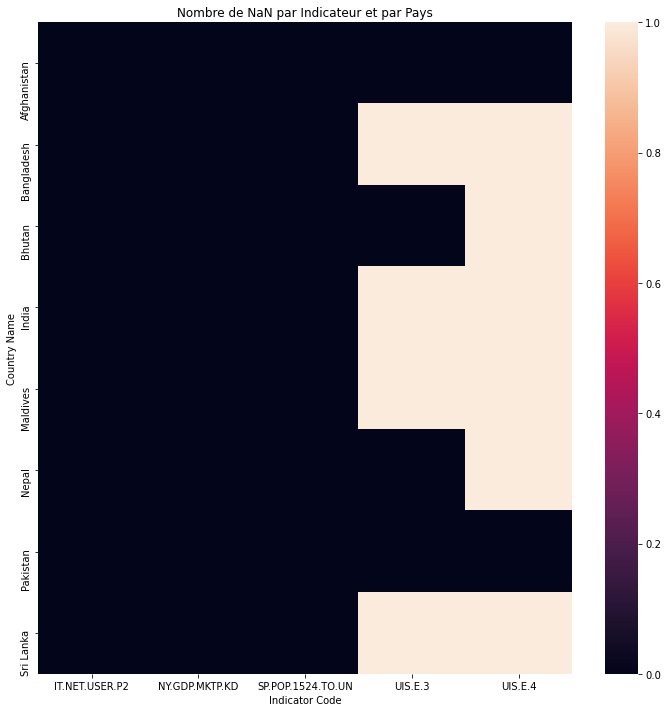

In [113]:
# Répartition des Valeurs Manquantes selon l'indicateur et la Région "South Asia" :

plt.figure(figsize=(10,10))
plt.title('Nombre de NaN par Indicateur et par Pays')

sns.heatmap(data = dataindicateurschoisis2)
plt.tight_layout()
plt.plot()

[]

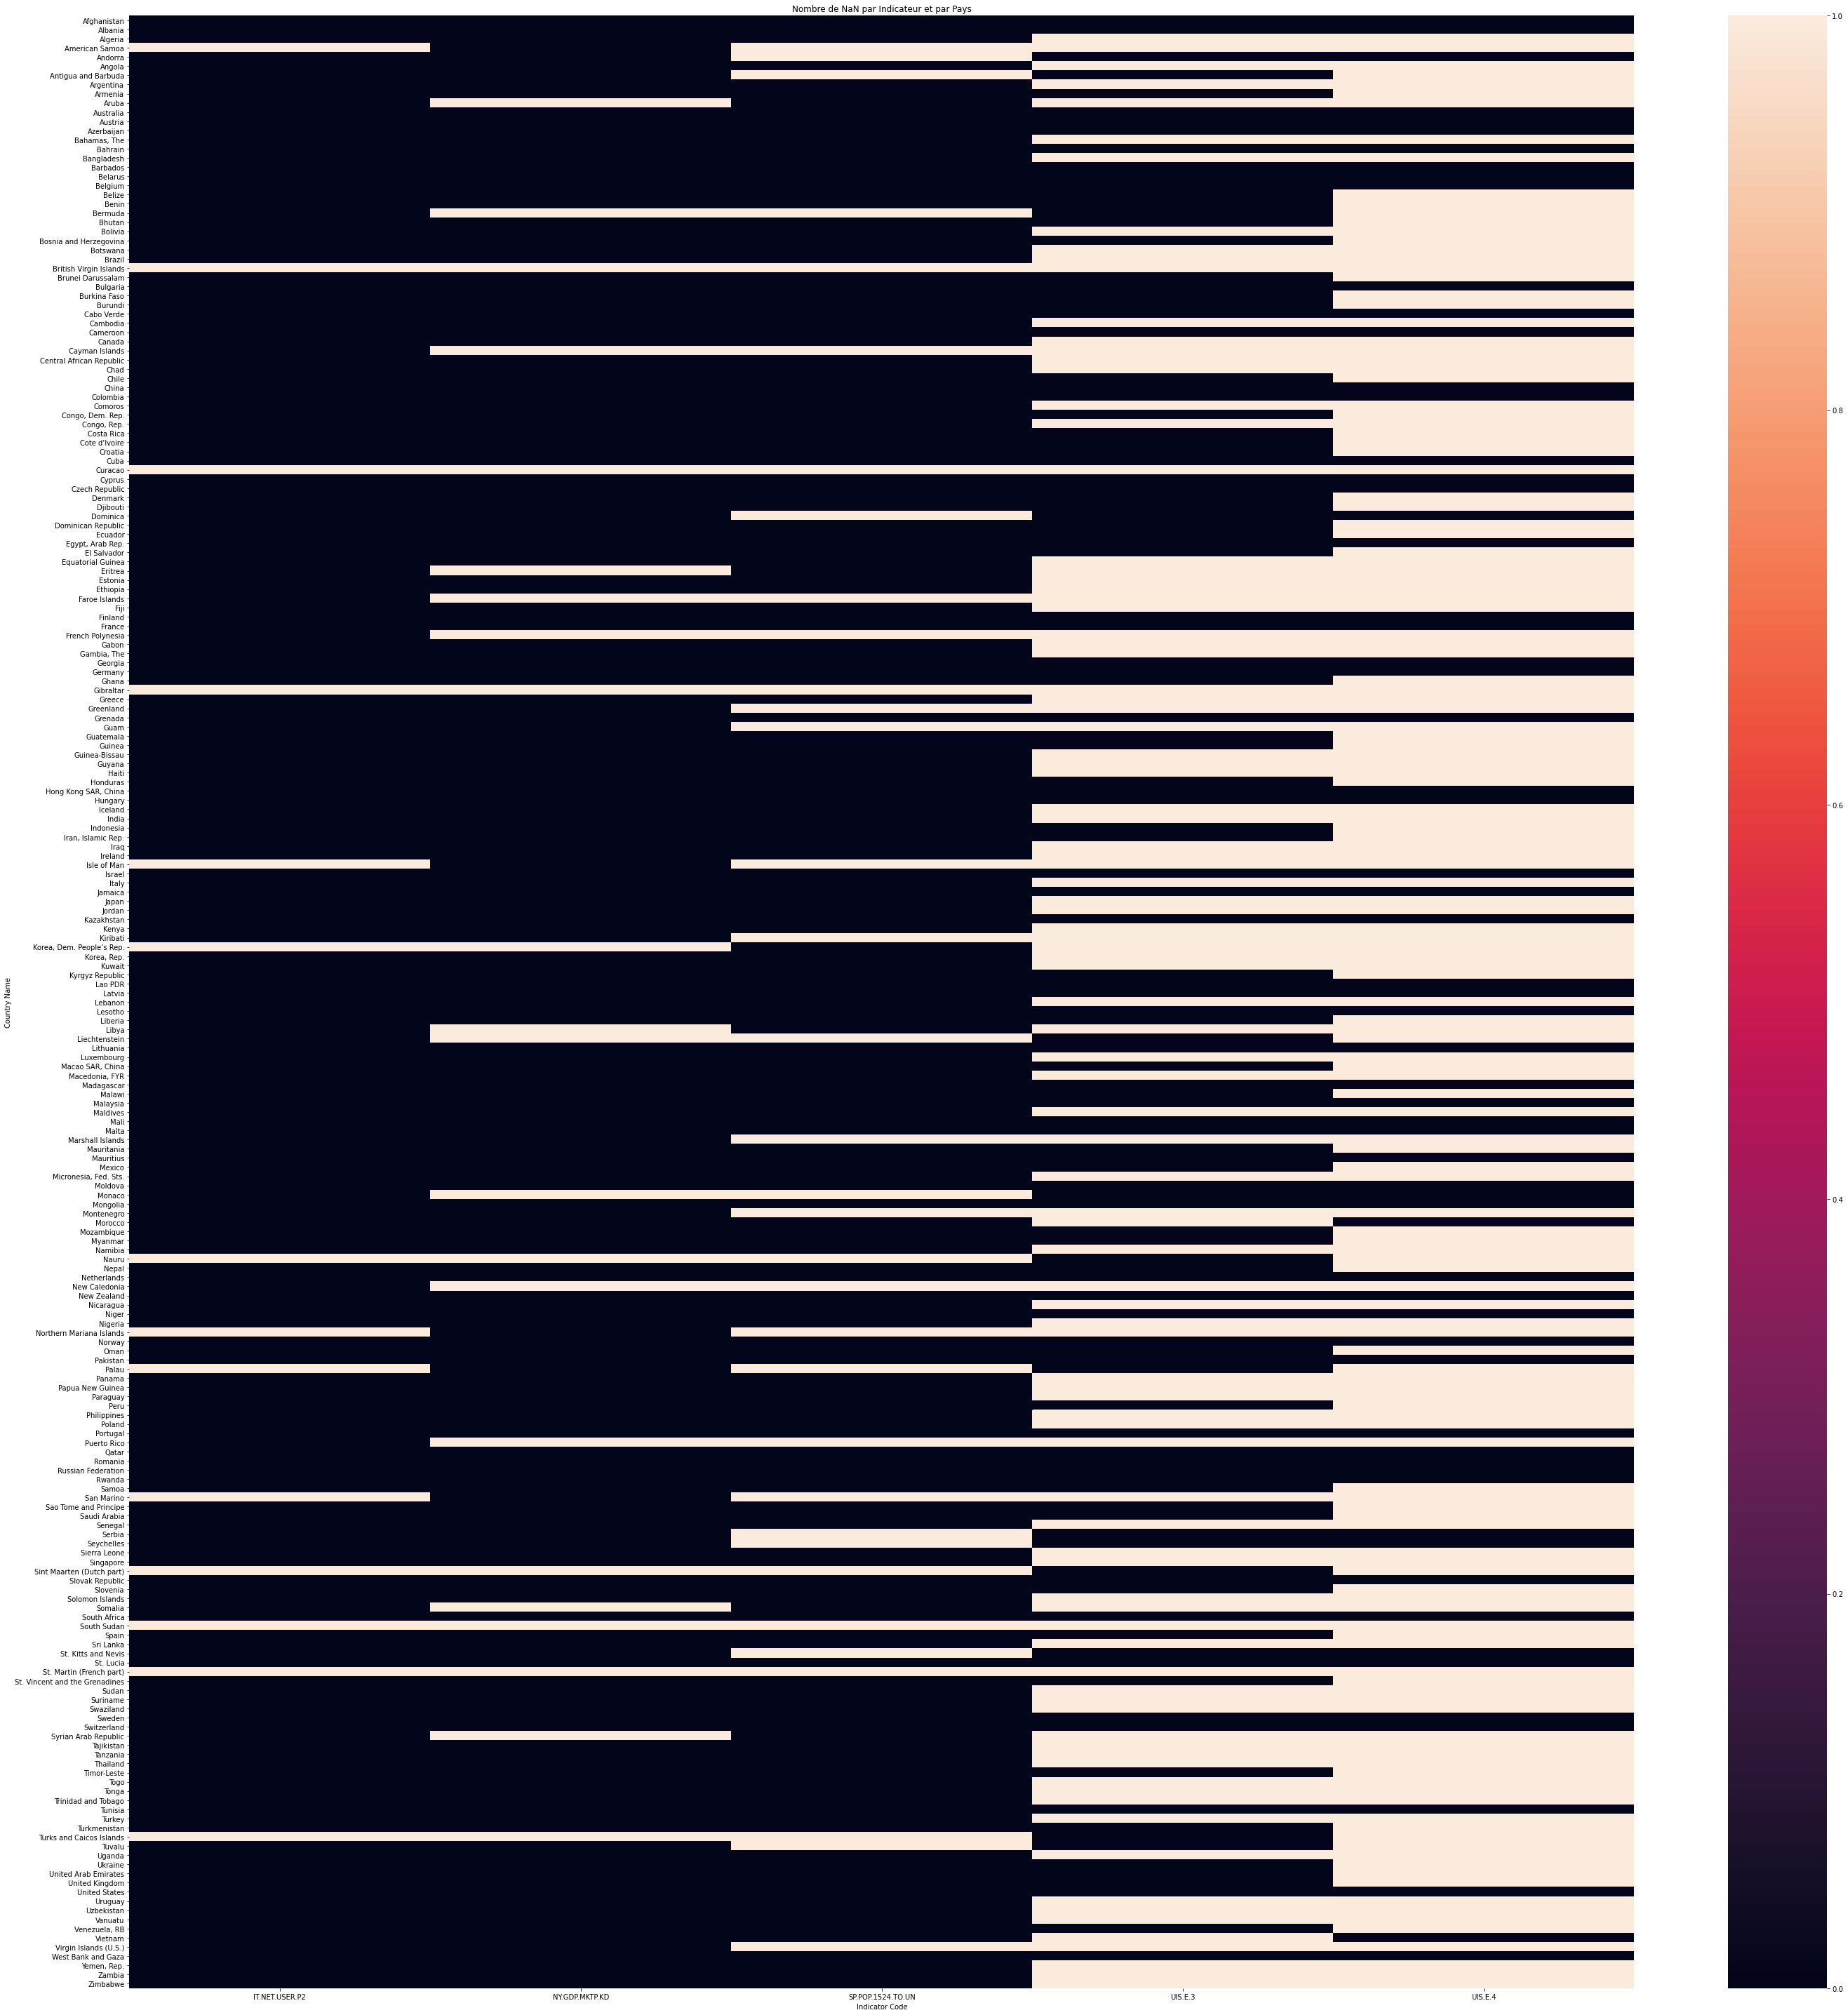

In [114]:
# Répartition des Valeurs Manquantes selon l'indicateur et le pays :

plt.figure(figsize=(40,40))
plt.title('Nombre de NaN par Indicateur et par Pays')

sns.heatmap(data = dataindicateurschoisis)
plt.tight_layout()
plt.plot()

# b. Choix des Indicateurs Pertinents :

Liste des indicateurs d'après la Banque Mondiale : http://datatopics.worldbank.org/education/indicators

Identificateurs Récurrents :

'UIS.E.4','UIS.E.3','NY.GDP.MKTP.KD','SP.POP.1524.TO.UN','IT.NET.USER.P2','IT.CMP.PCMP.P2'

- Démographie : SP.POP.1524.TO.UN
- Education : UIS.E.4 et UIS.E.3
- Economie : NY.GDP.MKTP.KD
- Internet : IT.NET.USER.P2
- Accès à l'Informatique : IT.CMP.PCMP.P2

# c. Analyse Graphique par Matplotlib et par Seaborn :

In [115]:
# Tableau de Valeurs selon la Région et les Codes Indicateurs :

datapropre2 = datapropre.drop("NaN", axis = 1)
wailers = datapropre2.groupby(['Region','Indicator Code']).mean(numeric_only =True)
wailers

2000         2001  \
Region              Indicator Code                                          
East Asia & Pacific BAR.NOED.1519.FE.ZS          8.341905    NaN            
                    BAR.NOED.1519.ZS             7.822381    NaN            
                    BAR.NOED.15UP.FE.ZS          17.687619   NaN            
                    BAR.NOED.15UP.ZS             14.104762   NaN            
                    BAR.NOED.2024.FE.ZS          8.445714    NaN            
...                                                    ...    ..            
Sub-Saharan Africa  UIS.XUNIT.USCONST.3.FSGOV    237.366684   782.544128    
                    UIS.XUNIT.USCONST.4.FSGOV    2686.345072  2501.502917   
                    UIS.XUNIT.USCONST.56.FSGOV   5384.725412  3993.960449   
                    XGDP.23.FSGOV.FDINSTADM.FFD  1.409656     1.439655      
                    XGDP.56.FSGOV.FDINSTADM.FFD  0.466186     0.803167      

                                                         2002         2003  \
Region              Indicator Code                                           
East Asia & Pacific BAR.NOED.1519.FE.ZS         NaN           NaN            
                    BAR.NOED.1519.ZS            NaN           NaN            
                    BAR.NOED.15UP.FE.ZS         NaN           NaN            
                    BAR.NOED.15UP.ZS            NaN           NaN            
                    BAR.NOED.2024.FE.ZS         NaN           NaN            
...                                              ..            ..            
Sub-Saharan Africa  UIS.XUNIT.USCONST.3.FSGOV    671.729665    1273.816162   
                    UIS.XUNIT.USCONST.4.FSGOV    16710.817676  5504.417643   
                    UIS.XUNIT.USCONST.56.FSGOV   3642.917501   5240.035416   
                    XGDP.23.FSGOV.FDINSTADM.FFD  1.307458      1.144520      
                    XGDP.56.FSGOV.FDINSTADM.FFD  0.451423      0.581226      

                                                        2004         2005  \
Region              Indicator Code                                          
East Asia & Pacific BAR.NOED.1519.FE.ZS         NaN           8.119048      
                    BAR.NOED.1519.ZS            NaN           7.843810      
                    BAR.NOED.15UP.FE.ZS         NaN           14.210000     
                    BAR.NOED.15UP.ZS            NaN           11.133810     
                    BAR.NOED.2024.FE.ZS         NaN           6.565238      
...                                              ..                 ...     
Sub-Saharan Africa  UIS.XUNIT.USCONST.3.FSGOV    395.062057   1056.098531   
                    UIS.XUNIT.USCONST.4.FSGOV   NaN           2348.466125   
                    UIS.XUNIT.USCONST.56.FSGOV   1792.146722  3330.460518   
                    XGDP.23.FSGOV.FDINSTADM.FFD  1.196579     1.516982      
                    XGDP.56.FSGOV.FDINSTADM.FFD  0.784588     0.683644      

                                                        2006         2007  \
Region              Indicator Code                                          
East Asia & Pacific BAR.NOED.1519.FE.ZS         NaN          NaN            
                    BAR.NOED.1519.ZS            NaN          NaN            
                    BAR.NOED.15UP.FE.ZS         NaN          NaN            
                    BAR.NOED.15UP.ZS            NaN          NaN            
                    BAR.NOED.2024.FE.ZS         NaN          NaN            
...                                              ..           ..            
Sub-Saharan Africa  UIS.XUNIT.USCONST.3.FSGOV    1054.330200  283.798244    
                    UIS.XUNIT.USCONST.4.FSGOV    3594.724348  947.185303    
                    UIS.XUNIT.USCONST.56.FSGOV   3359.661626  2545.160583   
                    XGDP.23.FSGOV.FDINSTADM.FFD  1.346045     1.136285      
                    XGDP.56.FSGOV.FDINSTADM.FFD  0.574640     0.602705      

                                   

In [116]:
# Tableau de Valeurs selon la Région, les Noms de Pays et les Codes Indicateurs :

marley = datapropre2.groupby(['Region','Country Name','Indicator Code']).mean(numeric_only =True)
marley

2000  2001  \
Region              Country Name   Indicator Code                            
East Asia & Pacific American Samoa BAR.NOED.1519.FE.ZS         NaN   NaN     
                                   BAR.NOED.1519.ZS            NaN   NaN     
                                   BAR.NOED.15UP.FE.ZS         NaN   NaN     
                                   BAR.NOED.15UP.ZS            NaN   NaN     
                                   BAR.NOED.2024.FE.ZS         NaN   NaN     
...                                                             ..    ..     
Sub-Saharan Africa  Zimbabwe       UIS.XUNIT.USCONST.3.FSGOV   NaN   NaN     
                                   UIS.XUNIT.USCONST.4.FSGOV   NaN   NaN     
                                   UIS.XUNIT.USCONST.56.FSGOV  NaN   NaN     
                                   XGDP.23.FSGOV.FDINSTADM.FFD NaN   NaN     
                                   XGDP.56.FSGOV.FDINSTADM.FFD NaN   NaN     

                                                                2002  2003  \
Region              Country Name   Indicator Code                            
East Asia & Pacific American Samoa BAR.NOED.1519.FE.ZS         NaN   NaN     
                                   BAR.NOED.1519.ZS            NaN   NaN     
                                   BAR.NOED.15UP.FE.ZS         NaN   NaN     
                                   BAR.NOED.15UP.ZS            NaN   NaN     
                                   BAR.NOED.2024.FE.ZS         NaN   NaN     
...                                                             ..    ..     
Sub-Saharan Africa  Zimbabwe       UIS.XUNIT.USCONST.3.FSGOV   NaN   NaN     
                                   UIS.XUNIT.USCONST.4.FSGOV   NaN   NaN     
                                   UIS.XUNIT.USCONST.56.FSGOV  NaN   NaN     
                                   XGDP.23.FSGOV.FDINSTADM.FFD NaN   NaN     
                                   XGDP.56.FSGOV.FDINSTADM.FFD NaN   NaN     

                                                                2004  2005  \
Region              Country Name   Indicator Code                            
East Asia & Pacific American Samoa BAR.NOED.1519.FE.ZS         NaN   NaN     
                                   BAR.NOED.1519.ZS            NaN   NaN     
                                   BAR.NOED.15UP.FE.ZS         NaN   NaN     
                                   BAR.NOED.15UP.ZS            NaN   NaN     
                                   BAR.NOED.2024.FE.ZS         NaN   NaN     
...                                                             ..    ..     
Sub-Saharan Africa  Zimbabwe       UIS.XUNIT.USCONST.3.FSGOV   NaN   NaN     
                                   UIS.XUNIT.USCONST.4.FSGOV   NaN   NaN     
                                   UIS.XUNIT.USCONST.56.FSGOV  NaN   NaN     
                                   XGDP.23.FSGOV.FDINSTADM.FFD NaN   NaN     
                                   XGDP.56.FSGOV.FDINSTADM.FFD NaN   NaN     

                                                                2006  2007  \
Region              Country Name   Indicator Code                            
East Asia & Pacific American Samoa BAR.NOED.1519.FE.ZS         NaN   NaN     
                                   BAR.NOED.1519.ZS            NaN   NaN     
                                   BAR.NOED.15UP.FE.ZS         NaN   NaN     
                                   BAR.NOED.15UP.ZS            NaN   NaN     
                                   BAR.NOED.2024.FE.ZS         NaN   NaN     
...                                                             ..    ..     
Sub-Saharan Africa  Zimbabwe       UIS.XUNIT.USCONST.3.FSGOV   NaN   NaN     
                                   UIS.XUNIT.USCONST.4.FSGOV   NaN   NaN     
                                   UIS.XUNIT.USCONST.56.FSGOV  NaN   NaN     
                                   XGDP.23.FSGOV.FDINSTADM.FFD NaN   NaN     
                                   XGDP.56.FSGOV.FDINSTADM.FFD NaN   NaN     

    

In [117]:
# Tableau de Valeurs selon les Codes Indicateurs :

jamaica = datapropre2.groupby(['Indicator Code']).mean(numeric_only=True)
jamaica

2000         2001         2002  \
Indicator Code                                                       
BAR.NOED.1519.FE.ZS          14.108403   NaN          NaN            
BAR.NOED.1519.ZS             12.334861   NaN          NaN            
BAR.NOED.15UP.FE.ZS          23.516181   NaN          NaN            
BAR.NOED.15UP.ZS             19.885764   NaN          NaN            
BAR.NOED.2024.FE.ZS          15.242639   NaN          NaN            
...                                ...    ..           ..            
UIS.XUNIT.USCONST.3.FSGOV    4873.015350  4894.425139  5141.276164   
UIS.XUNIT.USCONST.4.FSGOV    3739.120507  3348.683868  6382.829364   
UIS.XUNIT.USCONST.56.FSGOV   7495.949756  7247.773579  7516.004376   
XGDP.23.FSGOV.FDINSTADM.FFD  1.660486     1.733358     1.712255      
XGDP.56.FSGOV.FDINSTADM.FFD  0.789296     0.857187     0.803325      

                                    2003         2004         2005  \
Indicator Code                                                       
BAR.NOED.1519.FE.ZS         NaN          NaN           11.983056     
BAR.NOED.1519.ZS            NaN          NaN           10.641042     
BAR.NOED.15UP.FE.ZS         NaN          NaN           20.819583     
BAR.NOED.15UP.ZS            NaN          NaN           17.406667     
BAR.NOED.2024.FE.ZS         NaN          NaN           13.448681     
...                          ..           ..                 ...     
UIS.XUNIT.USCONST.3.FSGOV    6395.487065  6303.323586  7039.247720   
UIS.XUNIT.USCONST.4.FSGOV    5183.300568  5355.177368  4863.133648   
UIS.XUNIT.USCONST.56.FSGOV   8430.075667  6981.982458  7002.197342   
XGDP.23.FSGOV.FDINSTADM.FFD  1.743959     1.620237     1.670695      
XGDP.56.FSGOV.FDINSTADM.FFD  0.849346     0.839675     0.822609      

                                    2006         2007         2008  \
Indicator Code                                                       
BAR.NOED.1519.FE.ZS         NaN          NaN          NaN            
BAR.NOED.1519.ZS            NaN          NaN          NaN            
BAR.NOED.15UP.FE.ZS         NaN          NaN          NaN            
BAR.NOED.15UP.ZS            NaN          NaN          NaN            
BAR.NOED.2024.FE.ZS         NaN          NaN          NaN            
...                          ..           ..           ..            
UIS.XUNIT.USCONST.3.FSGOV    6975.942695  6679.099578  6506.411130   
UIS.XUNIT.USCONST.4.FSGOV    5468.263994  8885.862547  7974.941054   
UIS.XUNIT.USCONST.56.FSGOV   7066.526044  6952.734076  6336.244600   
XGDP.23.FSGOV.FDINSTADM.FFD  1.611670     1.559090     1.603688      
XGDP.56.FSGOV.FDINSTADM.FFD  0.804433     0.812560     0.796939      

                                    2009         2010         2011  \
Indicator Code                                                       
BAR.NOED.1519.FE.ZS         NaN           8.616181    NaN            
BAR.NOED.1519.ZS            NaN           7.811250    NaN            
BAR.NOED.15UP.FE.ZS         NaN           17.773542   NaN            
BAR.NOED.15UP.ZS            NaN           14.864514   NaN            
BAR.NOED.2024.FE.ZS         NaN           11.232986   NaN            
...                          ..                 ...    ..            
UIS.XUNIT.USCONST.3.FSGOV    5866.578176  5783.479278  5799.843476   
UIS.XUNIT.USCONST.4.FSGOV    9301.686982  5329.400683  7737.722379   
UIS.XUNIT.USCONST.56.FSGOV   6251.525437  5817.678617  6681.915048   
XGDP.23.FSGOV.FDINSTADM.FFD  1.687236     1.613385     1.543321      
XGDP.56.FSGOV.FDINSTADM.FFD  0.854303     0.831650     0.820181      

                                    2012         2013         2014     2015  \
Indicator Code                                                                
BAR.NOED.1519.FE.ZS         NaN          NaN          NaN          NaN        
BAR.NOED.1519.ZS            NaN          NaN          NaN          NaN        
BAR.NOED.15UP.FE.ZS         NaN          NaN          NaN          NaN      

# . REPRESENTATION PAR MATPLOTLIB :

In [118]:
# Rappel des Indicateurs Choisis :

indicators=['UIS.E.4','UIS.E.3','NY.GDP.MKTP.KD','SP.POP.1524.TO.UN','IT.NET.USER.P2']

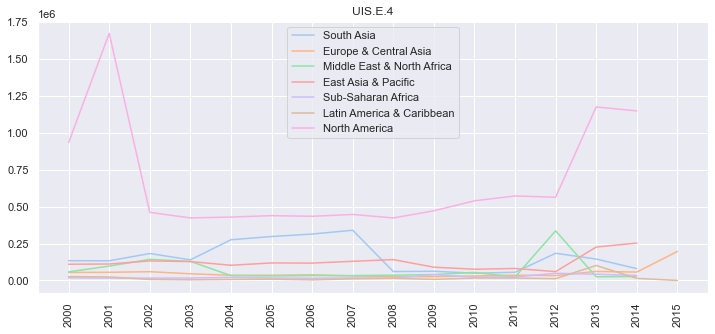

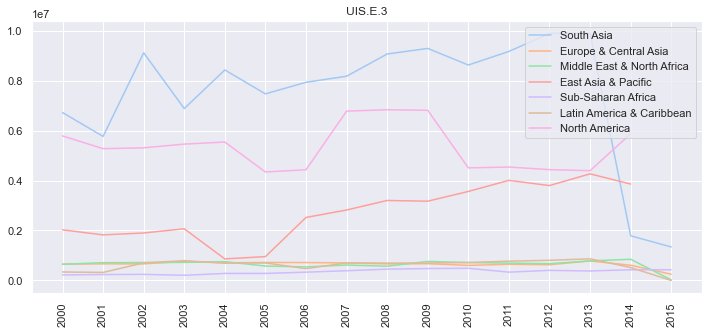

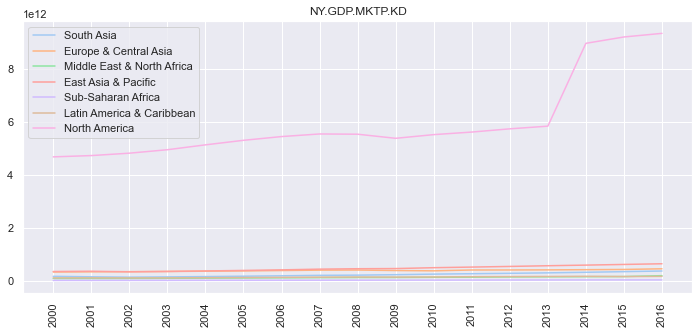

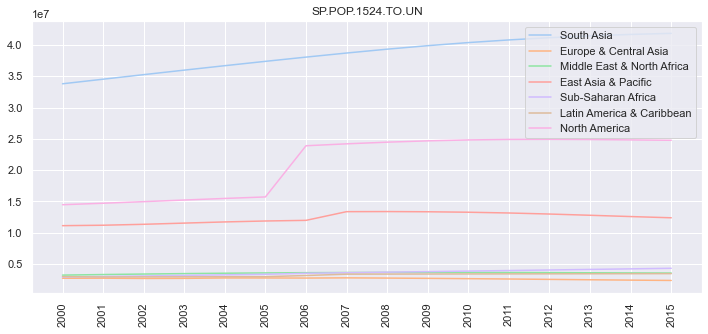

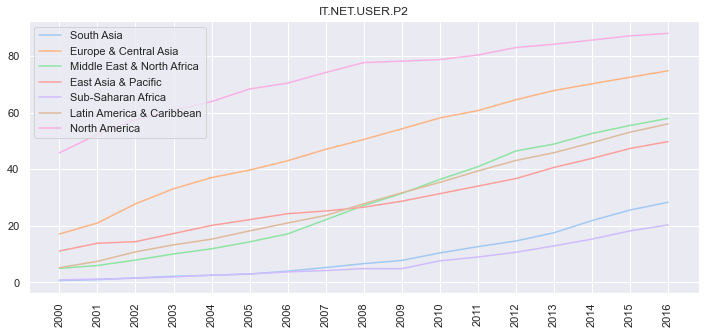

In [119]:
# Proportion des Cinq Indicateurs choisis, entre 2000 et 2016, en fonction des zones géographiques :

sns.set_theme(style="darkgrid", palette= "pastel")

indicators=['UIS.E.4','UIS.E.3','NY.GDP.MKTP.KD','SP.POP.1524.TO.UN','IT.NET.USER.P2']

for indicator in indicators:
    
    fig = plt.figure(figsize=(12, 5))
    ax = plt.axes()
    plt.title(indicator)
    degrees = 90
    plt.xticks(rotation=degrees)
    for region in datapropre2['Region'].dropna().unique():
        if len(wailers.loc[region,indicator].dropna())>0:
            ax.plot(wailers.loc[region,indicator], label=region)
            plt.legend()

Conclusion : Analyse des graphiques ci dessus par indicateurs récurrents, entre 2000 et 2016 :
  
- UIS.E.4 : L'Amérique du Nord, selon cet indicateur Education, reste prépondérante.  
- UIS.E.3 : L'Asie du Sud se détache largement sur les questions d'éducation, malgré une chute en 2013.
- NY.GDP.MKTP : L'Amérique est prépondérante, concernant cet indicateur.
- SP.POP.1524.TO.UN : L'Asie du Sud, selon cet indicateur Education, reste prépondérante. L'Amérique du Nord occupe la deuxième place.
- IT.NET.USER.P2 : L'Amérique du Nord et l'Europe se démarquent largement, selon l'Indicateur Internet.

# . REPRESENTATION PAR SEABORN  :

In [120]:
# Rappel des Indicateurs Choisis :

indicateurs=['UIS.E.4','UIS.E.3','NY.GDP.MKTP.KD','SP.POP.1524.TO.UN','IT.NET.USER.P2']

In [121]:
# Dataframe finale :

datapropre2.head(3)

Country Name Country Code      Region     sub-region  \
0  Afghanistan  AFG          South Asia  Southern Asia   
1  Afghanistan  AFG          South Asia  Southern Asia   
2  Afghanistan  AFG          South Asia  Southern Asia   

                                                            Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)              
1  Adjusted net enrolment rate, lower secondary, female (%)                  
2  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   

   Indicator Code  2000  2001  2002  2003  2004  2005  2006      2007  2008  \
0  UIS.NERA.2     NaN   NaN   NaN   NaN   NaN   NaN   NaN    28.05987 NaN     
1  UIS.NERA.2.F   NaN   NaN   NaN   NaN   NaN   NaN   NaN    15.22310 NaN     
2  UIS.NERA.2.GPI NaN   NaN   NaN   NaN   NaN   NaN   NaN    0.37913  NaN     

   2009  2010  2011  2012       2013       2014  2015  2016  
0 NaN   NaN   NaN   NaN    47.436790  50.627232 NaN   NaN    
1 NaN   NaN   NaN   NaN    34.073261  37.641541 NaN   NaN    
2 NaN   NaN   NaN   NaN    0.567060   0.598370  NaN   NaN

In [122]:
# Dataframe Country Name / Indicator Code : Ajout Région

df_etude_pays1= datapropre2[datapropre2['Indicator Code'].isin(indicateurs)].pivot_table(index=['Country Name','Region','Country Code'], columns="Indicator Code")['2014']
df_etude_pays2 = df_etude_pays1.dropna()
df_etude_pays2['Region'] = df_etude_pays2.index

<ipython-input-122-0831666fd10d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etude_pays2['Region'] = df_etude_pays2.index


In [123]:
# Multiindex de notre dataframe Pays :

df_etude_pays2.index

MultiIndex([(         'Afghanistan',                 'South Asia', 'AFG'),
            (             'Albania',      'Europe & Central Asia', 'ALB'),
            (           'Australia',        'East Asia & Pacific', 'AUS'),
            (             'Austria',      'Europe & Central Asia', 'AUT'),
            (          'Azerbaijan',      'Europe & Central Asia', 'AZE'),
            (             'Bahrain', 'Middle East & North Africa', 'BHR'),
            (            'Barbados',  'Latin America & Caribbean', 'BRB'),
            (             'Belarus',      'Europe & Central Asia', 'BLR'),
            (             'Belgium',      'Europe & Central Asia', 'BEL'),
            (            'Bulgaria',      'Europe & Central Asia', 'BGR'),
            (          'Cabo Verde',         'Sub-Saharan Africa', 'CPV'),
            (            'Cameroon',         'Sub-Saharan Africa', 'CMR'),
            (               'China',        'East Asia & Pacific', 'CHN'),
            (            

In [124]:
# Dataframe Zone Géographique / Indicator Code :

df_etude_region1= datapropre2[datapropre2['Indicator Code'].isin(indicateurs)].pivot_table(index=['Region'], columns="Indicator Code")['2014']
df_etude_region2 = df_etude_region1.dropna()
df_etude_region2

Indicator Code              IT.NET.USER.P2  NY.GDP.MKTP.KD  SP.POP.1524.TO.UN  \
Region                                                                          
East Asia & Pacific         43.804109       5.965293e+11    1.256437e+07        
Europe & Central Asia       70.186824       4.239507e+11    2.399667e+06        
Latin America & Caribbean   49.370537       1.715004e+11    3.427954e+06        
Middle East & North Africa  52.624245       1.598318e+11    3.550321e+06        
North America               85.640000       8.978533e+12    2.482369e+07        
South Asia                  21.840000       3.251381e+11    4.168687e+07        
Sub-Saharan Africa          15.295407       3.576193e+10    4.200971e+06        

Indicator Code                   UIS.E.3       UIS.E.4  
Region                                                  
East Asia & Pacific         3.857395e+06  2.530319e+05  
Europe & Central Asia       6.081523e+05  5.668905e+04  
Latin America & Caribbean   5.171482e+05  1.407012e+04  
Middle East & North Africa  8.488514e+05  2.710750e+04  
North America               5.869252e+06  1.147566e+06  
South Asia                  1.787736e+06  8.004150e+04  
Sub-Saharan Africa          4.287050e+05  3.370470e+04

In [125]:
# Multiindex de notre dataframe Region :

df_etude_region2.index

Index(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'],
      dtype='object', name='Region')

In [126]:
# Colonne de notre dataframe Region :

df_etude_region2.columns

Index(['IT.NET.USER.P2', 'NY.GDP.MKTP.KD', 'SP.POP.1524.TO.UN', 'UIS.E.3',
       'UIS.E.4'],
      dtype='object', name='Indicator Code')

# - BOXPLOT / HISTOGRAMME PAR INDICATEURS :

In [127]:
# Dataframe utile à l'élaboration des différentes boxplots par Indicateur :

box = datapropre2[["Country Name", "Country Code","Region","Indicator Code","2014"]]
box.dropna()

Country Name Country Code              Region        Indicator Code  \
0       Afghanistan  AFG          South Asia          UIS.NERA.2             
1       Afghanistan  AFG          South Asia          UIS.NERA.2.F           
2       Afghanistan  AFG          South Asia          UIS.NERA.2.GPI         
3       Afghanistan  AFG          South Asia          UIS.NERA.2.M           
8       Afghanistan  AFG          South Asia          UIS.NERA.3             
...             ...  ...                 ...                 ...             
788004  Zimbabwe     ZWE          Sub-Saharan Africa  UIS.LP.AG15T24.M       
788005  Zimbabwe     ZWE          Sub-Saharan Africa  SE.ADT.1524.LT.ZS      
788006  Zimbabwe     ZWE          Sub-Saharan Africa  SE.ADT.1524.LT.FE.ZS   
788007  Zimbabwe     ZWE          Sub-Saharan Africa  SE.ADT.1524.LT.FM.ZS   
788008  Zimbabwe     ZWE          Sub-Saharan Africa  SE.ADT.1524.LT.MA.ZS   

                 2014  
0       50.627232      
1       37.641541      
2       0.598370       
3       62.906952      
8       32.417030      
...           ...      
788004  199464.000000  
788005  90.428120      
788006  93.188350      
788007  1.063890       
788008  87.591860      

[105104 rows x 5 columns]

# - Indicateur Internet : IT.NET.USER.P2

Text(0, 0.5, 'Taux Utilisateur Internet %')

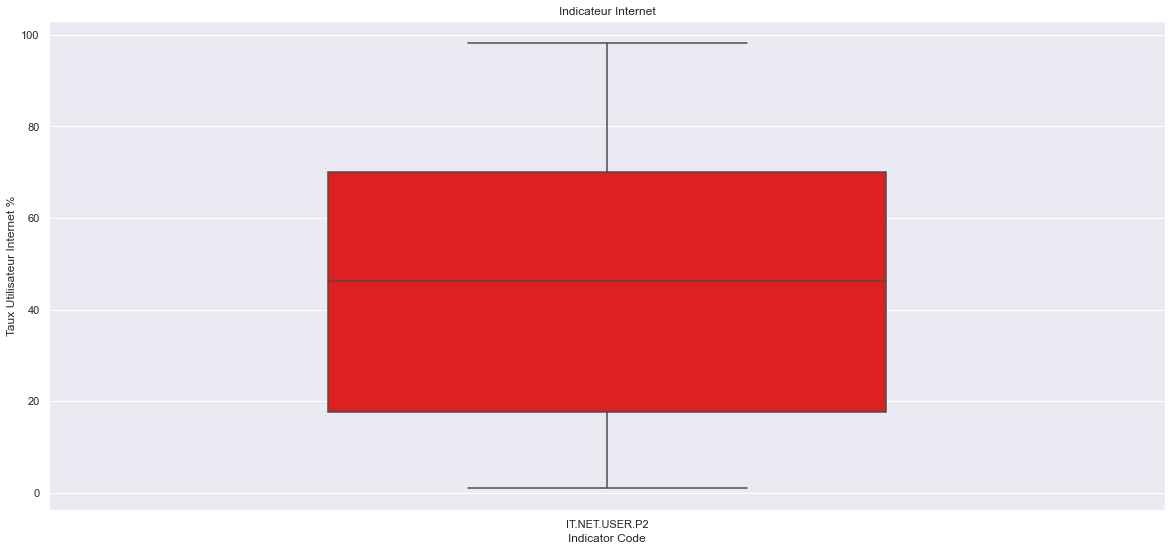

In [128]:
# Indicateur Internet : IT.NET.USER.P2 : Boîte A Moustaches :

df_internet = datapropre2[datapropre2['Indicator Code'] == 'IT.NET.USER.P2']

sns.boxplot(x=df_internet['Indicator Code'], y=df_internet['2014'], width=0.5, color='Red')
plt.title('Indicateur Internet')
plt.ylabel('Taux Utilisateur Internet %')

In [129]:
# Isolation de l'Indicateur "IT.NET.USER.P2" :

internet = box[box['Indicator Code'] == 'IT.NET.USER.P2']
internet.dropna()

Country Name Country Code  \
1375    Afghanistan                     AFG           
5041    Albania                         ALB           
8706    Algeria                         DZA           
16036   Andorra                         AND           
19701   Angola                          AGO           
23368   Antigua and Barbuda             ATG           
27033   Argentina                       ARG           
30698   Armenia                         ARM           
34363   Aruba                           ABW           
38028   Australia                       AUS           
41693   Austria                         AUT           
45358   Azerbaijan                      AZE           
49023   Bahamas, The                    BHS           
52688   Bahrain                         BHR           
56353   Bangladesh                      BGD           
60018   Barbados                        BRB           
63683   Belarus                         BLR           
67348   Belgium                         BEL           
71013   Belize                          BLZ           
74678   Benin                           BEN           
78343   Bermuda                         BMU           
82008   Bhutan                          BTN           
85673   Bolivia                         BOL           
89339   Bosnia and Herzegovina          BIH           
93004   Botswana                        BWA           
96670   Brazil                          BRA           
100336  Brunei Darussalam               BRN           
104001  Bulgaria                        BGR           
107666  Burkina Faso                    BFA           
111331  Burundi                         BDI           
114996  Cabo Verde                      CPV           
118661  Cambodia                        KHM           
122326  Cameroon                        CMR           
125991  Canada                          CAN           
129656  Cayman Islands                  CYM           
133321  Central African Republic        CAF           
136986  Chad                            TCD           
140651  Chile                           CHL           
144316  China                           CHN           
147983  Colombia                        COL           
151648  Comoros                         COM           
155313  Congo, Rep.                     COG           
158978  Congo, Dem. Rep.                COD           
162644  Costa Rica                      CRI           
166309  Cote d'Ivoire                   CIV           
169974  Croatia                         HRV           
173639  Cuba                            CUB           
180969  Cyprus                          CYP           
184634  Czech Republic                  CZE           
188299  Denmark                         DNK           
191964  Djibouti                        DJI           
195629  Dominica                        DMA           
199294  Dominican Republic              DOM           
202959  Ecuador                         ECU           
206624  Egypt, Arab Rep.                EGY           
210289  El Salvador                     SLV           
213954  Equatorial Guinea               GNQ           
217619  Eritrea                         ERI           
221284  Estonia                         EST           
224949  Swaziland                       SWZ           
228614  Ethiopia                        ETH           
232280  Faroe Islands                   FRO           
235945  Fiji                            FJI           
239610  Finland                         FIN           
243275  France                          FRA           
246941  French Polynesia                PYF           
250607  Gabon                           GAB           
254272  Gambia, The                     GMB           
257937  Georgia                         GEO           
261602  Germany                         DEU           
265267  Ghana                           GHA           
272597  Greece                          GRC           
276262  Gre

<ipython-input-130-b63bb9a9df9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet["IT.NET.USER.P2"] = internet.index


Text(0, 0.5, 'IT.NET.USER.P2')

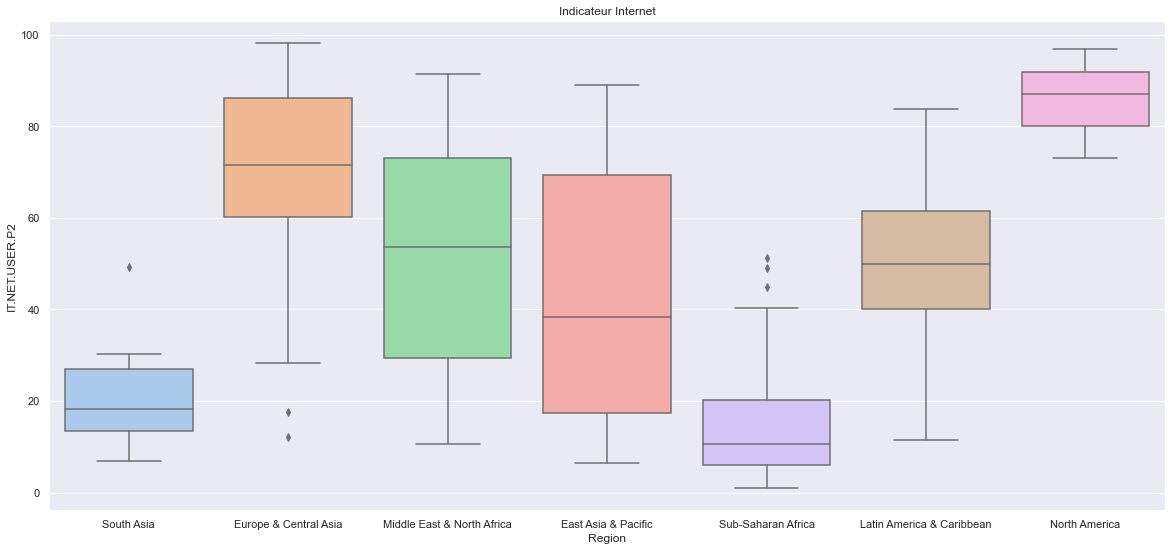

In [130]:
# Indicateur Internet : IT.NET.USER.P2 : Boxplot :

internet["IT.NET.USER.P2"] = internet.index
sns.boxplot(x="Region",y="2014",data=internet)
plt.title('Indicateur Internet')
plt.ylabel('IT.NET.USER.P2')

Text(0.5, 0, 'IT.NET.USER.P2')

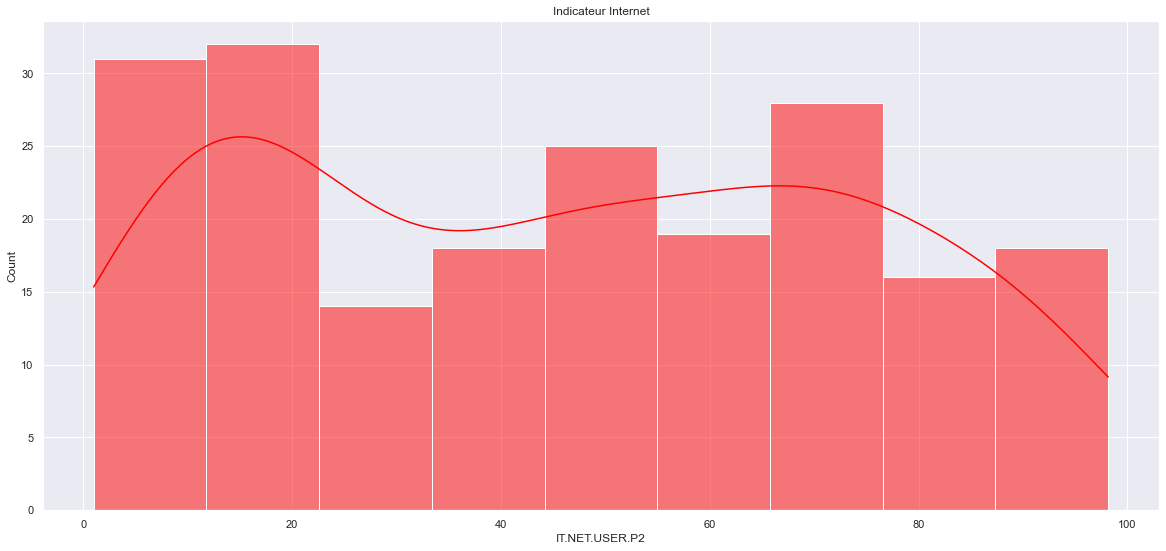

In [131]:
# Indicateur Internet : IT.NET.USER.P2 : Histogramme :

df_internet = datapropre2[datapropre2['Indicator Code'] == 'IT.NET.USER.P2']

sns.histplot(df_internet['2014'], kde = True, color='Red')
plt.title('Indicateur Internet')
plt.xlabel('IT.NET.USER.P2')

# - Indicateur Economique : NY.GDP.MKTP.KD

(0.0, 1000000000000.0)

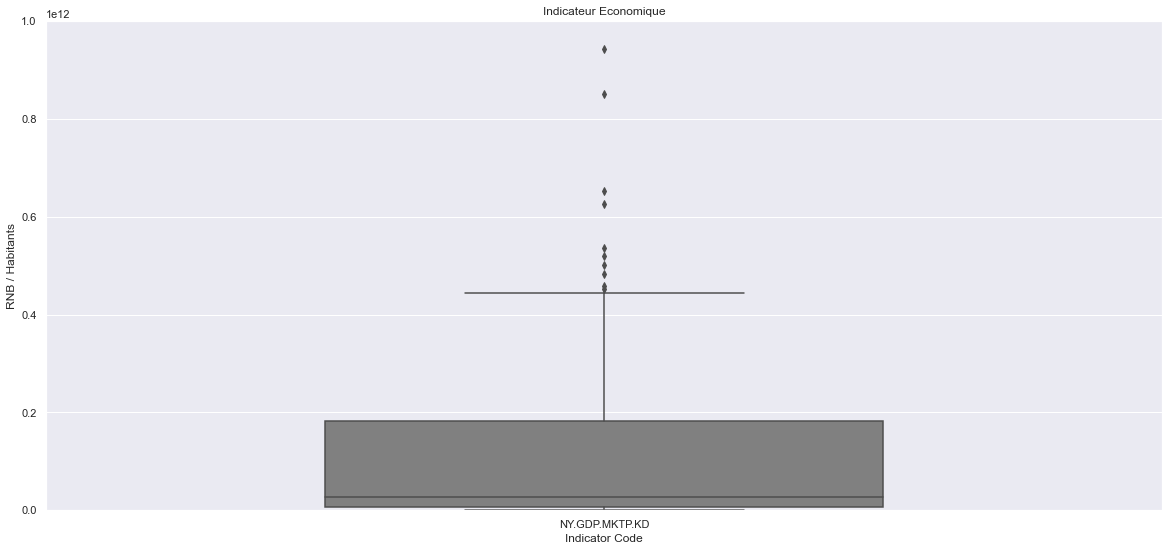

In [132]:
# Indicateur Economique : NY.GDP.MKTP.KD : Boîte A Moustaches :

df_eco = datapropre2[datapropre2['Indicator Code'] == 'NY.GDP.MKTP.KD']

sns.boxplot(x=df_eco['Indicator Code'], y=df_eco['2014'], width=0.5, color='Grey')
plt.title('Indicateur Economique')
plt.ylabel('RNB / Habitants')
plt.ylim(0, 1000000000000)

In [133]:
# Isolation de l'Indicateur "NY.GDP.MKTP.KD" :

eco = box[box['Indicator Code'] == 'NY.GDP.MKTP.KD']
eco.dropna()

Country Name Country Code  \
1242    Afghanistan                     AFG           
4908    Albania                         ALB           
8573    Algeria                         DZA           
12238   American Samoa                  ASM           
15903   Andorra                         AND           
19568   Angola                          AGO           
23235   Antigua and Barbuda             ATG           
26900   Argentina                       ARG           
30565   Armenia                         ARM           
37895   Australia                       AUS           
41560   Austria                         AUT           
45225   Azerbaijan                      AZE           
48890   Bahamas, The                    BHS           
52555   Bahrain                         BHR           
56220   Bangladesh                      BGD           
59885   Barbados                        BRB           
63550   Belarus                         BLR           
67215   Belgium                         BEL           
70880   Belize                          BLZ           
74545   Benin                           BEN           
81875   Bhutan                          BTN           
85540   Bolivia                         BOL           
89206   Bosnia and Herzegovina          BIH           
92871   Botswana                        BWA           
96537   Brazil                          BRA           
100203  Brunei Darussalam               BRN           
103868  Bulgaria                        BGR           
107533  Burkina Faso                    BFA           
111198  Burundi                         BDI           
114863  Cabo Verde                      CPV           
118528  Cambodia                        KHM           
122193  Cameroon                        CMR           
125858  Canada                          CAN           
133188  Central African Republic        CAF           
136853  Chad                            TCD           
140518  Chile                           CHL           
144183  China                           CHN           
147850  Colombia                        COL           
151515  Comoros                         COM           
155180  Congo, Rep.                     COG           
158845  Congo, Dem. Rep.                COD           
162511  Costa Rica                      CRI           
166176  Cote d'Ivoire                   CIV           
169841  Croatia                         HRV           
173506  Cuba                            CUB           
180836  Cyprus                          CYP           
184501  Czech Republic                  CZE           
188166  Denmark                         DNK           
191831  Djibouti                        DJI           
195496  Dominica                        DMA           
199161  Dominican Republic              DOM           
202826  Ecuador                         ECU           
206491  Egypt, Arab Rep.                EGY           
210156  El Salvador                     SLV           
213821  Equatorial Guinea               GNQ           
221151  Estonia                         EST           
224816  Swaziland                       SWZ           
228481  Ethiopia                        ETH           
235812  Fiji                            FJI           
239477  Finland                         FIN           
243142  France                          FRA           
250474  Gabon                           GAB           
254139  Gambia, The                     GMB           
257804  Georgia                         GEO           
261469  Germany                         DEU           
265134  Ghana                           GHA           
272464  Greece                          GRC           
276129  Greenland                       GRL           
279794  Grenada                         GRD           
283460  Guam                            GUM           
287125  Guatemala                       GTM           
290791  Guinea                          GIN           
294456  Gui

<ipython-input-134-7fc308426d25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco["NY.GDP.MKTP.KD"] = eco.index


Text(0, 0.5, 'NY.GDP.MKTP.KD')

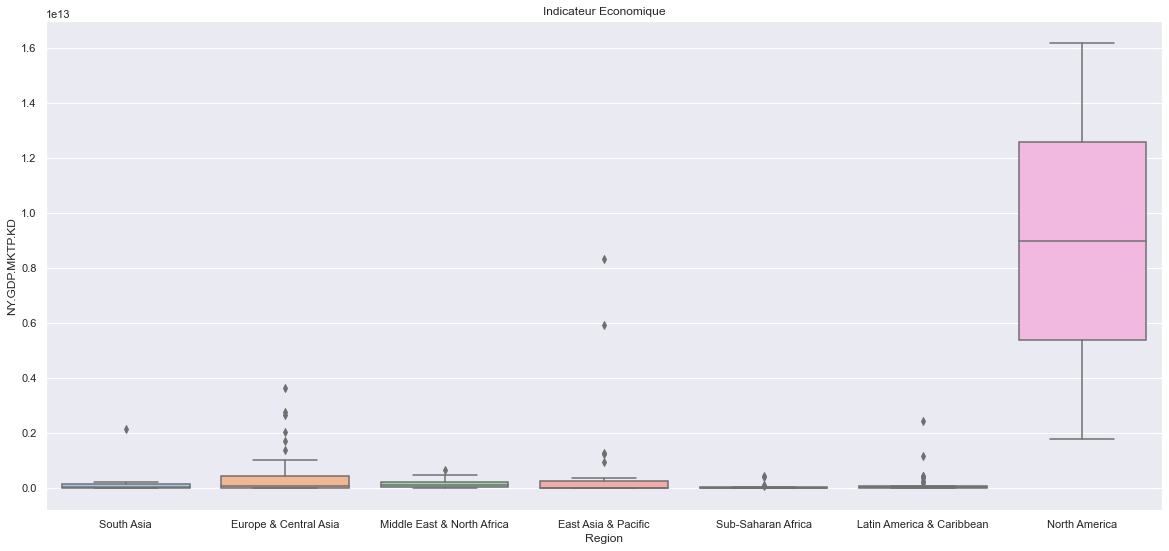

In [134]:
# Indicateur Economie : NY.GDP.MKTP.KD : Boxplot :

eco["NY.GDP.MKTP.KD"] = eco.index
sns.boxplot(x="Region",y="2014",data=eco)
plt.title('Indicateur Economique')
plt.ylabel('NY.GDP.MKTP.KD')

Text(0.5, 0, 'NY.GDP.MKTP.KD')

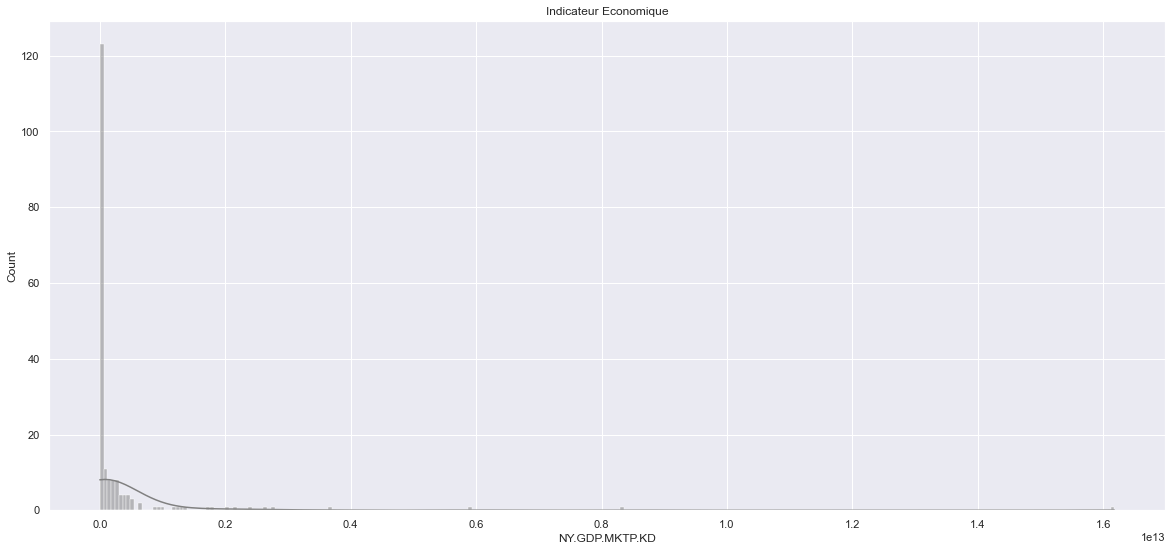

In [135]:
# Indicateur Economique : NY.GDP.MKTP.KD : Histogramme :

df_eco = datapropre2[datapropre2['Indicator Code'] == 'NY.GDP.MKTP.KD']

sns.histplot(df_eco['2014'], kde = True, color='Grey')
plt.title('Indicateur Economique')
plt.xlabel('NY.GDP.MKTP.KD')

# - Indicateur Démographie : SP.POP.1524.TO.UN

(0.0, 10000000.0)

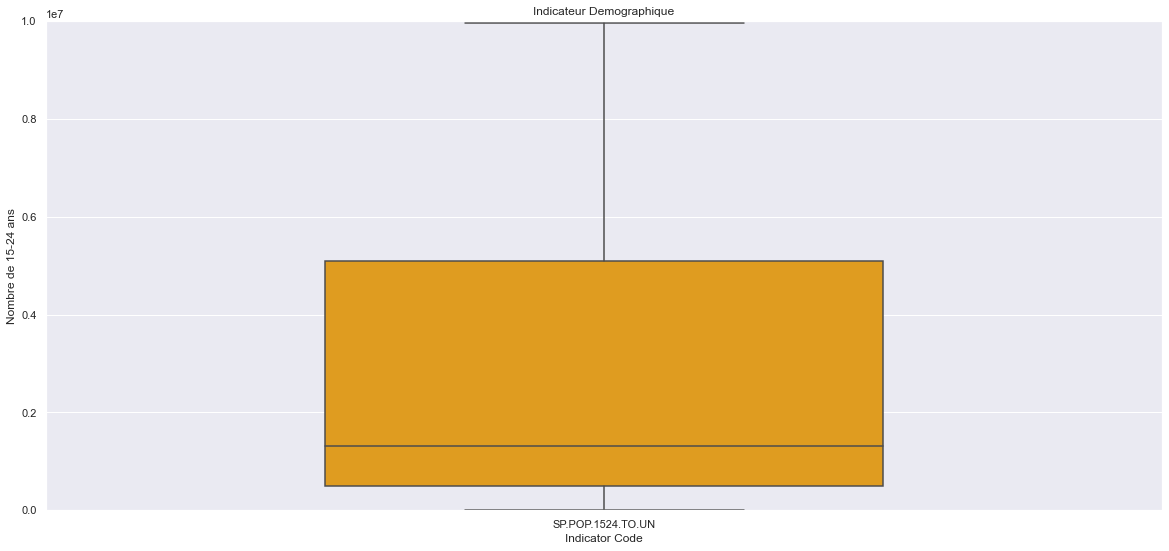

In [136]:
# Indicateur Démographie : SP.POP.1524.TO.UN : Boîte A Moustaches :

df_demo = datapropre2[datapropre2['Indicator Code'] == 'SP.POP.1524.TO.UN']

sns.boxplot(x=df_demo['Indicator Code'], y=df_demo['2014'], width=0.5, color='Orange')
plt.title('Indicateur Demographique')
plt.ylabel('Nombre de 15-24 ans')
plt.ylim(0, 10000000)

In [137]:
# Isolation de l'Indicateur "SP.POP.1524.TO.UN " :

pop = box[box['Indicator Code'] == 'SP.POP.1524.TO.UN']
pop.dropna()

Country Name Country Code  \
2482    Afghanistan                     AFG           
6148    Albania                         ALB           
9813    Algeria                         DZA           
20808   Angola                          AGO           
28140   Argentina                       ARG           
31805   Armenia                         ARM           
35470   Aruba                           ABW           
39135   Australia                       AUS           
42800   Austria                         AUT           
46465   Azerbaijan                      AZE           
50130   Bahamas, The                    BHS           
53795   Bahrain                         BHR           
57460   Bangladesh                      BGD           
61125   Barbados                        BRB           
64790   Belarus                         BLR           
68455   Belgium                         BEL           
72120   Belize                          BLZ           
75785   Benin                           BEN           
83115   Bhutan                          BTN           
86780   Bolivia                         BOL           
90446   Bosnia and Herzegovina          BIH           
94111   Botswana                        BWA           
97777   Brazil                          BRA           
101443  Brunei Darussalam               BRN           
105108  Bulgaria                        BGR           
108773  Burkina Faso                    BFA           
112438  Burundi                         BDI           
116103  Cabo Verde                      CPV           
119768  Cambodia                        KHM           
123433  Cameroon                        CMR           
127098  Canada                          CAN           
134428  Central African Republic        CAF           
138093  Chad                            TCD           
141758  Chile                           CHL           
145423  China                           CHN           
149090  Colombia                        COL           
152755  Comoros                         COM           
156420  Congo, Rep.                     COG           
160085  Congo, Dem. Rep.                COD           
163751  Costa Rica                      CRI           
167416  Cote d'Ivoire                   CIV           
171081  Croatia                         HRV           
174746  Cuba                            CUB           
182076  Cyprus                          CYP           
185741  Czech Republic                  CZE           
189406  Denmark                         DNK           
193071  Djibouti                        DJI           
200401  Dominican Republic              DOM           
204066  Ecuador                         ECU           
207731  Egypt, Arab Rep.                EGY           
211396  El Salvador                     SLV           
215061  Equatorial Guinea               GNQ           
218726  Eritrea                         ERI           
222391  Estonia                         EST           
226056  Swaziland                       SWZ           
229721  Ethiopia                        ETH           
237052  Fiji                            FJI           
240717  Finland                         FIN           
244382  France                          FRA           
251714  Gabon                           GAB           
255379  Gambia, The                     GMB           
259044  Georgia                         GEO           
262709  Germany                         DEU           
266374  Ghana                           GHA           
273704  Greece                          GRC           
281034  Grenada                         GRD           
288365  Guatemala                       GTM           
292031  Guinea                          GIN           
295696  Guinea-Bissau                   GNB           
299361  Guyana                          GUY           
303026  Haiti                           HTI           
306693  Honduras                        HND           
310358  Hon

<ipython-input-138-aefe43688dfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop["SP.POP.1524.TO.UN"] = pop.index


Text(0, 0.5, 'SP.POP.1524.TO.UN')

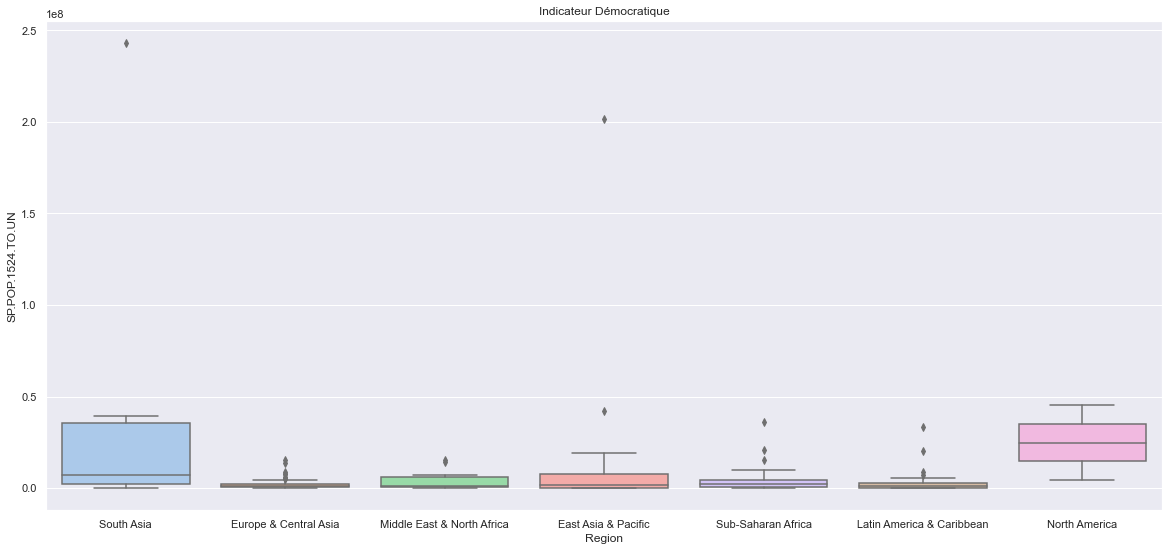

In [138]:
# Indicateur Population : SP.POP.1524.TO.UN : Boxplot :

pop["SP.POP.1524.TO.UN"] = pop.index
sns.boxplot(x="Region",y="2014",data=pop)
plt.title('Indicateur Démocratique')
plt.ylabel('SP.POP.1524.TO.UN')

Text(0.5, 0, 'SP.POP.1524.TO.UN ')

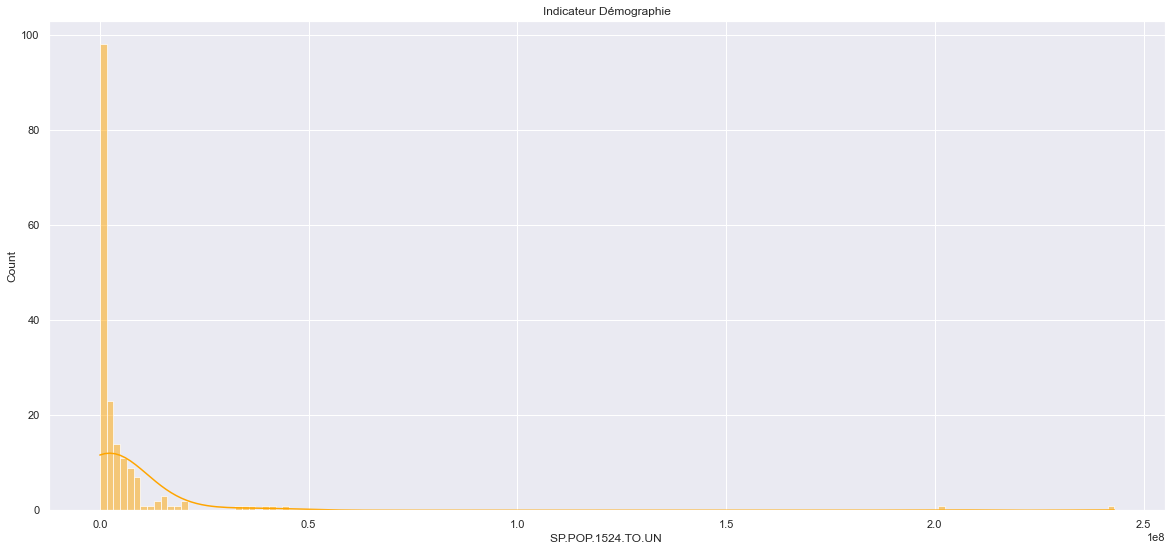

In [139]:
# Indicateur Démographie : SP.POP.1524.TO.UN : Histogramme :

df_demo = datapropre2[datapropre2['Indicator Code'] == 'SP.POP.1524.TO.UN']

sns.histplot(df_demo['2014'], kde = True, color='Orange')
plt.title('Indicateur Démographie')
plt.xlabel('SP.POP.1524.TO.UN ')

# - Indicateur Education Secondaire : UIS.E.4

(0.0, 100000.0)

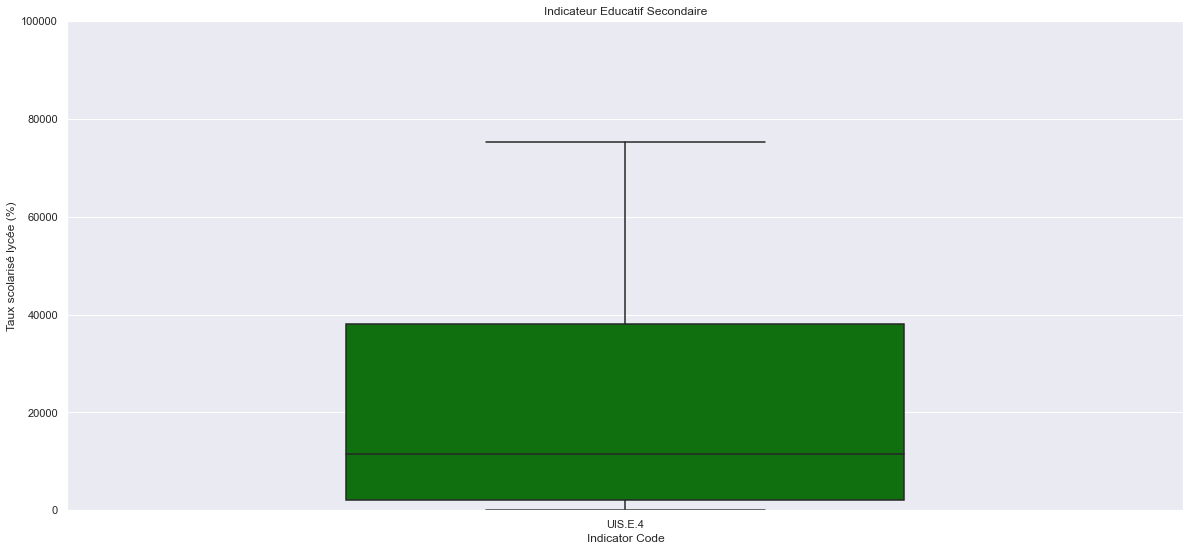

In [140]:
# Indicateur Education Secondary : UIS.E.4 : Boîte A Moustaches :

df_sec = datapropre2[datapropre2['Indicator Code'] == 'UIS.E.4']

sns.boxplot(x=df_sec['Indicator Code'], y=df_sec['2014'], width=0.5, color='Green')
plt.title('Indicateur Educatif Secondaire')
plt.ylabel('Taux scolarisé lycée (%)')
plt.ylim(0, 100000)

In [141]:
# Isolation de l'Indicateur "UIS.E.4" :

edu2 = box[box['Indicator Code'] == 'UIS.E.4']
edu2.dropna()

Country Name Country Code                      Region  \
1171    Afghanistan           AFG          South Asia                   
4837    Albania               ALB          Europe & Central Asia        
15832   Andorra               AND          Europe & Central Asia        
37824   Australia             AUS          East Asia & Pacific          
41489   Austria               AUT          Europe & Central Asia        
45154   Azerbaijan            AZE          Europe & Central Asia        
52484   Bahrain               BHR          Middle East & North Africa   
59814   Barbados              BRB          Latin America & Caribbean    
63479   Belarus               BLR          Europe & Central Asia        
67144   Belgium               BEL          Europe & Central Asia        
103797  Bulgaria              BGR          Europe & Central Asia        
114792  Cabo Verde            CPV          Sub-Saharan Africa           
122122  Cameroon              CMR          Sub-Saharan Africa           
144112  China                 CHN          East Asia & Pacific          
147779  Colombia              COL          Latin America & Caribbean    
173435  Cuba                  CUB          Latin America & Caribbean    
180765  Cyprus                CYP          Europe & Central Asia        
184430  Czech Republic        CZE          Europe & Central Asia        
195425  Dominica              DMA          Latin America & Caribbean    
206420  Egypt, Arab Rep.      EGY          Middle East & North Africa   
239406  Finland               FIN          Europe & Central Asia        
243071  France                FRA          Europe & Central Asia        
257733  Georgia               GEO          Europe & Central Asia        
261398  Germany               DEU          Europe & Central Asia        
279723  Grenada               GRD          Latin America & Caribbean    
309047  Hong Kong SAR, China  HKG          East Asia & Pacific          
312712  Hungary               HUN          Europe & Central Asia        
342032  Israel                ISR          Middle East & North Africa   
349362  Jamaica               JAM          Latin America & Caribbean    
360358  Kazakhstan            KAZ          Europe & Central Asia        
386013  Lao PDR               LAO          East Asia & Pacific          
389678  Latvia                LVA          Europe & Central Asia        
397008  Lesotho               LSO          Sub-Saharan Africa           
411668  Lithuania             LTU          Europe & Central Asia        
422663  Madagascar            MDG          Sub-Saharan Africa           
429993  Malaysia              MYS          East Asia & Pacific          
437323  Mali                  MLI          Sub-Saharan Africa           
440988  Malta                 MLT          Middle East & North Africa   
451984  Mauritius             MUS          Sub-Saharan Africa           
462980  Moldova               MDA          Europe & Central Asia        
466645  Monaco                MCO          Europe & Central Asia        
470310  Mongolia              MNG          East Asia & Pacific          
477641  Morocco               MAR          Middle East & North Africa   
499631  Netherlands           NLD          Europe & Central Asia        
506961  New Zealand           NZL          East Asia & Pacific          
514291  Niger                 NER          Sub-Saharan Africa           
528953  Norway                NOR          Europe & Central Asia        
536283  Pakistan              PAK          South Asia                   
543613  West Bank and Gaza    PSE          Middle East & North Africa   
569269  Portugal              PRT          Europe & Central Asia        
576599  Qatar                 QAT          Middle East & North Africa   
580265  Romania               ROU          Europe & Central Asia        
583930  Russian Federation    RUS          Europe & Central Asia        
587595  Rwanda                RWA          Sub-Saharan Africa           
5

<ipython-input-142-62799eed85ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu2["UIS.E.4"] = edu2.index


Text(0, 0.5, 'UIS.E.4')

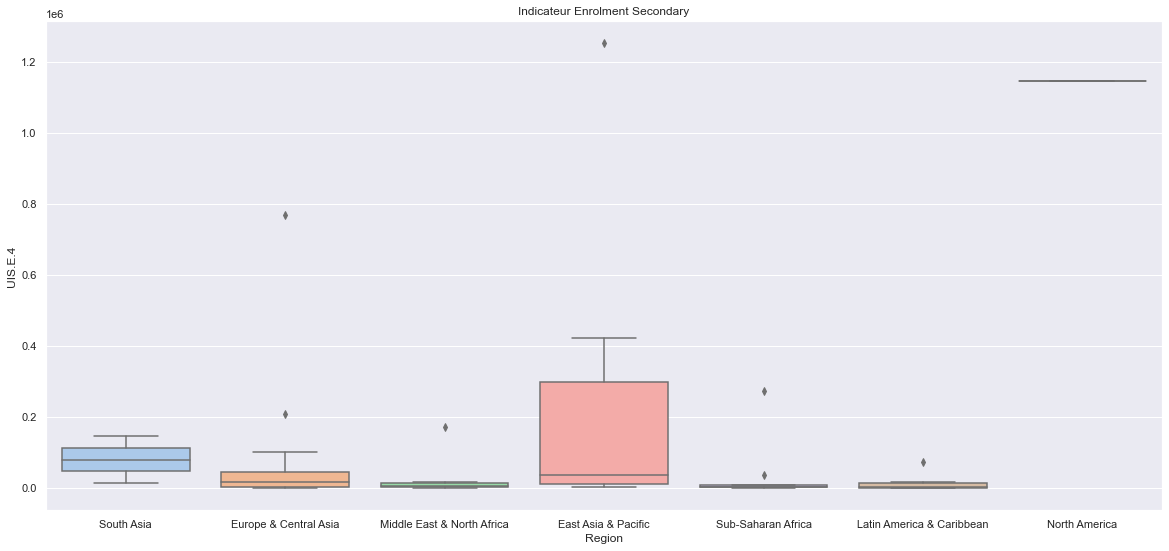

In [142]:
# Indicateur Enrolment Secondary : UIS.E.4 : Boxplot :

edu2["UIS.E.4"] = edu2.index
sns.boxplot(x="Region",y="2014",data=edu2)
plt.title('Indicateur Enrolment Secondary')
plt.ylabel('UIS.E.4')

Text(0.5, 0, 'UIS.E.4')

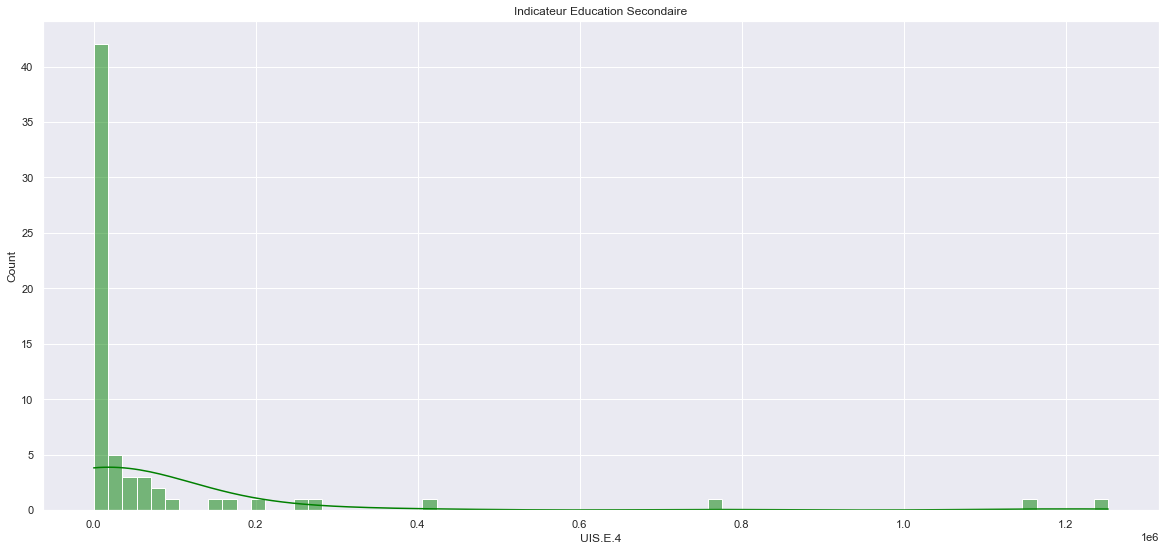

In [143]:
# Indicateur Education Secondary : UIS.E.4 : Histogramme :

df_sec = datapropre2[datapropre2['Indicator Code'] == 'UIS.E.4']

sns.histplot(df_sec['2014'], kde = True, color='Green')
plt.title('Indicateur Education Secondaire')
plt.xlabel('UIS.E.4')

# - Indicateur Education Supérieur : UIS.E.3 

(0.0, 1000000.0)

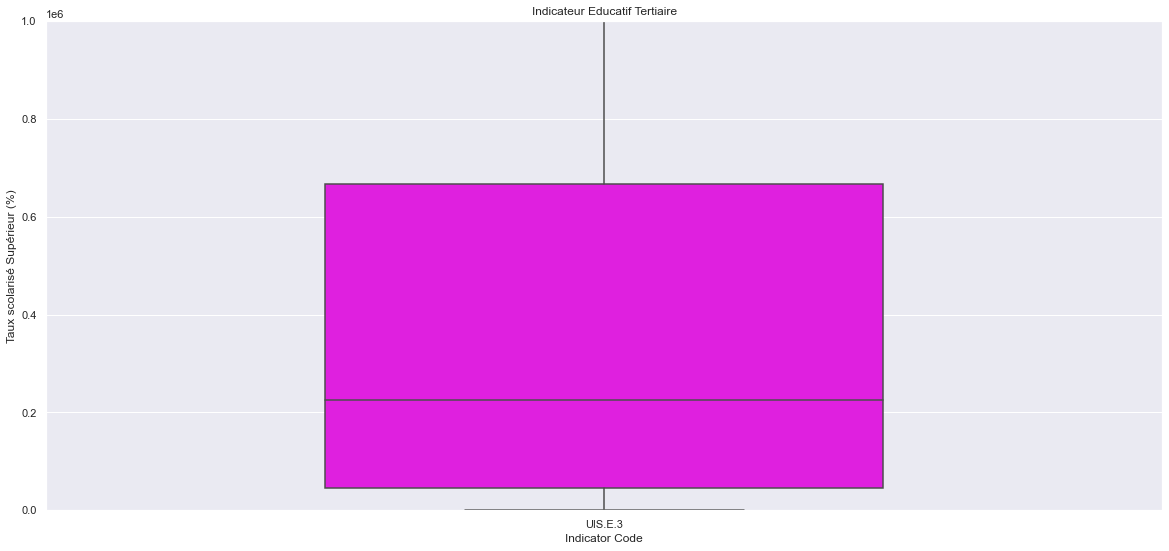

In [144]:
# Indicateur Education Tertiary : UIS.E.3 : Boîte A Moustaches :

df_sec = datapropre2[datapropre2['Indicator Code'] == 'UIS.E.3']

sns.boxplot(x=df_sec['Indicator Code'], y=df_sec['2014'], width=0.5, color='magenta')
plt.title('Indicateur Educatif Tertiaire')
plt.ylabel('Taux scolarisé Supérieur (%)')
plt.ylim(0, 1000000)

In [145]:
# Isolation de l'Indicateur "UIS.E.3" :

edu3 = box[box['Indicator Code'] == 'UIS.E.3']
edu3.dropna()

Country Name Country Code  \
1214    Afghanistan                     AFG           
4880    Albania                         ALB           
15875   Andorra                         AND           
23207   Antigua and Barbuda             ATG           
30537   Armenia                         ARM           
37867   Australia                       AUS           
41532   Austria                         AUT           
45197   Azerbaijan                      AZE           
52527   Bahrain                         BHR           
59857   Barbados                        BRB           
63522   Belarus                         BLR           
67187   Belgium                         BEL           
70852   Belize                          BLZ           
74517   Benin                           BEN           
78182   Bermuda                         BMU           
81847   Bhutan                          BTN           
89178   Bosnia and Herzegovina          BIH           
100175  Brunei Darussalam               BRN           
103840  Bulgaria                        BGR           
107505  Burkina Faso                    BFA           
111170  Burundi                         BDI           
114835  Cabo Verde                      CPV           
122165  Cameroon                        CMR           
140490  Chile                           CHL           
144155  China                           CHN           
147822  Colombia                        COL           
158817  Congo, Dem. Rep.                COD           
162483  Costa Rica                      CRI           
166148  Cote d'Ivoire                   CIV           
169813  Croatia                         HRV           
173478  Cuba                            CUB           
180808  Cyprus                          CYP           
184473  Czech Republic                  CZE           
188138  Denmark                         DNK           
191803  Djibouti                        DJI           
195468  Dominica                        DMA           
199133  Dominican Republic              DOM           
202798  Ecuador                         ECU           
206463  Egypt, Arab Rep.                EGY           
210128  El Salvador                     SLV           
239449  Finland                         FIN           
243114  France                          FRA           
257776  Georgia                         GEO           
261441  Germany                         DEU           
265106  Ghana                           GHA           
279766  Grenada                         GRD           
287097  Guatemala                       GTM           
290763  Guinea                          GIN           
305425  Honduras                        HND           
309090  Hong Kong SAR, China            HKG           
312755  Hungary                         HUN           
323750  Indonesia                       IDN           
327415  Iran, Islamic Rep.              IRN           
342075  Israel                          ISR           
349405  Jamaica                         JAM           
360401  Kazakhstan                      KAZ           
382391  Kyrgyz Republic                 KGZ           
386056  Lao PDR                         LAO           
389721  Latvia                          LVA           
397051  Lesotho                         LSO           
400716  Liberia                         LBR           
408046  Liechtenstein                   LIE           
411711  Lithuania                       LTU           
419041  Macao SAR, China                MAC           
422706  Madagascar                      MDG           
426371  Malawi                          MWI           
430036  Malaysia                        MYS           
437366  Mali                            MLI           
441031  Malta                           MLT           
448362  Mauritania                      MRT           
452027  Mauritius                       MUS           
455693  Mexico                          MEX           
463023  Mol

<ipython-input-146-33cc851339c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu3["UIS.E.3"] = edu3.index


Text(0, 0.5, 'UIS.E.3')

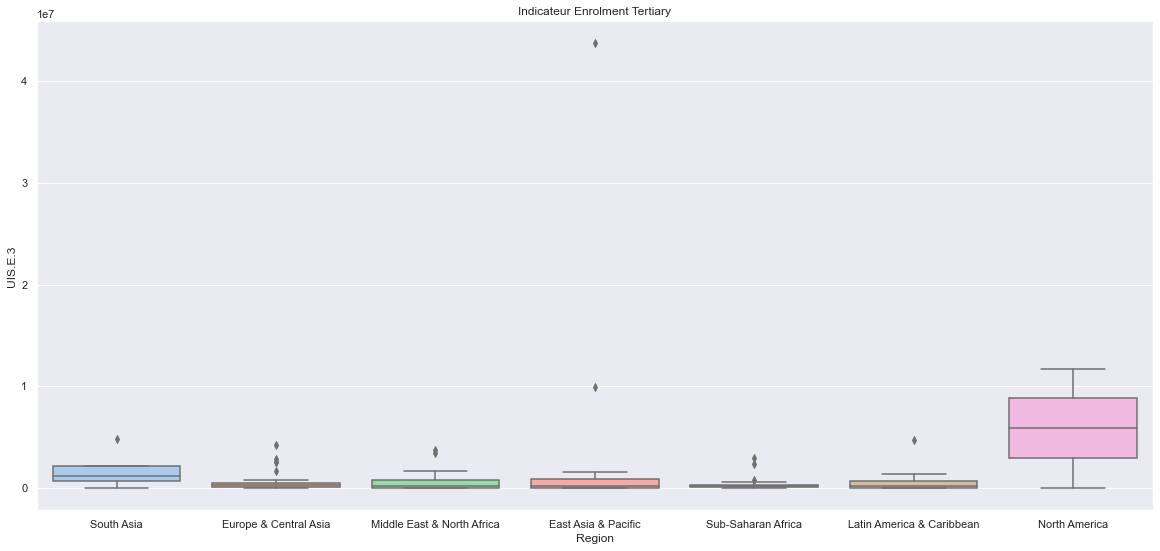

In [146]:
# Indicateur Enrolment Secondary : UIS.E.3 : Boxplot :

edu3["UIS.E.3"] = edu3.index
sns.boxplot(x="Region",y="2014",data=edu3)
plt.title('Indicateur Enrolment Tertiary')
plt.ylabel('UIS.E.3')

Text(0.5, 0, 'UIS.E.3')

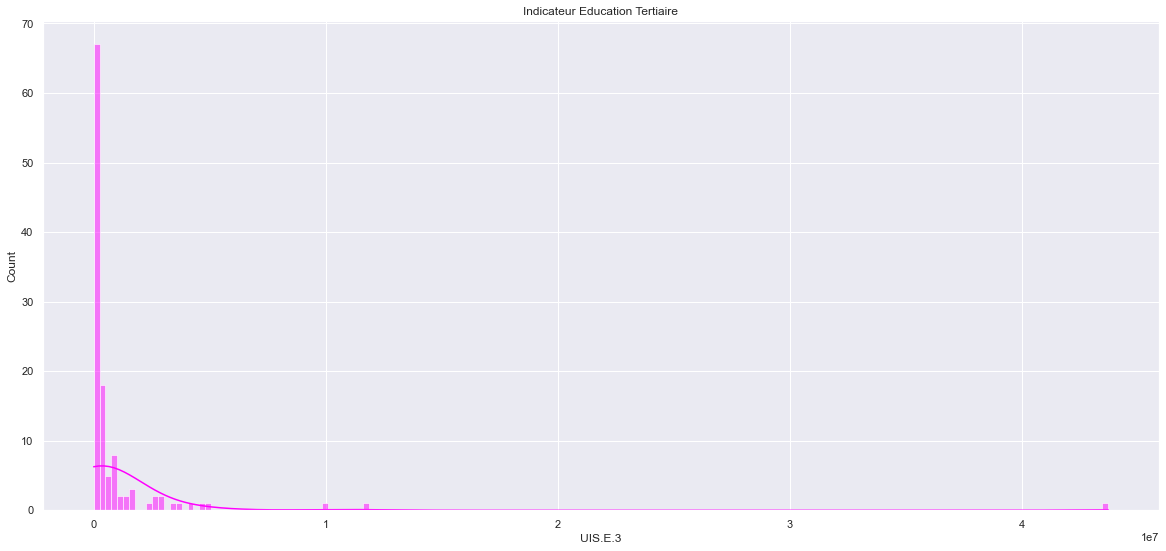

In [147]:
# Indicateur Education Tertiary : UIS.E.3 : Histogramme :

df_ter = datapropre2[datapropre2['Indicator Code'] == 'UIS.E.3']

sns.histplot(df_ter['2014'], kde = True, color='Magenta')
plt.title('Indicateur Education Tertiaire')
plt.xlabel('UIS.E.3')

# - BARPLOT DE CHAQUE INDICATEUR, PAR PAYS :

In [148]:
# Indexation de la Variable "Country Code" :

df_etude_pays2['Country Code'] = df_etude_pays2.index

<ipython-input-148-76e22ea551d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etude_pays2['Country Code'] = df_etude_pays2.index


<ipython-input-149-15d18b358ab1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etude_pays2['Country Code'] = df_etude_pays2.index


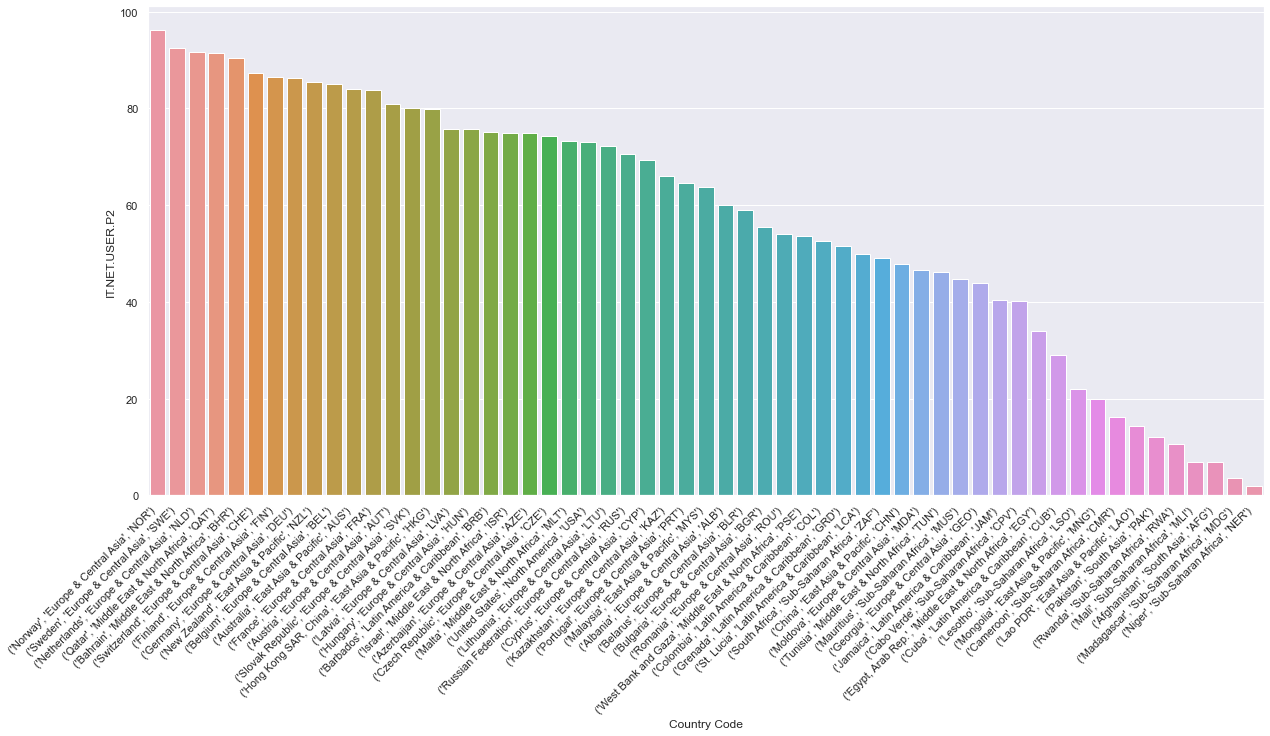

In [149]:
# Bar Chart de l'Indicateur Internet, selon les Pays :

df_etude_pays2['Country Code'] = df_etude_pays2.index
ax1 = sns.barplot(x="Country Code", y="IT.NET.USER.P2", data=df_etude_pays2.sort_values('IT.NET.USER.P2',ascending = False))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
None

In [150]:
# Dataframe du Top 5 des Pays, selon l'Indicateur Internet :

highest5internet = df_etude_pays2.nlargest(5, 'IT.NET.USER.P2')
highest5internet

Indicator Code                                        IT.NET.USER.P2  \
Country Name Region                     Country Code                   
Norway       Europe & Central Asia      NOR           96.300000        
Sweden       Europe & Central Asia      SWE           92.520000        
Netherlands  Europe & Central Asia      NLD           91.666666        
Qatar        Middle East & North Africa QAT           91.490000        
Bahrain      Middle East & North Africa BHR           90.503133        

Indicator Code                                        NY.GDP.MKTP.KD  \
Country Name Region                     Country Code                   
Norway       Europe & Central Asia      NOR           4.586262e+11     
Sweden       Europe & Central Asia      SWE           5.193420e+11     
Netherlands  Europe & Central Asia      NLD           8.516363e+11     
Qatar        Middle East & North Africa QAT           1.612259e+11     
Bahrain      Middle East & North Africa BHR           2.992284e+10     

Indicator Code                                        SP.POP.1524.TO.UN  \
Country Name Region                     Country Code                      
Norway       Europe & Central Asia      NOR           646489.0            
Sweden       Europe & Central Asia      SWE           1161310.0           
Netherlands  Europe & Central Asia      NLD           2004301.0           
Qatar        Middle East & North Africa QAT           127132.0            
Bahrain      Middle East & North Africa BHR           132000.0            

Indicator Code                                         UIS.E.3  UIS.E.4  \
Country Name Region                     Country Code                      
Norway       Europe & Central Asia      NOR           249882.0  6284.0    
Sweden       Europe & Central Asia      SWE           502035.0  23673.0   
Netherlands  Europe & Central Asia      NLD           746415.0  567.0     
Qatar        Middle East & North Africa QAT           40991.0   213.0     
Bahrain      Middle East & North Africa BHR           44100.0   6567.0    

Indicator Code                                                                            Region  \
Country Name Region                     Country Code                                               
Norway       Europe & Central Asia      NOR           (Norway, Europe & Central Asia, NOR)         
Sweden       Europe & Central Asia      SWE           (Sweden, Europe & Central Asia, SWE)         
Netherlands  Europe & Central Asia      NLD           (Netherlands, Europe & Central Asia, NLD)    
Qatar        Middle East & North Africa QAT           (Qatar, Middle East & North Africa, QAT)     
Bahrain      Middle East & North Africa BHR           (Bahrain, Middle East & North Africa, BHR)   

Indicator Code                                                                      Country Code  
Country Name Region                     Country Code                                              
Norway       Europe & Central Asia      NOR           (Norway, Europe & Central Asia, NOR)        
Sweden       Europe & Central Asia      SWE           (Sweden, Europe & Central Asia, SWE)        
Netherlands  Europe & Central Asia      NLD           (Netherlands, Europe & Central Asia, NLD)   
Qatar        Middle East & North Africa QAT           (Qatar, Middle East & North Africa, QAT)    
Bahrain      Middle East & North Africa BHR           (Bahrain, Middle East & North Africa, BHR)

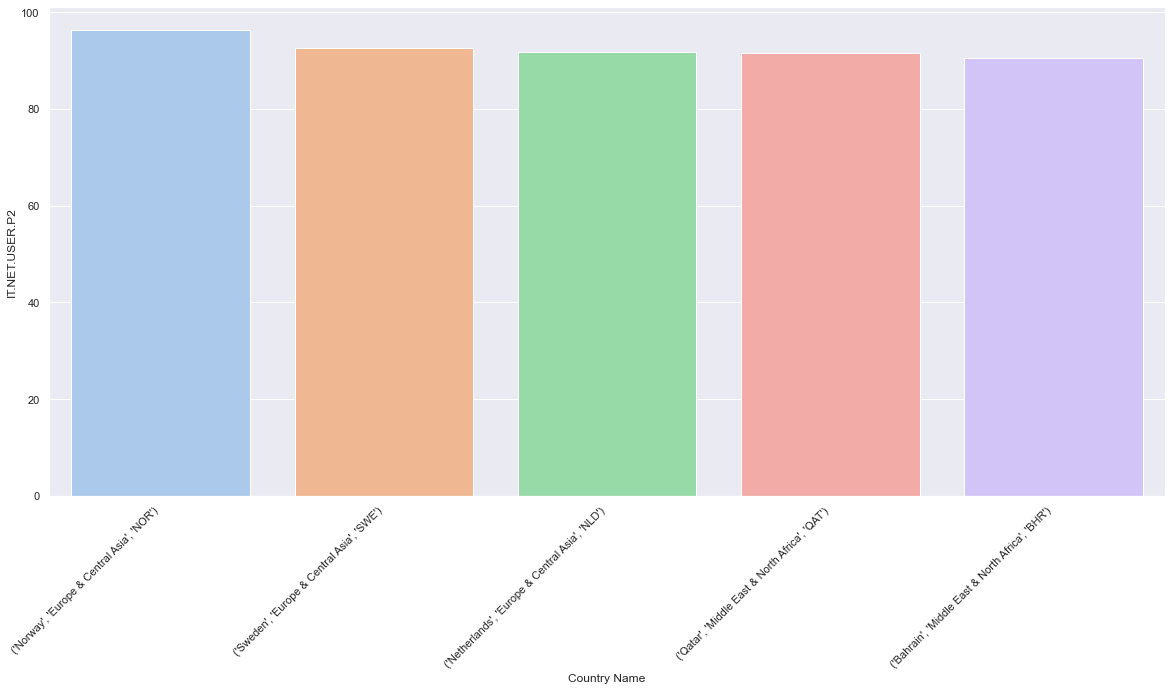

In [151]:
# Barplots du Top 5 des Pays, selon l'Indicateur Internet :

highest5internet['Country Name'] = highest5internet.index
ax213 = sns.barplot(x="Country Name", y="IT.NET.USER.P2", data=highest5internet.sort_values('IT.NET.USER.P2',ascending = False))
ax213.set_xticklabels(ax213.get_xticklabels(), rotation=45, horizontalalignment='right')
None

<ipython-input-152-da7021e394dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etude_pays2['Country Code'] = df_etude_pays2.index


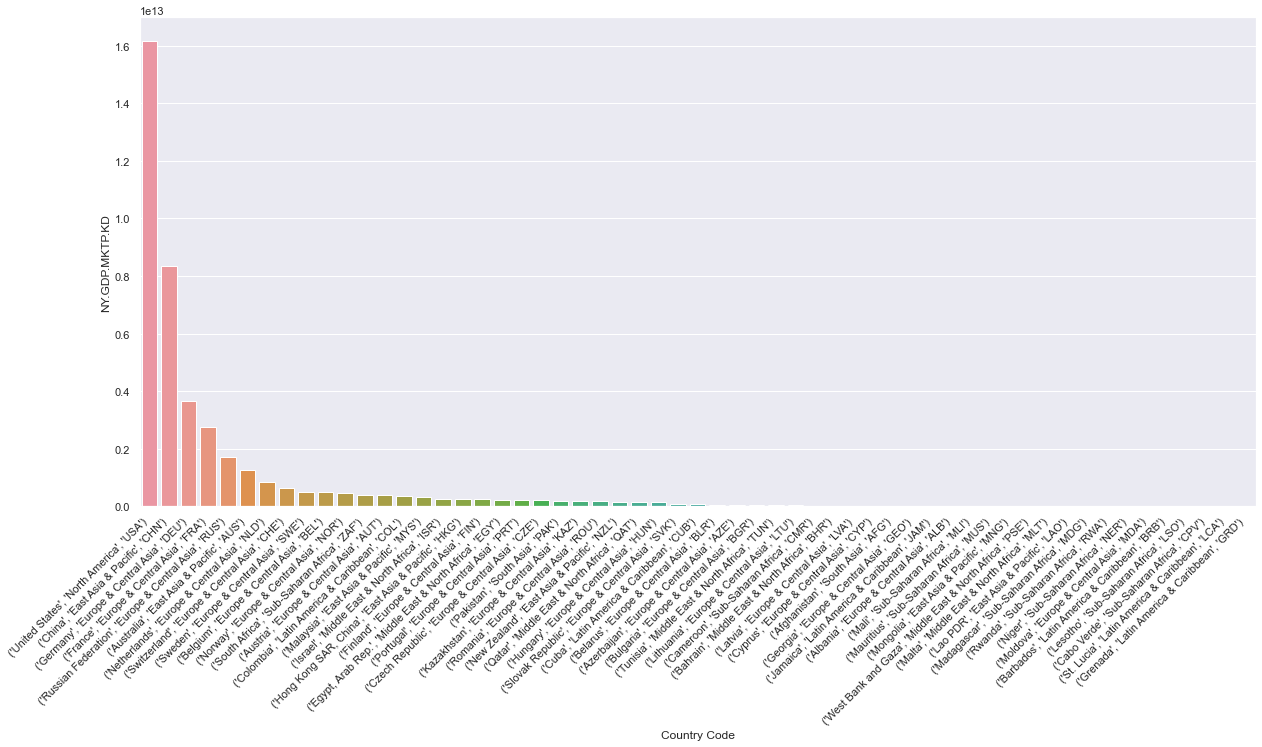

In [152]:
# Bar Chart de l'Indicateur Economique, selon les Pays :

df_etude_pays2['Country Code'] = df_etude_pays2.index
ax2 = sns.barplot(x="Country Code", y="NY.GDP.MKTP.KD", data=df_etude_pays2.sort_values('NY.GDP.MKTP.KD',ascending = False))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
None

<ipython-input-153-24ff93807144>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etude_pays2['Country Code'] = df_etude_pays2.index


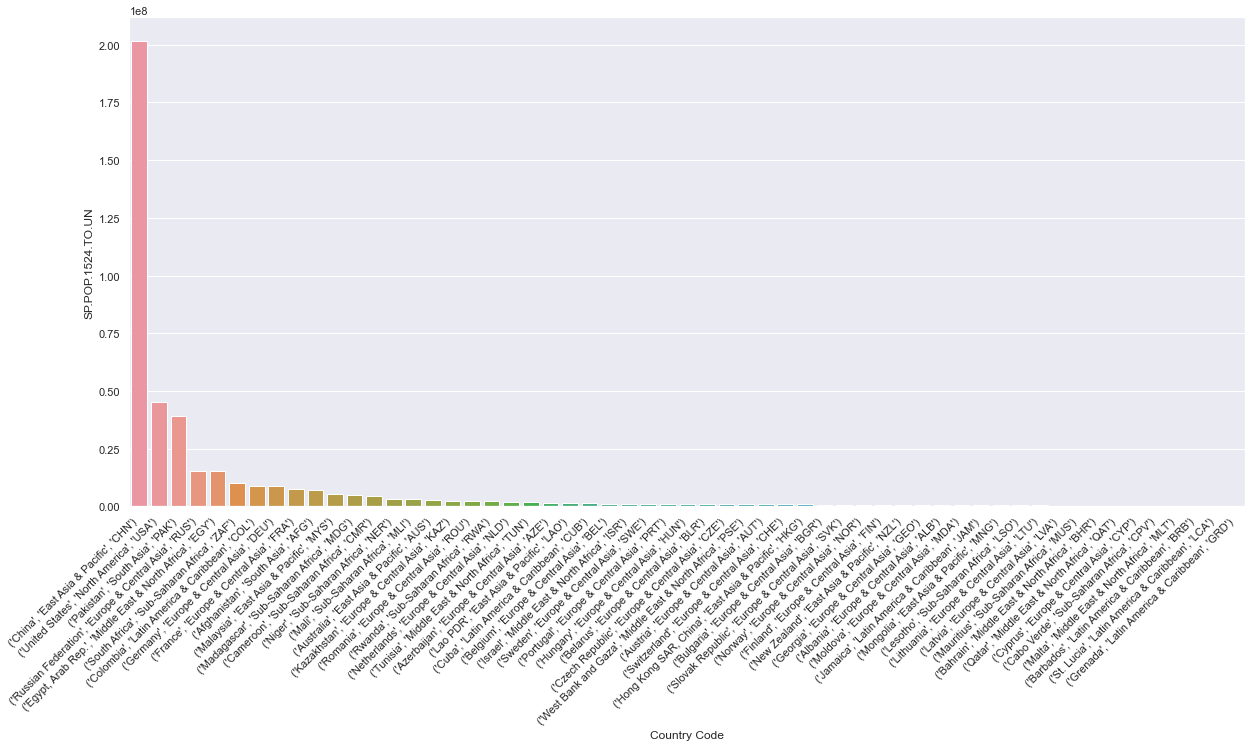

In [153]:
# Bar Chart de l'Indicateur Démographique, selon les Pays :

df_etude_pays2['Country Code'] = df_etude_pays2.index
ax3 = sns.barplot(x="Country Code", y="SP.POP.1524.TO.UN", data=df_etude_pays2.sort_values('SP.POP.1524.TO.UN',ascending = False))
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')
None

<ipython-input-154-a02f5427ee35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etude_pays2['Country Code'] = df_etude_pays2.index


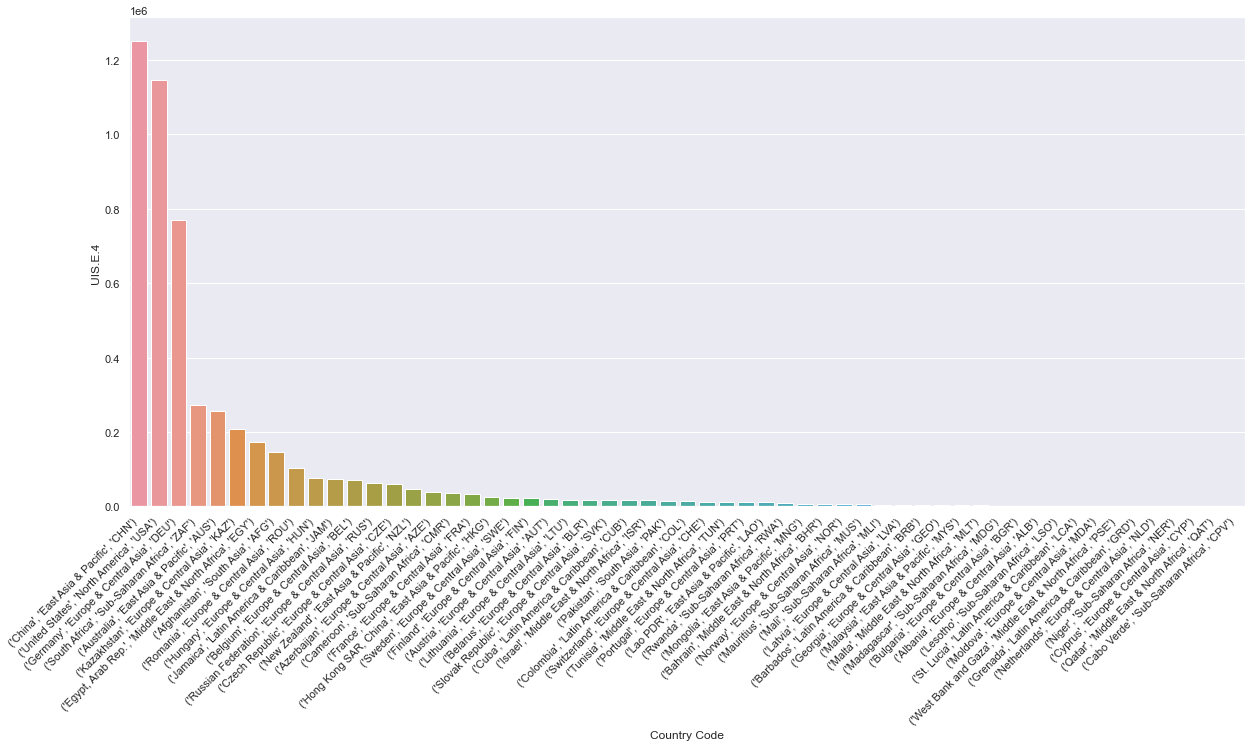

In [154]:
# Bar Chart de l'Indicateur Enrolment Secondary, selon les Pays :

df_etude_pays2['Country Code'] = df_etude_pays2.index
ax4 = sns.barplot(x="Country Code", y="UIS.E.4", data=df_etude_pays2.sort_values('UIS.E.4',ascending = False))
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, horizontalalignment='right')
None

<ipython-input-155-f1393d464c32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etude_pays2['Country Code'] = df_etude_pays2.index


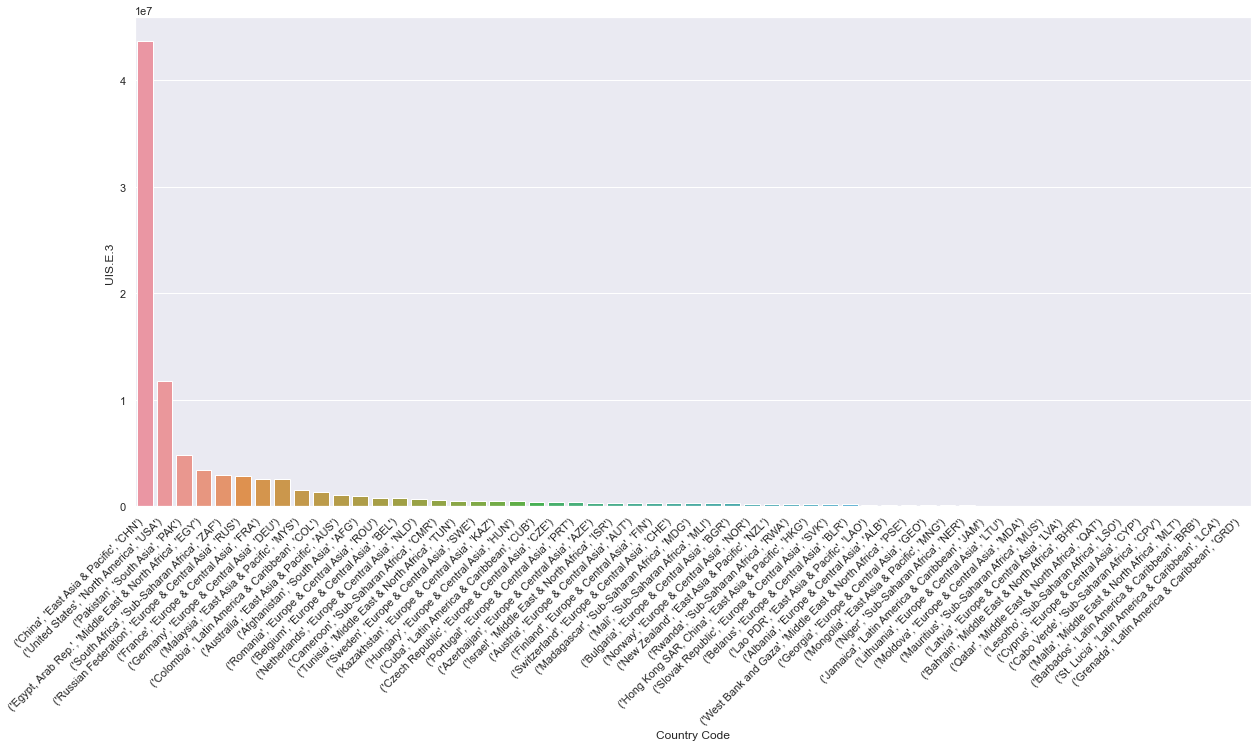

In [155]:
# Bar Chart de l'Indicateur Enrolment Tertiary, selon les Pays :

df_etude_pays2['Country Code'] = df_etude_pays2.index
ax5 = sns.barplot(x="Country Code", y="UIS.E.3", data=df_etude_pays2.sort_values('UIS.E.3',ascending = False))
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, horizontalalignment='right')
None

# - BARPLOT DE CHAQUE INDICATEUR, PAR ZONE GEOGRAPHIQUE :

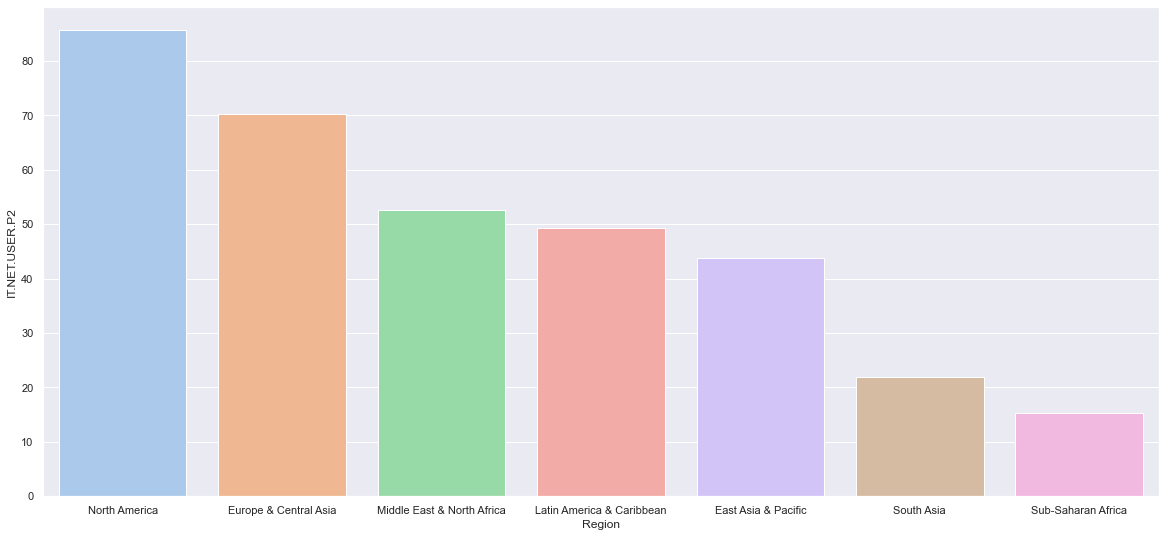

In [156]:
# Bar Chart de l'Indicateur Internet selon les Zones Géographiques :

df_etude_region2['Region'] = df_etude_region2.index
ax6 = sns.barplot(x="Region", y="IT.NET.USER.P2", data=df_etude_region2.sort_values('IT.NET.USER.P2',ascending = False))

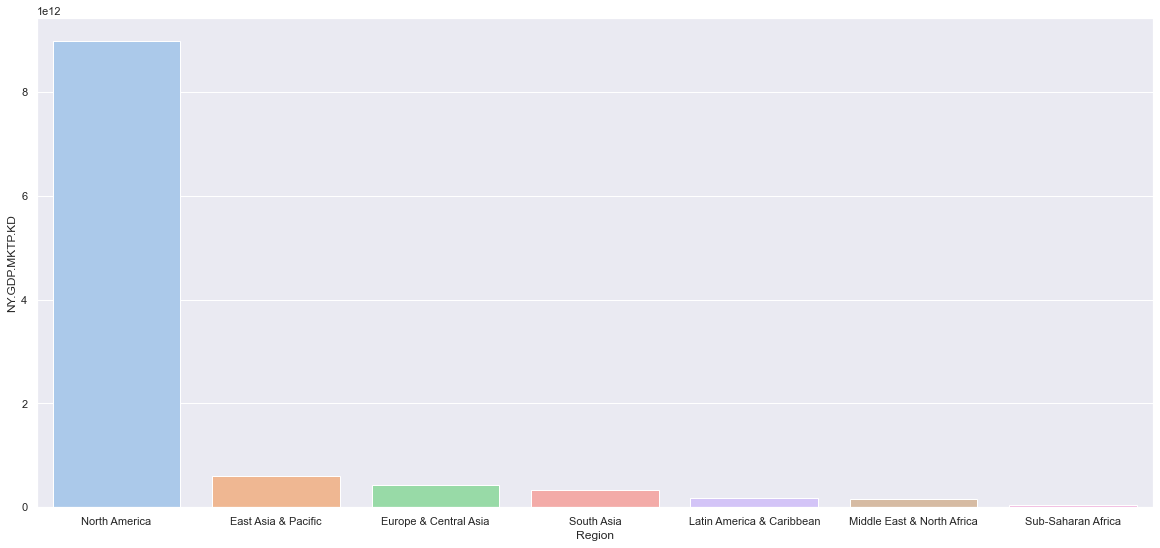

In [157]:
# Bar Chart de l'Indicateur GDPP selon les Zones Géographiques :

df_etude_region2['Region'] = df_etude_region2.index
ax7 = sns.barplot(x="Region", y="NY.GDP.MKTP.KD", data=df_etude_region2.sort_values('NY.GDP.MKTP.KD',ascending = False))

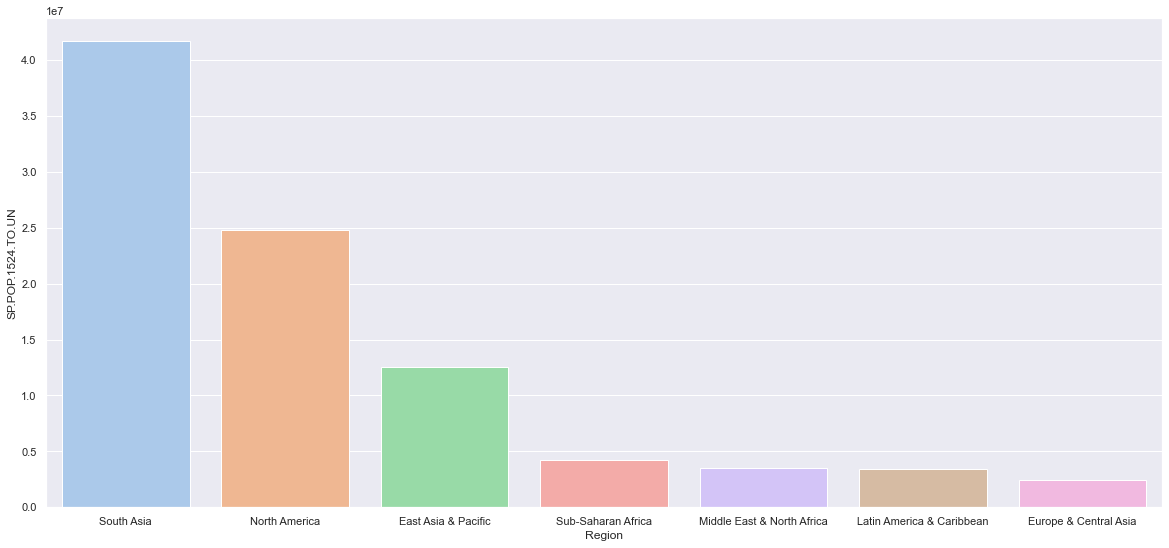

In [158]:
# Bar Chart de l'Indicateur '1524' selon les Zones Géographiques :

df_etude_region2['Region'] = df_etude_region2.index
ax8 = sns.barplot(x="Region", y="SP.POP.1524.TO.UN", data=df_etude_region2.sort_values('SP.POP.1524.TO.UN',ascending = False))

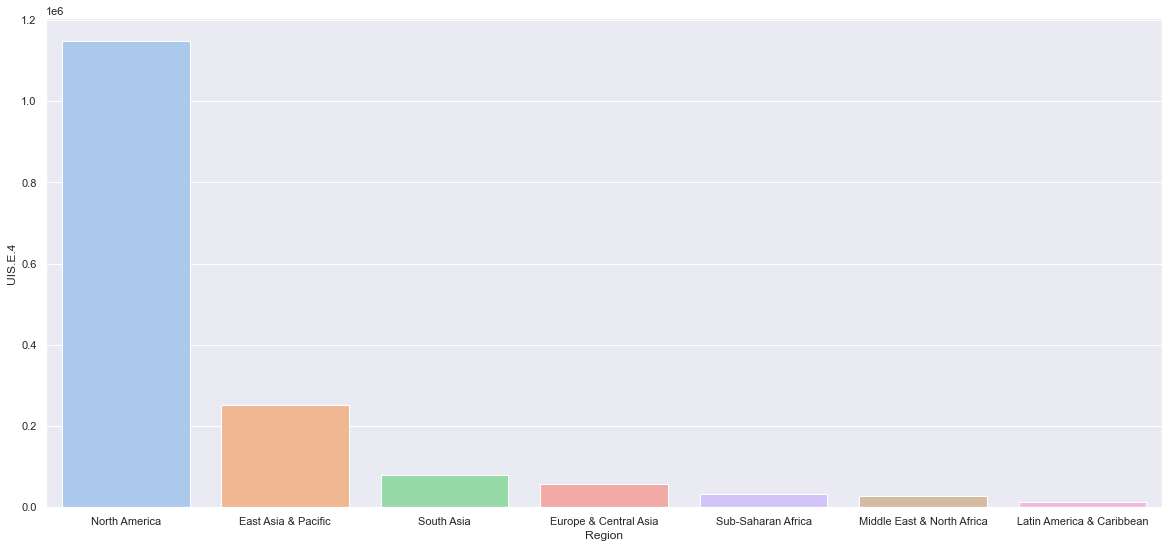

In [159]:
# Bar Chart de l'Indicateur Enrolment Secondary selon les Zones Géographiques :

df_etude_region2['Region'] = df_etude_region2.index
ax9 = sns.barplot(x="Region", y="UIS.E.4", data=df_etude_region2.sort_values('UIS.E.4',ascending = False))

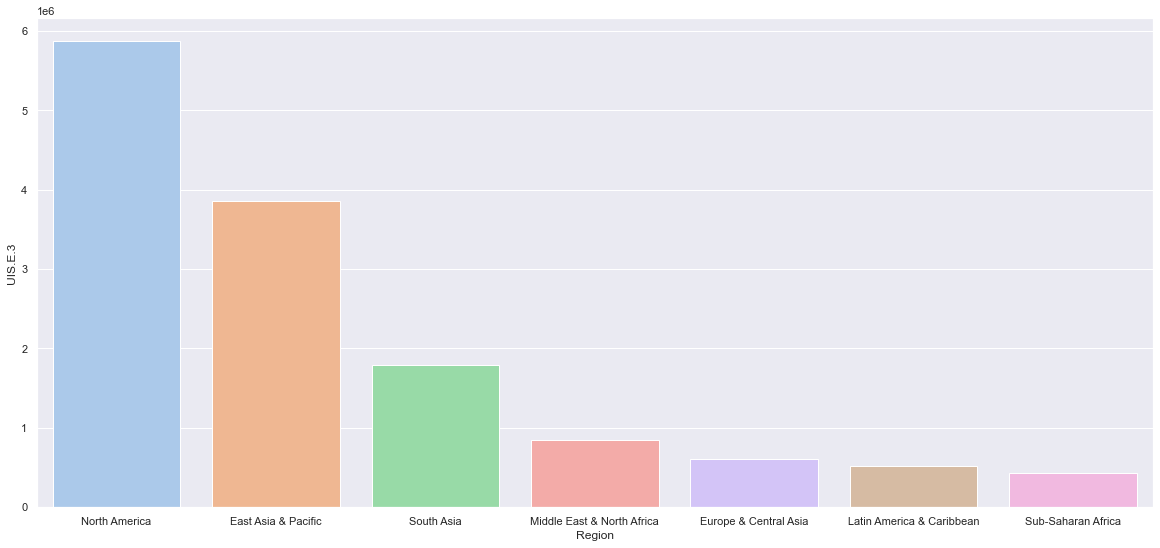

In [160]:
# Bar Chart de l'Indicateur Enrolment Tertiary selon les Zones Géographiques :

df_etude_region2['Region'] = df_etude_region2.index
ax10 = sns.barplot(x="Region", y="UIS.E.3", data=df_etude_region2.sort_values('UIS.E.3',ascending = False))

Conclusion :

Boxplots : Pour certains indicateurs (Internet et Economie), on constate une grande disparité, c’est le cas de l’Amérique du Nord et de l’Asie, par exemple. Pour un indicateur comme celui de l’Education, l’Amérique du Nord et l’Asie du Sud Est / Pacifique, présentent également une assez grande disparité.

Barplots : Une analyse par région et par pays a été menée. Par rapport à l’indicateur Internet, on a pu constater que la Norvège et la Suède présentaient les valeurs les plus hautes, « tirant » ainsi l’Europe vers le haut. Economiquement, les Etats Unis présentent les Valeurs les plus élevées. Pour la démographie, sans surprise, la Chine arrive en tête. Sur les questions d’Education, la Chine et les USA sont les leaders.

# d. Standard Scaler / Scoring par Pays et par Zone Géographique :

# - Standard Scaler / PowerTransformer :

In [161]:
pip install outils

Note: you may need to restart the kernel to use updated packages.


In [162]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer

<AxesSubplot:ylabel='Density'>

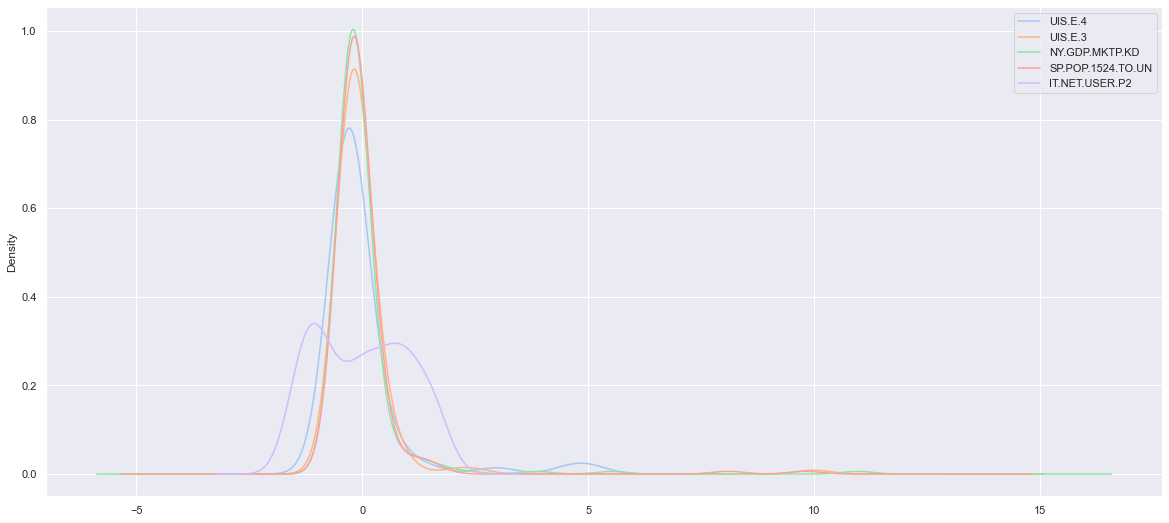

In [163]:
# Standard Scaler :

from sklearn.preprocessing import StandardScaler
df_score = datapropre2.pivot_table(index=['Country Name'], columns="Indicator Code")['2014']
df_score.shape
indic=['UIS.E.4','UIS.E.3','NY.GDP.MKTP.KD','SP.POP.1524.TO.UN','IT.NET.USER.P2']
scaler_std = StandardScaler()
scaled_df_std= scaler_std.fit_transform(df_score[indic])
scaled_df_std = pd.DataFrame(scaled_df_std, columns=indic)
scaled_df_std.plot.kde()

<AxesSubplot:ylabel='Density'>

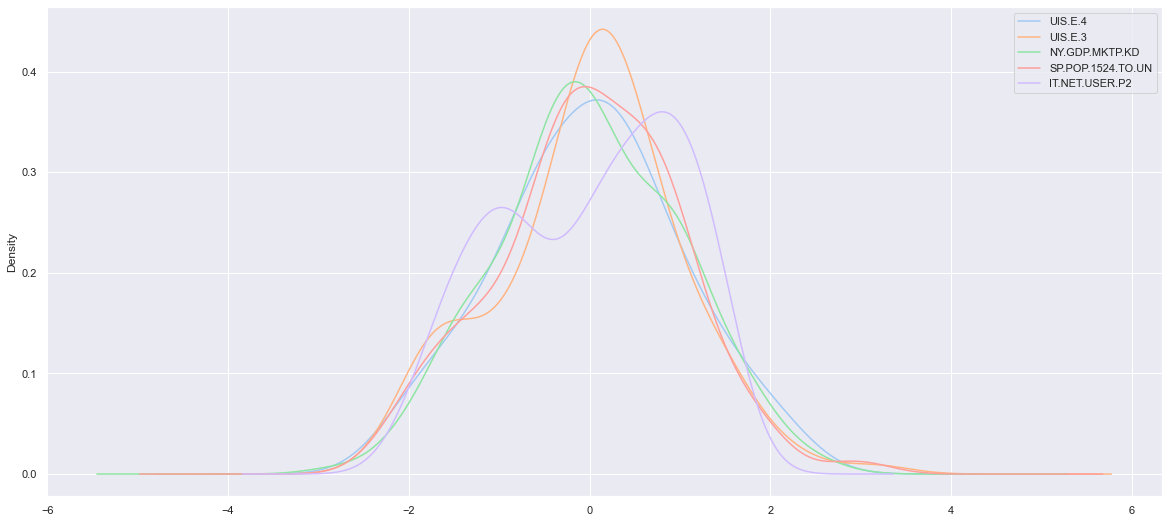

In [164]:
# PowerTransformer :

scaler_pow = PowerTransformer(method = 'box-cox')
df_score_scaled= scaler_pow.fit_transform(df_score[indic])
df_score_scaled = pd.DataFrame(df_score_scaled, columns=indic)
df_score_scaled.plot.kde()

# - SCORE INDICATEUR PAR PAYS :

In [165]:
# Calcul du Score Internet par Pays :

df_etude_pays2['Score_Internet'] = df_etude_pays2['IT.NET.USER.P2'] / df_etude_pays2['IT.NET.USER.P2'].max()
df_etude_pays2['Score_Internet']

<ipython-input-165-5b74eb67ac00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etude_pays2['Score_Internet'] = df_etude_pays2['IT.NET.USER.P2'] / df_etude_pays2['IT.NET.USER.P2'].max()


Country Name          Region                      Country Code
Afghanistan           South Asia                  AFG             0.072690
Albania               Europe & Central Asia       ALB             0.624091
Australia             East Asia & Pacific         AUS             0.872274
Austria               Europe & Central Asia       AUT             0.841078
Azerbaijan            Europe & Central Asia       AZE             0.778816
Bahrain               Middle East & North Africa  BHR             0.939804
Barbados              Latin America & Caribbean   BRB             0.780478
Belarus               Europe & Central Asia       BLR             0.612876
Belgium               Europe & Central Asia       BEL             0.882658
Bulgaria              Europe & Central Asia       BGR             0.576220
Cabo Verde            Sub-Saharan Africa          CPV             0.418069
Cameroon              Sub-Saharan Africa          CMR             0.168379
China                 East Asia & Pac

In [166]:
# Calcul du Score GDPP par Pays :

df_etude_pays2['Score_Gdpp'] = df_etude_pays2['NY.GDP.MKTP.KD'] / df_etude_pays2['NY.GDP.MKTP.KD'].max()
df_etude_pays2['Score_Gdpp']

<ipython-input-166-d511ee9a6df9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etude_pays2['Score_Gdpp'] = df_etude_pays2['NY.GDP.MKTP.KD'] / df_etude_pays2['NY.GDP.MKTP.KD'].max()


Country Name          Region                      Country Code
Afghanistan           South Asia                  AFG             0.001236
Albania               Europe & Central Asia       ALB             0.000788
Australia             East Asia & Pacific         AUS             0.078883
Austria               Europe & Central Asia       AUT             0.025284
Azerbaijan            Europe & Central Asia       AZE             0.003609
Bahrain               Middle East & North Africa  BHR             0.001850
Barbados              Latin America & Caribbean   BRB             0.000278
Belarus               Europe & Central Asia       BLR             0.003903
Belgium               Europe & Central Asia       BEL             0.030973
Bulgaria              Europe & Central Asia       BGR             0.003260
Cabo Verde            Sub-Saharan Africa          CPV             0.000110
Cameroon              Sub-Saharan Africa          CMR             0.001963
China                 East Asia & Pac

In [167]:
# Calcul du Score 1524 par Pays :

df_etude_pays2['Score_1524'] = df_etude_pays2['SP.POP.1524.TO.UN'] / df_etude_pays2['SP.POP.1524.TO.UN'].max()
df_etude_pays2['Score_1524']

<ipython-input-167-67331a462c8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etude_pays2['Score_1524'] = df_etude_pays2['SP.POP.1524.TO.UN'] / df_etude_pays2['SP.POP.1524.TO.UN'].max()


Country Name          Region                      Country Code
Afghanistan           South Asia                  AFG             0.034846
Albania               Europe & Central Asia       ALB             0.002822
Australia             East Asia & Pacific         AUS             0.014481
Austria               Europe & Central Asia       AUT             0.004841
Azerbaijan            Europe & Central Asia       AZE             0.007999
Bahrain               Middle East & North Africa  BHR             0.000654
Barbados              Latin America & Caribbean   BRB             0.000190
Belarus               Europe & Central Asia       BLR             0.005600
Belgium               Europe & Central Asia       BEL             0.006187
Bulgaria              Europe & Central Asia       BGR             0.003675
Cabo Verde            Sub-Saharan Africa          CPV             0.000613
Cameroon              Sub-Saharan Africa          CMR             0.021663
China                 East Asia & Pac

In [168]:
# Calcul du Score Enrolment Secondary par Pays :

df_etude_pays2['Score_Enrol2'] = df_etude_pays2['UIS.E.4'] / df_etude_pays2['UIS.E.4'].max()
df_etude_pays2['Score_Enrol2']

<ipython-input-168-f9a346b5164d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etude_pays2['Score_Enrol2'] = df_etude_pays2['UIS.E.4'] / df_etude_pays2['UIS.E.4'].max()


Country Name          Region                      Country Code
Afghanistan           South Asia                  AFG             0.115943
Albania               Europe & Central Asia       ALB             0.001558
Australia             East Asia & Pacific         AUS             0.205347
Austria               Europe & Central Asia       AUT             0.016072
Azerbaijan            Europe & Central Asia       AZE             0.030333
Bahrain               Middle East & North Africa  BHR             0.005243
Barbados              Latin America & Caribbean   BRB             0.002959
Belarus               Europe & Central Asia       BLR             0.014104
Belgium               Europe & Central Asia       BEL             0.056173
Bulgaria              Europe & Central Asia       BGR             0.001729
Cabo Verde            Sub-Saharan Africa          CPV             0.000063
Cameroon              Sub-Saharan Africa          CMR             0.028411
China                 East Asia & Pac

In [169]:
# Calcul du Score Enrolment Tertiary par Pays :

df_etude_pays2['Score_Enrol3'] = df_etude_pays2['UIS.E.3'] / df_etude_pays2['UIS.E.3'].max()
df_etude_pays2['Score_Enrol3']

<ipython-input-169-8f4769d6ff76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etude_pays2['Score_Enrol3'] = df_etude_pays2['UIS.E.3'] / df_etude_pays2['UIS.E.3'].max()


Country Name          Region                      Country Code
Afghanistan           South Asia                  AFG             0.022164
Albania               Europe & Central Asia       ALB             0.003476
Australia             East Asia & Pacific         AUS             0.025262
Austria               Europe & Central Asia       AUT             0.008309
Azerbaijan            Europe & Central Asia       AZE             0.008525
Bahrain               Middle East & North Africa  BHR             0.001009
Barbados              Latin America & Caribbean   BRB             0.000192
Belarus               Europe & Central Asia       BLR             0.004596
Belgium               Europe & Central Asia       BEL             0.017763
Bulgaria              Europe & Central Asia       BGR             0.006562
Cabo Verde            Sub-Saharan Africa          CPV             0.000552
Cameroon              Sub-Saharan Africa          CMR             0.013722
China                 East Asia & Pac

In [170]:
# Filtrage de la Dataframe en fonction des Scores Indicateurs :

df_etude_pays3 = df_etude_pays2.filter(items=['Country Name','Score_Internet','Score_Gdpp','Score_1524','Score_Enrol2','Score_Enrol3'])

In [171]:
# Moyenne arithmétique des Scores Indicateurs selon les pays :

df_etude_pays3['ScoreTotalPays'] = (df_etude_pays3['Score_Internet'] + df_etude_pays3['Score_Enrol2'] + df_etude_pays3['Score_Enrol3']+ df_etude_pays3['Score_Gdpp'] + df_etude_pays3['Score_1524'] ) / 5

In [172]:
# Présentation de la Dataframe Score Total Pays :

df_etude_pays3.sort_values('ScoreTotalPays',ascending=False)

Indicator Code                                                Score_Internet  \
Country Name         Region                     Country Code                   
China                East Asia & Pacific        CHN           0.497404         
United States        North America              USA           0.758048         
Germany              Europe & Central Asia      DEU           0.895016         
Australia            East Asia & Pacific        AUS           0.872274         
France               Europe & Central Asia      FRA           0.869678         
Norway               Europe & Central Asia      NOR           1.000000         
Netherlands          Europe & Central Asia      NLD           0.951886         
Russian Federation   Europe & Central Asia      RUS           0.732295         
Sweden               Europe & Central Asia      SWE           0.960748         
Belgium              Europe & Central Asia      BEL           0.882658         
Switzerland          Europe & Central Asia      CHE           0.907580         
Qatar                Middle East & North Africa QAT           0.950052         
Bahrain              Middle East & North Africa BHR           0.939804         
New Zealand          East Asia & Pacific        NZL           0.887850         
Finland              Europe & Central Asia      FIN           0.898550         
Austria              Europe & Central Asia      AUT           0.841078         
Kazakhstan           Europe & Central Asia      KAZ           0.685358         
Hong Kong SAR, China East Asia & Pacific        HKG           0.829349         
Hungary              Europe & Central Asia      HUN           0.785599         
South Africa         Sub-Saharan Africa         ZAF           0.508827         
Slovak Republic      Europe & Central Asia      SVK           0.830530         
Czech Republic       Europe & Central Asia      CZE           0.770838         
Azerbaijan           Europe & Central Asia      AZE           0.778816         
Israel               Middle East & North Africa ISR           0.779001         
Latvia               Europe & Central Asia      LVA           0.787435         
Barbados             Latin America & Caribbean  BRB           0.780478         
Lithuania            Europe & Central Asia      LTU           0.749013         
Malta                Middle East & North Africa MLT           0.759813         
Malaysia             East Asia & Pacific        MYS           0.661116         
Cyprus               Europe & Central Asia      CYP           0.719938         
Portugal             Europe & Central Asia      PRT           0.670717         
Romania              Europe & Central Asia      ROU           0.561578         
Egypt, Arab Rep.     Middle East & North Africa EGY           0.351969         
Colombia             Latin America & Caribbean  COL           0.545898         
Belarus              Europe & Central Asia      BLR           0.612876         
Albania              Europe & Central Asia      ALB           0.624091         
Bulgaria             Europe & Central Asia      BGR           0.576220         
West Bank and Gaza   Middle East & North Africa PSE           0.557321         
Grenada              Latin America & Caribbean  GRD           0.535826         
St. Lucia            Latin America & Caribbean  LCA           0.519211         
Tunisia              Middle East & North Africa TUN           0.479335         
Moldova              Europe & Central Asia      MDA           0.483904         
Jamaica              Latin America & Caribbean  JAM           0.419551         
Mauritius            Sub-Saharan Africa         MUS           0.465247         
Georgia              Europe & Central Asia      GEO           0.456906         
Pakistan             South Asia                 PAK           0.124611         
Cabo Verde           Sub-Saharan Africa         CPV           0.418069         
Cuba                 Latin America & Caribbean  CUB           0.301871         


In [173]:
# Top 5 des Pays selon leurs scores totaux :

df_etude_pays3.sort_values('ScoreTotalPays',ascending=False).iloc[:5]

Indicator Code                                    Score_Internet  Score_Gdpp  \
Country Name  Region                Country Code                               
China         East Asia & Pacific   CHN           0.497404        0.515117     
United States North America         USA           0.758048        1.000000     
Germany       Europe & Central Asia DEU           0.895016        0.225378     
Australia     East Asia & Pacific   AUS           0.872274        0.078883     
France        Europe & Central Asia FRA           0.869678        0.169879     

Indicator Code                                    Score_1524  Score_Enrol2  \
Country Name  Region                Country Code                             
China         East Asia & Pacific   CHN           1.000000    1.000000       
United States North America         USA           0.224134    0.916210       
Germany       Europe & Central Asia DEU           0.043703    0.614101       
Australia     East Asia & Pacific   AUS           0.014481    0.205347       
France        Europe & Central Asia FRA           0.037435    0.026480       

Indicator Code                                    Score_Enrol3  ScoreTotalPays  
Country Name  Region                Country Code                                
China         East Asia & Pacific   CHN           1.000000      0.802504        
United States North America         USA           0.268509      0.633380        
Germany       Europe & Central Asia DEU           0.059025      0.367444        
Australia     East Asia & Pacific   AUS           0.025262      0.239249        
France        Europe & Central Asia FRA           0.059446      0.232584

In [174]:
# Top 10 des Pays selon leurs scores totaux :

df_etude_pays3.sort_values('ScoreTotalPays',ascending=False).iloc[:10]

Indicator Code                                         Score_Internet  \
Country Name       Region                Country Code                   
China              East Asia & Pacific   CHN           0.497404         
United States      North America         USA           0.758048         
Germany            Europe & Central Asia DEU           0.895016         
Australia          East Asia & Pacific   AUS           0.872274         
France             Europe & Central Asia FRA           0.869678         
Norway             Europe & Central Asia NOR           1.000000         
Netherlands        Europe & Central Asia NLD           0.951886         
Russian Federation Europe & Central Asia RUS           0.732295         
Sweden             Europe & Central Asia SWE           0.960748         
Belgium            Europe & Central Asia BEL           0.882658         

Indicator Code                                         Score_Gdpp  Score_1524  \
Country Name       Region                Country Code                           
China              East Asia & Pacific   CHN           0.515117    1.000000     
United States      North America         USA           1.000000    0.224134     
Germany            Europe & Central Asia DEU           0.225378    0.043703     
Australia          East Asia & Pacific   AUS           0.078883    0.014481     
France             Europe & Central Asia FRA           0.169879    0.037435     
Norway             Europe & Central Asia NOR           0.028350    0.003204     
Netherlands        Europe & Central Asia NLD           0.052643    0.009932     
Russian Federation Europe & Central Asia RUS           0.105482    0.076828     
Sweden             Europe & Central Asia SWE           0.032103    0.005755     
Belgium            Europe & Central Asia BEL           0.030973    0.006187     

Indicator Code                                         Score_Enrol2  \
Country Name       Region                Country Code                 
China              East Asia & Pacific   CHN           1.000000       
United States      North America         USA           0.916210       
Germany            Europe & Central Asia DEU           0.614101       
Australia          East Asia & Pacific   AUS           0.205347       
France             Europe & Central Asia FRA           0.026480       
Norway             Europe & Central Asia NOR           0.005017       
Netherlands        Europe & Central Asia NLD           0.000453       
Russian Federation Europe & Central Asia RUS           0.049986       
Sweden             Europe & Central Asia SWE           0.018900       
Belgium            Europe & Central Asia BEL           0.056173       

Indicator Code                                         Score_Enrol3  \
Country Name       Region                Country Code                 
China              East Asia & Pacific   CHN           1.000000       
United States      North America         USA           0.268509       
Germany            Europe & Central Asia DEU           0.059025       
Australia          East Asia & Pacific   AUS           0.025262       
France             Europe & Central Asia FRA           0.059446       
Norway             Europe & Central Asia NOR           0.005717       
Netherlands        Europe & Central Asia NLD           0.017077       
Russian Federation Europe & Central Asia RUS           0.064586       
Sweden             Europe & Central Asia SWE           0.011486       
Belgium            Europe & Central Asia BEL           0.017763       

Indicator Code                                         ScoreTotalPays  
Country Name       Region                Country Code                  
China              East Asia & Pacific   CHN           0.802504        
United States      North America         USA           0.633380        
Germany            Europe & Central Asia DEU           0.367444        
Australia          East Asia & Pacific   AUS           0.239249        
France      

# - SCORE INDICATEUR PAR ZONE GEOGRAPHIQUE :

In [175]:
# Calcul du Score Internet par Zone Géographique :

df_etude_region2['Score_Internet'] = df_etude_region2['IT.NET.USER.P2'] / df_etude_region2['IT.NET.USER.P2'].max()
df_etude_region2['Score_Internet']

Region
East Asia & Pacific           0.511491
Europe & Central Asia         0.819557
Latin America & Caribbean     0.576489
Middle East & North Africa    0.614482
North America                 1.000000
South Asia                    0.255021
Sub-Saharan Africa            0.178601
Name: Score_Internet, dtype: float64

In [176]:
# Calcul du Score GDPP par Zone Géographique :

df_etude_region2['Score_Gdpp'] = df_etude_region2['NY.GDP.MKTP.KD'] / df_etude_region2['NY.GDP.MKTP.KD'].max()
df_etude_region2['Score_Gdpp']

Region
East Asia & Pacific           0.066440
Europe & Central Asia         0.047218
Latin America & Caribbean     0.019101
Middle East & North Africa    0.017802
North America                 1.000000
South Asia                    0.036213
Sub-Saharan Africa            0.003983
Name: Score_Gdpp, dtype: float64

In [177]:
# Calcul du Score 1524 par Zone Géographique :

df_etude_region2['Score_1524'] = df_etude_region2['SP.POP.1524.TO.UN'] / df_etude_region2['SP.POP.1524.TO.UN'].max()
df_etude_region2['Score_1524']

Region
East Asia & Pacific           0.301399
Europe & Central Asia         0.057564
Latin America & Caribbean     0.082231
Middle East & North Africa    0.085166
North America                 0.595480
South Asia                    1.000000
Sub-Saharan Africa            0.100774
Name: Score_1524, dtype: float64

In [178]:
# Calcul du Score Enrolment Secondary par Zone Géographique :

df_etude_region2['Score_Enrol2'] = df_etude_region2['UIS.E.4'] / df_etude_region2['UIS.E.4'].max()
df_etude_region2['Score_Enrol2']

Region
East Asia & Pacific           0.220494
Europe & Central Asia         0.049399
Latin America & Caribbean     0.012261
Middle East & North Africa    0.023622
North America                 1.000000
South Asia                    0.069749
Sub-Saharan Africa            0.029371
Name: Score_Enrol2, dtype: float64

In [179]:
# Calcul du Score Enrolment Tertiary par Zone Géographique :

df_etude_region2['Score_Enrol3']= df_etude_region2['UIS.E.3'] / df_etude_region2['UIS.E.3'].max()
df_etude_region2['Score_Enrol3']

Region
East Asia & Pacific           0.657221
Europe & Central Asia         0.103617
Latin America & Caribbean     0.088111
Middle East & North Africa    0.144627
North America                 1.000000
South Asia                    0.304594
Sub-Saharan Africa            0.073043
Name: Score_Enrol3, dtype: float64

In [180]:
# Filtrage de la Dataframe en fonction des Scores Indicateurs :

df_etude_region3 = df_etude_region2.filter(items=['Country Name','Score_Internet','Score_Gdpp','Score_1524','Score_Enrol2','Score_Enrol3'])

In [181]:
# Moyenne arithmétique des Scores Indicateurs selon les régions :

df_etude_region3['ScoreTotalRegion'] = (df_etude_region3['Score_Internet'] + df_etude_region3['Score_Enrol2'] + df_etude_region3['Score_Enrol3'] + df_etude_region3['Score_1524'] + df_etude_region3['Score_Gdpp'] ) / 5

In [182]:
# Présentation de la Dataframe Score Total Régions :

df_etude_region3.sort_values('ScoreTotalRegion',ascending=False)

Indicator Code              Score_Internet  Score_Gdpp  Score_1524  \
Region                                                               
North America               1.000000        1.000000    0.595480     
East Asia & Pacific         0.511491        0.066440    0.301399     
South Asia                  0.255021        0.036213    1.000000     
Europe & Central Asia       0.819557        0.047218    0.057564     
Middle East & North Africa  0.614482        0.017802    0.085166     
Latin America & Caribbean   0.576489        0.019101    0.082231     
Sub-Saharan Africa          0.178601        0.003983    0.100774     

Indicator Code              Score_Enrol2  Score_Enrol3  ScoreTotalRegion  
Region                                                                    
North America               1.000000      1.000000      0.919096          
East Asia & Pacific         0.220494      0.657221      0.351409          
South Asia                  0.069749      0.304594      0.333115          
Europe & Central Asia       0.049399      0.103617      0.215471          
Middle East & North Africa  0.023622      0.144627      0.177140          
Latin America & Caribbean   0.012261      0.088111      0.155639          
Sub-Saharan Africa          0.029371      0.073043      0.077154

# - LINEPLOT FINAL DES INDICATEURS SELON LES PAYS A FORT POTENTIEL :

In [183]:
# Rappel des Indicateurs Choisis :

indicators=['UIS.E.4','UIS.E.3','NY.GDP.MKTP.KD','SP.POP.1524.TO.UN','IT.NET.USER.P2']

In [184]:
# Rappel de notre dataframe d'étude :

datapropre2.head()

Country Name Country Code      Region     sub-region  \
0  Afghanistan  AFG          South Asia  Southern Asia   
1  Afghanistan  AFG          South Asia  Southern Asia   
2  Afghanistan  AFG          South Asia  Southern Asia   
3  Afghanistan  AFG          South Asia  Southern Asia   
4  Afghanistan  AFG          South Asia  Southern Asia   

                                                            Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)              
1  Adjusted net enrolment rate, lower secondary, female (%)                  
2  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
3  Adjusted net enrolment rate, lower secondary, male (%)                    
4  Adjusted net enrolment rate, primary, both sexes (%)                      

   Indicator Code  2000  2001  2002  2003  2004  2005  2006       2007  2008  \
0  UIS.NERA.2     NaN   NaN   NaN   NaN   NaN   NaN   NaN    28.059870 NaN     
1  UIS.NERA.2.F   NaN   NaN   NaN   NaN   NaN   NaN   NaN    15.223100 NaN     
2  UIS.NERA.2.GPI NaN   NaN   NaN   NaN   NaN   NaN   NaN    0.379130  NaN     
3  UIS.NERA.2.M   NaN   NaN   NaN   NaN   NaN   NaN   NaN    40.152851 NaN     
4  SE.PRM.TENR    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN        NaN     

   2009  2010  2011  2012       2013       2014  2015  2016  
0 NaN   NaN   NaN   NaN    47.436790  50.627232 NaN   NaN    
1 NaN   NaN   NaN   NaN    34.073261  37.641541 NaN   NaN    
2 NaN   NaN   NaN   NaN    0.567060   0.598370  NaN   NaN    
3 NaN   NaN   NaN   NaN    60.087059  62.906952 NaN   NaN    
4 NaN   NaN   NaN   NaN   NaN        NaN        NaN   NaN

In [185]:
# Sélection des indicateurs et des pays retenus :

indicators=['UIS.E.4','UIS.E.3','NY.GDP.MKTP.KD','SP.POP.1524.TO.UN','IT.NET.USER.P2']
pays_selec = ['China','United States','Germany','Australia','France','Norway','Netherlands','Russian Federation','Sweden','Belgium']

In [186]:
# Dataframe de sélection :

dataselection = datapropre2[datapropre2['Country Name'].isin(pays_selec) & datapropre2['Indicator Code'].isin(indicators)]
dataselection

Country Name Country Code                 Region  \
37824   Australia           AUS          East Asia & Pacific     
37867   Australia           AUS          East Asia & Pacific     
37895   Australia           AUS          East Asia & Pacific     
38028   Australia           AUS          East Asia & Pacific     
39135   Australia           AUS          East Asia & Pacific     
67144   Belgium             BEL          Europe & Central Asia   
67187   Belgium             BEL          Europe & Central Asia   
67215   Belgium             BEL          Europe & Central Asia   
67348   Belgium             BEL          Europe & Central Asia   
68455   Belgium             BEL          Europe & Central Asia   
144112  China               CHN          East Asia & Pacific     
144155  China               CHN          East Asia & Pacific     
144183  China               CHN          East Asia & Pacific     
144316  China               CHN          East Asia & Pacific     
145423  China               CHN          East Asia & Pacific     
243071  France              FRA          Europe & Central Asia   
243114  France              FRA          Europe & Central Asia   
243142  France              FRA          Europe & Central Asia   
243275  France              FRA          Europe & Central Asia   
244382  France              FRA          Europe & Central Asia   
261398  Germany             DEU          Europe & Central Asia   
261441  Germany             DEU          Europe & Central Asia   
261469  Germany             DEU          Europe & Central Asia   
261602  Germany             DEU          Europe & Central Asia   
262709  Germany             DEU          Europe & Central Asia   
499631  Netherlands         NLD          Europe & Central Asia   
499674  Netherlands         NLD          Europe & Central Asia   
499702  Netherlands         NLD          Europe & Central Asia   
499835  Netherlands         NLD          Europe & Central Asia   
500942  Netherlands         NLD          Europe & Central Asia   
528953  Norway              NOR          Europe & Central Asia   
528996  Norway              NOR          Europe & Central Asia   
529024  Norway              NOR          Europe & Central Asia   
529157  Norway              NOR          Europe & Central Asia   
530264  Norway              NOR          Europe & Central Asia   
583930  Russian Federation  RUS          Europe & Central Asia   
583973  Russian Federation  RUS          Europe & Central Asia   
584001  Russian Federation  RUS          Europe & Central Asia   
584134  Russian Federation  RUS          Europe & Central Asia   
585241  Russian Federation  RUS          Europe & Central Asia   
679225  Sweden              SWE          Europe & Central Asia   
679268  Sweden              SWE          Europe & Central Asia   
679296  Sweden              SWE          Europe & Central Asia   
679429  Sweden              SWE          Europe & Central Asia   
680536  Sweden              SWE          Europe & Central Asia   
748862  United States       USA          North America           
748905  United States       USA          North America           
748933  United States       USA          North America           
749066  United States       USA          North America           
750173  United States       USA          North America           

                       sub-region  \
37824   Australia and New Zealand   
37867   Australia and New Zealand   
37895   Australia and New Zealand   
38028   Australia and New Zealand   
39135   Australia and New Zealand   
67144   Western Europe              
67187   Western Europe              
67215   Western Europe              
67348   Western Europe              
68455   Western Europe              
144112  Eastern Asia                
144155  Eastern Asia                
144183  Eastern Asia                
144316  Eastern Asia                
145423  Eastern Asia                
243071  Western Europe              
243114  Western Eu

In [187]:
# Construction d'une dataframe utile à notre représentation graphique finale :

data_selection_melt = dataselection.melt(id_vars = ['Country Name', 'Country Code','Region','Indicator Name', 'Indicator Code'], value_vars = ['2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015', '2016'], var_name = 'Année', value_name = 'Valeur')
data_selection_melt

Country Name Country Code                 Region  \
0    Australia           AUS          East Asia & Pacific     
1    Australia           AUS          East Asia & Pacific     
2    Australia           AUS          East Asia & Pacific     
3    Australia           AUS          East Asia & Pacific     
4    Australia           AUS          East Asia & Pacific     
5    Belgium             BEL          Europe & Central Asia   
6    Belgium             BEL          Europe & Central Asia   
7    Belgium             BEL          Europe & Central Asia   
8    Belgium             BEL          Europe & Central Asia   
9    Belgium             BEL          Europe & Central Asia   
10   China               CHN          East Asia & Pacific     
11   China               CHN          East Asia & Pacific     
12   China               CHN          East Asia & Pacific     
13   China               CHN          East Asia & Pacific     
14   China               CHN          East Asia & Pacific     
15   France              FRA          Europe & Central Asia   
16   France              FRA          Europe & Central Asia   
17   France              FRA          Europe & Central Asia   
18   France              FRA          Europe & Central Asia   
19   France              FRA          Europe & Central Asia   
20   Germany             DEU          Europe & Central Asia   
21   Germany             DEU          Europe & Central Asia   
22   Germany             DEU          Europe & Central Asia   
23   Germany             DEU          Europe & Central Asia   
24   Germany             DEU          Europe & Central Asia   
25   Netherlands         NLD          Europe & Central Asia   
26   Netherlands         NLD          Europe & Central Asia   
27   Netherlands         NLD          Europe & Central Asia   
28   Netherlands         NLD          Europe & Central Asia   
29   Netherlands         NLD          Europe & Central Asia   
30   Norway              NOR          Europe & Central Asia   
31   Norway              NOR          Europe & Central Asia   
32   Norway              NOR          Europe & Central Asia   
33   Norway              NOR          Europe & Central Asia   
34   Norway              NOR          Europe & Central Asia   
35   Russian Federation  RUS          Europe & Central Asia   
36   Russian Federation  RUS          Europe & Central Asia   
37   Russian Federation  RUS          Europe & Central Asia   
38   Russian Federation  RUS          Europe & Central Asia   
39   Russian Federation  RUS          Europe & Central Asia   
40   Sweden              SWE          Europe & Central Asia   
41   Sweden              SWE          Europe & Central Asia   
42   Sweden              SWE          Europe & Central Asia   
43   Sweden              SWE          Europe & Central Asia   
44   Sweden              SWE          Europe & Central Asia   
45   United States       USA          North America           
46   United States       USA          North America           
47   United States       USA          North America           
48   United States       USA          North America           
49   United States       USA          North America           
50   Australia           AUS          East Asia & Pacific     
51   Australia           AUS          East Asia & Pacific     
52   Australia           AUS          East Asia & Pacific     
53   Australia           AUS          East Asia & Pacific     
54   Australia           AUS          East Asia & Pacific     
55   Belgium             BEL          Europe & Central Asia   
56   Belgium             BEL          Europe & Central Asia   
57   Belgium             BEL          Europe & Central Asia   
58   Belgium             BEL          Europe & Central Asia   
59   Belgium             BEL          Europe & Central Asia   
60   China               CHN          East Asia & Pacific     
61   China               CHN          East Asia & Pacific     
62   China               CHN          East

<ipython-input-188-aaaceca371b7>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data_selection_melt[data_selection_melt['Indicator Code'] == 'UIS.E.4'][data_selection_melt['Country Name'] == country]['Année'],
<ipython-input-188-aaaceca371b7>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_selection_melt[data_selection_melt['Indicator Code'] == 'UIS.E.4'][data_selection_melt['Country Name'] == country ]['Valeur'])
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-188-aaaceca371b7>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data_selection_melt[d

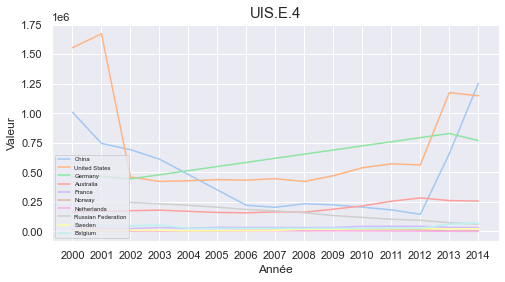

In [188]:
# Lineplot Pays Choisis / Indicateur 'UIS.E.4' :

plt.figure(figsize = (8,4))
for country in pays_selec:
    sns.lineplot(data_selection_melt[data_selection_melt['Indicator Code'] == 'UIS.E.4'][data_selection_melt['Country Name'] == country]['Année'],
            data_selection_melt[data_selection_melt['Indicator Code'] == 'UIS.E.4'][data_selection_melt['Country Name'] == country ]['Valeur'])
plt.legend(pays_selec, loc = 'lower left', prop = {'size': 6})
plt.title('UIS.E.4', size=15)
plt.show()

Conclusion : Analyse des graphiques ci dessus pour l'indicateur UIS.E.4, entre 2000 et 2016 :

- Les USA et l'Allemagne présentent des valeurs croissantes entre 2002 et 2012.
- La Chine a diminué pendant une décennie. Toutefois, on constate une évolution nette à partir de 2012.
- La Suède, la Belgique, la France ont peu évolué, entre 2000 et 2013.

<ipython-input-189-e3b01c2204c0>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data_selection_melt[data_selection_melt['Indicator Code'] == 'UIS.E.3'][data_selection_melt['Country Name'] == country]['Année'],
<ipython-input-189-e3b01c2204c0>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_selection_melt[data_selection_melt['Indicator Code'] == 'UIS.E.3'][data_selection_melt['Country Name'] == country ]['Valeur'])
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-189-e3b01c2204c0>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data_selection_melt[d

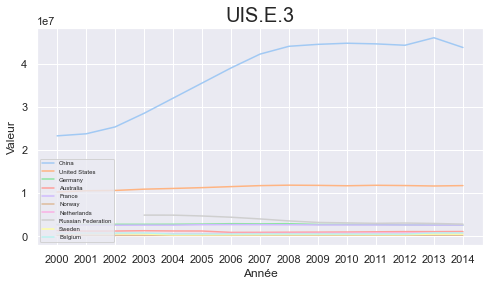

In [189]:
# Lineplot Pays Choisis / Indicateur 'UIS.E.3' :

plt.figure(figsize = (8,4))
for country in pays_selec:
    sns.lineplot(data_selection_melt[data_selection_melt['Indicator Code'] == 'UIS.E.3'][data_selection_melt['Country Name'] == country]['Année'],
            data_selection_melt[data_selection_melt['Indicator Code'] == 'UIS.E.3'][data_selection_melt['Country Name'] == country ]['Valeur'])
plt.legend(pays_selec, loc = 'lower left', prop = {'size': 6})
plt.title('UIS.E.3', size=20)
plt.show()

Conclusion : Analyse des graphiques ci dessus pour l'indicateur UIS.E.3, entre 2000 et 2016 :

- La Chine présente des valeurs croissantes entre 2002 et 2012.
- Les Etats Unis ont gardé des valeurs constantes, lors de la décennie 2000.
- La Suède, la Belgique, la France ont peu évolué, entre 2000 et 2013.

<ipython-input-190-0cd925f44703>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data_selection_melt[data_selection_melt['Indicator Code'] == 'NY.GDP.MKTP.KD'][data_selection_melt['Country Name'] == country]['Année'],
<ipython-input-190-0cd925f44703>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_selection_melt[data_selection_melt['Indicator Code'] == 'NY.GDP.MKTP.KD'][data_selection_melt['Country Name'] == country ]['Valeur'])
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-190-0cd925f44703>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data_se

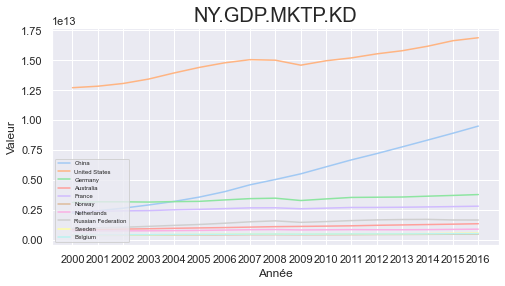

In [190]:
# Lineplot Pays Choisis / Indicateur 'NY.GDP.MKTP.KD' :

plt.figure(figsize = (8,4))
for country in pays_selec:
    sns.lineplot(data_selection_melt[data_selection_melt['Indicator Code'] == 'NY.GDP.MKTP.KD'][data_selection_melt['Country Name'] == country]['Année'],
            data_selection_melt[data_selection_melt['Indicator Code'] == 'NY.GDP.MKTP.KD'][data_selection_melt['Country Name'] == country ]['Valeur'])
plt.legend(pays_selec, loc = 'lower left', prop = {'size': 6})
plt.title('NY.GDP.MKTP.KD', size=20)
plt.show()

Conclusion : Analyse des graphiques ci dessus pour l'indicateur NY.GDP.MKTP.KD, entre 2000 et 2016 :

- La Chine présente des valeurs croissantes entre 2002 et 2012.
- Les Etats Unis n'ont eu de cesse d'augmenter au cours de ces deux décennies.
- La Suède, la Belgique, la France ont peu évolué, entre 2000 et 2013.
- L'Allemagne s'est démarquée du reste des pays choisis. Elle affiche des valeurs constantes, qui auraient tendance à croître.

<ipython-input-191-c26cf2f70486>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data_selection_melt[data_selection_melt['Indicator Code'] == 'SP.POP.1524.TO.UN'][data_selection_melt['Country Name'] == country]['Année'],
<ipython-input-191-c26cf2f70486>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_selection_melt[data_selection_melt['Indicator Code'] == 'SP.POP.1524.TO.UN'][data_selection_melt['Country Name'] == country ]['Valeur'])
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-191-c26cf2f70486>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(d

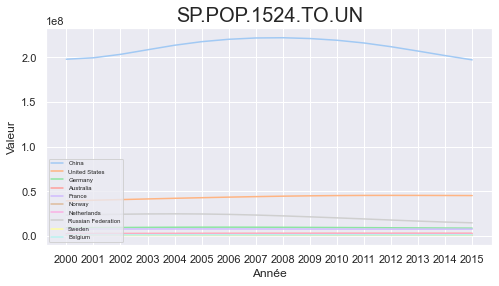

In [191]:
# Lineplot Pays Choisis / Indicateur 'SP.POP.1524.TO.UN' :

plt.figure(figsize = (8,4))
for country in pays_selec:
    sns.lineplot(data_selection_melt[data_selection_melt['Indicator Code'] == 'SP.POP.1524.TO.UN'][data_selection_melt['Country Name'] == country]['Année'],
            data_selection_melt[data_selection_melt['Indicator Code'] == 'SP.POP.1524.TO.UN'][data_selection_melt['Country Name'] == country ]['Valeur'])
plt.legend(pays_selec, loc = 'lower left', prop = {'size': 6})
plt.title('SP.POP.1524.TO.UN', size=20)
plt.show()

Conclusion : Analyse des graphiques ci dessus pour l'indicateur SP.POP.1524.TO.UN, entre 2000 et 2016 :

- La Chine domine largement cet indicateur.
- Les Etats Unis arrivent en second, puis la Russie.

<ipython-input-192-b17b43859d42>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data_selection_melt[data_selection_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_selection_melt['Country Name'] == country ]['Année'],
<ipython-input-192-b17b43859d42>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_selection_melt[data_selection_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_selection_melt['Country Name'] == country ]['Valeur'])
/Users/sylvaincarlevato/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-192-b17b43859d42>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data_s

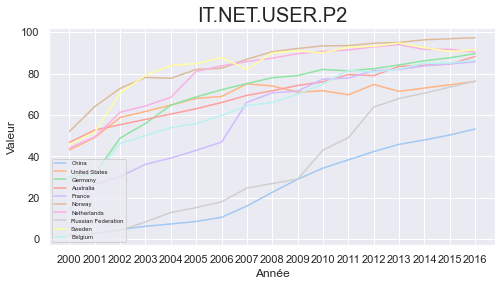

In [192]:
# Lineplot Pays Choisis / Indicateur 'IT.NET.USER.P2' :

plt.figure(figsize = (8,4))
for country in pays_selec:
    sns.lineplot(data_selection_melt[data_selection_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_selection_melt['Country Name'] == country ]['Année'],
            data_selection_melt[data_selection_melt['Indicator Code'] == 'IT.NET.USER.P2'][data_selection_melt['Country Name'] == country ]['Valeur'])
plt.legend(pays_selec, loc = 'lower left', prop = {'size': 6})
plt.title('IT.NET.USER.P2', size=20)
plt.show()

Conclusion : Analyse des graphiques ci dessus pour l'indicateur IT.NET.USER.P2, entre 2000 et 2016 :

- Les Etats Unis dominent cet indicateur.
- Toutes les valeurs des pays choisis sont croissantes.
- La Chine présente les Valeurs croissantes les plus basses, parmi les Pays sélectionnés.

# Conclusion :

Suite à ces différentes analyses graphiques, nous pouvons orienter les efforts de la Société Academy, vers 3 pays en tête des Scores :

- Les Etats Unis pour le Continent Nord Américain.
- La Chine pour l'Asie.
- L’Allemagne pour l'Europe. 

# Perspectives :

- Dataframes de 2019 à 2021.
- Etude de la Concurrence.
- Déterminer les Avantages Concurrentiels.
- Autres Indicateurs.
- Stratégies d’Alliance avec des Sociétés de Formation Locales.